In [248]:
#Importing all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Application Data

In [249]:
#Reading the dataset that contains the information of the client at the time of application.
application_data= pd.read_csv("application_data.csv")


In [250]:
#Taking a look at the top 5 rows in the dataframe
application_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [251]:
#Checking the number of rows and columns in the Dataframe
application_data.shape

(307511, 122)

There are 307511 rows and 122 columns in the dataframe.

In [252]:
#Obtaining concise summary about the Dataframe
application_data.info(verbose=True,null_counts=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_

In [253]:
#Taking a look at the columns in depth - their values and frequency of each value
for column in application_data:
    print (column)
    print (application_data[column].value_counts(dropna=False))

SK_ID_CURR
100303    1
131861    1
158488    1
156441    1
160539    1
150300    1
148253    1
154398    1
152351    1
238369    1
244514    1
242467    1
230181    1
236326    1
234279    1
254761    1
260906    1
135959    1
133908    1
248620    1
144147    1
176899    1
166660    1
164613    1
170758    1
168711    1
191240    1
189193    1
195338    1
193291    1
         ..
151011    1
161252    1
163301    1
157158    1
159207    1
136680    1
138729    1
132586    1
134635    1
144876    1
146925    1
239070    1
245213    1
243164    1
247250    1
210380    1
212429    1
206286    1
208335    1
251344    1
253393    1
249299    1
230874    1
259540    1
261589    1
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
TARGET
0    282686
1     24825
Name: TARGET, dtype: int64
NAME_CONTRACT_TYPE
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
CODE_GENDER
F      202448
M      105059
XN

### Identification And Treatment of Missing Data

In [254]:
#Creating a function to create a dataframe with unique values and data types of each column
def GetUniqueValuesInDf(df):
    df1=pd.DataFrame(df.nunique())
    df1["Data_type"]=df.dtypes
    df1.rename(columns = {0: "Unique_values"},inplace = True) 
    return df1

#Defining a function to check the % of null values in each column
def GetPercentageNullValues(df,ax):
    perc= round((df.isna().sum(axis=ax)*100/df.shape[ax]),2).sort_values(ascending=False)
    return perc

#Defining a function which will return the columns that have % null values in a given range 
def GetPercentageNullValuesBetween(df,ax,start,end):
    perc= round((df.isna().sum(axis=ax)*100/df.shape[ax]),2).sort_values(ascending=False)
    perc=perc[(perc>start) & (perc<end)]
    return perc

# Defining a function which will return the columns which has % null values greater than a certain value
def ColumnsWithNullValues(df,percentGreaterThan):
    percentageOfNull=GetPercentageNullValues(df,0)
    columnsWithNull=percentageOfNull[percentageOfNull>percentGreaterThan]
    return list(columnsWithNull.index)

In [255]:
#Checking the percentage of null values in each column of the dataset
GetPercentageNullValues(application_data,0)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
NONLIVINGAPARTMENTS_AVG        69.43
FONDKAPREMONT_MODE             68.39
LIVINGAPARTMENTS_MEDI          68.35
LIVINGAPARTMENTS_MODE          68.35
LIVINGAPARTMENTS_AVG           68.35
FLOORSMIN_MEDI                 67.85
FLOORSMIN_MODE                 67.85
FLOORSMIN_AVG                  67.85
YEARS_BUILD_MEDI               66.50
YEARS_BUILD_AVG                66.50
YEARS_BUILD_MODE               66.50
OWN_CAR_AGE                    65.99
LANDAREA_MODE                  59.38
LANDAREA_AVG                   59.38
LANDAREA_MEDI                  59.38
BASEMENTAREA_MEDI              58.52
BASEMENTAREA_AVG               58.52
BASEMENTAREA_MODE              58.52
EXT_SOURCE_1                   56.38
NONLIVINGAREA_MEDI             55.18
NONLIVINGAREA_AVG              55.18
NONLIVINGAREA_MODE             55.18
E

In [256]:
# Checking the columns which have more than 50% null values
colsToRemove=ColumnsWithNullValues(application_data,50)
colsToRemove

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'EXT_SOURCE_1',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE']

In [257]:
# We want to use this column later, so not removing it at present
colsToRemove.remove('EXT_SOURCE_1')
colsToRemove

['COMMONAREA_MEDI',
 'COMMONAREA_AVG',
 'COMMONAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAPARTMENTS_AVG',
 'FONDKAPREMONT_MODE',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAPARTMENTS_AVG',
 'FLOORSMIN_MEDI',
 'FLOORSMIN_MODE',
 'FLOORSMIN_AVG',
 'YEARS_BUILD_MEDI',
 'YEARS_BUILD_AVG',
 'YEARS_BUILD_MODE',
 'OWN_CAR_AGE',
 'LANDAREA_MODE',
 'LANDAREA_AVG',
 'LANDAREA_MEDI',
 'BASEMENTAREA_MEDI',
 'BASEMENTAREA_AVG',
 'BASEMENTAREA_MODE',
 'NONLIVINGAREA_MEDI',
 'NONLIVINGAREA_AVG',
 'NONLIVINGAREA_MODE',
 'ELEVATORS_MODE',
 'ELEVATORS_AVG',
 'ELEVATORS_MEDI',
 'WALLSMATERIAL_MODE',
 'APARTMENTS_MODE',
 'APARTMENTS_AVG',
 'APARTMENTS_MEDI',
 'ENTRANCES_MEDI',
 'ENTRANCES_MODE',
 'ENTRANCES_AVG',
 'LIVINGAREA_MEDI',
 'LIVINGAREA_MODE',
 'LIVINGAREA_AVG',
 'HOUSETYPE_MODE']

In [258]:
#Deleting all columns where the percentage of null value is greater than 50% except EXT_SOURCE_1 which can be used to draw conclusions later.
app_data=application_data.drop(colsToRemove,axis=1)
app_data.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 82 columns]

In [259]:
# Checking for columns with % missing data between 0 % and 14 %
cols=GetPercentageNullValuesBetween(app_data,0,0,14)
cols

AMT_REQ_CREDIT_BUREAU_QRT     13.50
AMT_REQ_CREDIT_BUREAU_YEAR    13.50
AMT_REQ_CREDIT_BUREAU_MON     13.50
AMT_REQ_CREDIT_BUREAU_HOUR    13.50
AMT_REQ_CREDIT_BUREAU_DAY     13.50
AMT_REQ_CREDIT_BUREAU_WEEK    13.50
NAME_TYPE_SUITE                0.42
OBS_30_CNT_SOCIAL_CIRCLE       0.33
DEF_30_CNT_SOCIAL_CIRCLE       0.33
OBS_60_CNT_SOCIAL_CIRCLE       0.33
DEF_60_CNT_SOCIAL_CIRCLE       0.33
EXT_SOURCE_2                   0.21
AMT_GOODS_PRICE                0.09
dtype: float64

In [260]:
# For the above columns, we need to see the median and quantile values in order to impute the nulls
cols=cols.reset_index() # Resetting the index of the series
cols=cols['index'].tolist() # Taking the index column as it contains the column names
app_data[cols].describe()

AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  \
count              265992.000000               265992.000000   
mean                    0.265474                    1.899974   
std                     0.794056                    1.869295   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    1.000000   
75%                     0.000000                    3.000000   
max                   261.000000                   25.000000   

       AMT_REQ_CREDIT_BUREAU_MON  AMT_REQ_CREDIT_BUREAU_HOUR  \
count              265992.000000               265992.000000   
mean                    0.267395                    0.006402   
std                     0.916002                    0.083849   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                    27.000000                    4.000000   

       AMT_REQ_CREDIT_BUREAU_DAY  AMT_REQ_CREDIT_BUREAU_WEEK  \
count              265992.000000               265992.000000   
mean                    0.007000                    0.034362   
std                     0.110757                    0.204685   
min                     0.000000                    0.000000   
25%                     0.000000                    0.000000   
50%                     0.000000                    0.000000   
75%                     0.000000                    0.000000   
max                     9.000000                    8.000000   

       OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
count             306490.000000             306490.000000   
mean                   1.422245                  0.143421   
std                    2.400989                  0.446698   
min                    0.000000                  0.000000   
25%                    0.000000                  0.000000   
50%                    0.000000                  0.000000   
75%                    2.000000                  0.000000   
max                  348.000000                 34.000000   

       OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  EXT_SOURCE_2  \
count             306490.000000             306490.000000  3.068510e+05   
mean                   1.405292                  0.100049  5.143927e-01   
std                    2.379803                  0.362291  1.910602e-01   
min                    0.000000                  0.000000  8.173617e-08   
25%                    0.000000                  0.000000  3.924574e-01   
50%                    0.000000                  0.000000  5.659614e-01   
75%                    2.000000                  0.000000  6.636171e-01   
max                  344.000000                 24.000000  8.549997e-01   

       AMT_GOODS_PRICE  
count     3.072330e+05  
mean      5.383962e+05  
std       3.694465e+05  
min       4.050000e+04  
25%       2.385000e+05  
50%       4.500000e+05  
75%       6.795000e+05  
max       4.050000e+06

For the following columns, we cannot impute any values as it will lead to an error in our analysis:

1. NAME_TYPE_SUITE - For rows where this information is not available, we cannot take a guess at who was accompanying the applicant. It is best to leave it null.
2. EXT_SOURCE_2 - There is no reccuring pattern in this column of the dataset. We can impute it with mean but we will leave it as it is.
2. OBS_30_CNT_SOCIAL_CIRCLE for which we cannot estimate the missing values.
3. DEF_30_CNT_SOCIAL_CIRCLE for which we cannot estimate the missing values.
4. OBS_60_CNT_SOCIAL_CIRCLE for which we cannot estimate the missing values.
5. DEF_60_CNT_SOCIAL_CIRCLE for which we cannot estimate the missing values.


For the following columns, we can perform some imputation:
1. AMT_REQ_CREDIT_BUREAU_HOUR
2. AMT_REQ_CREDIT_BUREAU_DAY
3. AMT_REQ_CREDIT_BUREAU_WEEK
4. AMT_REQ_CREDIT_BUREAU_MON
5. AMT_REQ_CREDIT_BUREAU_QRT
6. AMT_REQ_CREDIT_BUREAU_YEAR
7. AMT_GOODS_PRICE

For all the columns 1 to 6 in the above list, we can see that the maximum number of entrees is 0. We can hence impute the null values in this column with 0 and assume that zero number of enquiries were made during the stated period.
For the AMT_GOODS_PRICE, we'll impute the null values with median.

In [261]:
#Imputing the null values in the above given 6 columns with 0.
app_data["AMT_REQ_CREDIT_BUREAU_HOUR"]=app_data["AMT_REQ_CREDIT_BUREAU_HOUR"].fillna(0)
app_data["AMT_REQ_CREDIT_BUREAU_DAY"]=app_data["AMT_REQ_CREDIT_BUREAU_DAY"].fillna(0)
app_data["AMT_REQ_CREDIT_BUREAU_WEEK"]=app_data["AMT_REQ_CREDIT_BUREAU_WEEK"].fillna(0)
app_data["AMT_REQ_CREDIT_BUREAU_MON"]=app_data["AMT_REQ_CREDIT_BUREAU_MON"].fillna(0)
app_data["AMT_REQ_CREDIT_BUREAU_QRT"]=app_data["AMT_REQ_CREDIT_BUREAU_QRT"].fillna(0)
app_data["AMT_REQ_CREDIT_BUREAU_YEAR"]=app_data["AMT_REQ_CREDIT_BUREAU_YEAR"].fillna(0)

#Imputing the "AMT_GOODS_PRICE" column with median value.
app_data["AMT_GOODS_PRICE"]=app_data["AMT_GOODS_PRICE"].fillna(app_data["AMT_GOODS_PRICE"].median())
app_data["AMT_ANNUITY"]=app_data["AMT_ANNUITY"].fillna(app_data["AMT_ANNUITY"].median())

In [262]:
#Checking for any duplicate rows by looking for duplicates in the load ID column.
print(any(app_data['SK_ID_CURR'].duplicated()))     


False


Since it is false, we do not have any duplicate rows in the dataframe and we can continue with the analysis.

In [263]:
#Checking number of null values in each row
GetPercentageNullValues(app_data,1)

197736    18.29
249607    18.29
212048    18.29
150206    18.29
185713    18.29
133770    18.29
186195    18.29
225995    18.29
269492    18.29
113944    18.29
53941     18.29
12578     18.29
69707     18.29
182887    18.29
269786    18.29
244833    18.29
116937    18.29
214264    17.07
146561    17.07
174738    17.07
158385    17.07
307402    17.07
227749    17.07
144567    17.07
230638    17.07
305365    17.07
6431      17.07
106299    17.07
168835    17.07
45611     17.07
          ...  
127711     0.00
127714     0.00
127715     0.00
127725     0.00
127675     0.00
127744     0.00
127752     0.00
127753     0.00
127763     0.00
127764     0.00
127774     0.00
127678     0.00
127647     0.00
127525     0.00
127568     0.00
127526     0.00
127527     0.00
127530     0.00
127549     0.00
127556     0.00
127567     0.00
127571     0.00
127635     0.00
127588     0.00
127595     0.00
127599     0.00
127603     0.00
127622     0.00
127626     0.00
0          0.00
Length: 307511, dtype: f

We will not be deleting any rows since the percentage of missing values in all rows is low.Deleting rows will result in unnecessary loss of data.

### Conversion of Datatype 

In [264]:
#Checking all columns which are in int data type
app_data.select_dtypes("int64").columns

Index(['SK_ID_CURR', 'TARGET', 'CNT_CHILDREN', 'DAYS_BIRTH', 'DAYS_EMPLOYED',
       'DAYS_ID_PUBLISH', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL', 'REGION_RATING_CLIENT',
       'REGION_RATING_CLIENT_W_CITY', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

Many of these are categorical data and hence, should be converted from "int64" data type to "category" data type.

In [265]:
#Checking number of unique values in the columns
df1=GetUniqueValuesInDf(app_data)
df1

Unique_values Data_type
SK_ID_CURR                         307511     int64
TARGET                                  2     int64
NAME_CONTRACT_TYPE                      2    object
CODE_GENDER                             3    object
FLAG_OWN_CAR                            2    object
FLAG_OWN_REALTY                         2    object
CNT_CHILDREN                           15     int64
AMT_INCOME_TOTAL                     2548   float64
AMT_CREDIT                           5603   float64
AMT_ANNUITY                         13672   float64
AMT_GOODS_PRICE                      1002   float64
NAME_TYPE_SUITE                         7    object
NAME_INCOME_TYPE                        8    object
NAME_EDUCATION_TYPE                     5    object
NAME_FAMILY_STATUS                      6    object
NAME_HOUSING_TYPE                       6    object
REGION_POPULATION_RELATIVE             81   float64
DAYS_BIRTH                          17460     int64
DAYS_EMPLOYED                       12574     int64
DAYS_REGISTRATION                   15688   float64
DAYS_ID_PUBLISH                      6168     int64
FLAG_MOBIL                              2     int64
FLAG_EMP_PHONE                          2     int64
FLAG_WORK_PHONE                         2     int64
FLAG_CONT_MOBILE                        2     int64
FLAG_PHONE                              2     int64
FLAG_EMAIL                              2     int64
OCCUPATION_TYPE                        18    object
CNT_FAM_MEMBERS                        17   float64
REGION_RATING_CLIENT                    3     int64
...                                   ...       ...
DEF_30_CNT_SOCIAL_CIRCLE               10   float64
OBS_60_CNT_SOCIAL_CIRCLE               33   float64
DEF_60_CNT_SOCIAL_CIRCLE                9   float64
DAYS_LAST_PHONE_CHANGE               3773   float64
FLAG_DOCUMENT_2                         2     int64
FLAG_DOCUMENT_3                         2     int64
FLAG_DOCUMENT_4                         2     int64
FLAG_DOCUMENT_5                         2     int64
FLAG_DOCUMENT_6                         2     int64
FLAG_DOCUMENT_7                         2     int64
FLAG_DOCUMENT_8                         2     int64
FLAG_DOCUMENT_9                         2     int64
FLAG_DOCUMENT_10                        2     int64
FLAG_DOCUMENT_11                        2     int64
FLAG_DOCUMENT_12                        2     int64
FLAG_DOCUMENT_13                        2     int64
FLAG_DOCUMENT_14                        2     int64
FLAG_DOCUMENT_15                        2     int64
FLAG_DOCUMENT_16                        2     int64
FLAG_DOCUMENT_17                        2     int64
FLAG_DOCUMENT_18                        2     int64
FLAG_DOCUMENT_19                        2     int64
FLAG_DOCUMENT_20                        2     int64
FLAG_DOCUMENT_21                        2     int64
AMT_REQ_CREDIT_BUREAU_HOUR              5   float64
AMT_REQ_CREDIT_BUREAU_DAY               9   float64
AMT_REQ_CREDIT_BUREAU_WEEK              9   float64
AMT_REQ_CREDIT_BUREAU_MON              24   float64
AMT_REQ_CREDIT_BUREAU_QRT              11   float64
AMT_REQ_CREDIT_BUREAU_YEAR             25   float64

[82 rows x 2 columns]

In [266]:
#List of columns to convert to "category" data type
# Here we are taking the columns which have 2 unique values and are of type int
list_to_convert=(df1[(df1.Unique_values==2)&(df1.Data_type=="int64")]).index
list_to_convert

Index(['TARGET', 'FLAG_MOBIL', 'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE',
       'FLAG_CONT_MOBILE', 'FLAG_PHONE', 'FLAG_EMAIL',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY', 'FLAG_DOCUMENT_2',
       'FLAG_DOCUMENT_3', 'FLAG_DOCUMENT_4', 'FLAG_DOCUMENT_5',
       'FLAG_DOCUMENT_6', 'FLAG_DOCUMENT_7', 'FLAG_DOCUMENT_8',
       'FLAG_DOCUMENT_9', 'FLAG_DOCUMENT_10', 'FLAG_DOCUMENT_11',
       'FLAG_DOCUMENT_12', 'FLAG_DOCUMENT_13', 'FLAG_DOCUMENT_14',
       'FLAG_DOCUMENT_15', 'FLAG_DOCUMENT_16', 'FLAG_DOCUMENT_17',
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21'],
      dtype='object')

In [267]:
#converting from "int64" data type to "category"

app_data[list_to_convert]=app_data[list_to_convert].astype('category')

In [268]:
#Similarly converting from "object" data type to "category" for some of the columns
app_data["FLAG_OWN_CAR"]=app_data["FLAG_OWN_CAR"].astype('category')
app_data["FLAG_OWN_REALTY"]=app_data["FLAG_OWN_REALTY"].astype('category')

### Note:
Some columns have XNA values which denotes info not available. We are not removing them. We will ignore them while drawing inferences.

In [269]:
#Checking the dataframe again
app_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 82 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null category
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null category
FLAG_OWN_REALTY                 307511 non-null category
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307511 non-null float64
AMT_GOODS_PRICE                 307511 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
R

# Identifying and Removing Outliers

In [270]:
#Creating a function to plot box plots

def plot_graph(df,var):
    fig, ax=plt.subplots(nrows=2,ncols=1, figsize=(10,10))
    s1=sns.boxplot(y=df[var],ax=ax[0])
    s2=sns.distplot(df[var],ax=ax[1])
    ax[0].set_title('Box Plot for '+ var)
    ax[1].set_title('Density Plot for '+ var)
    plt.show()

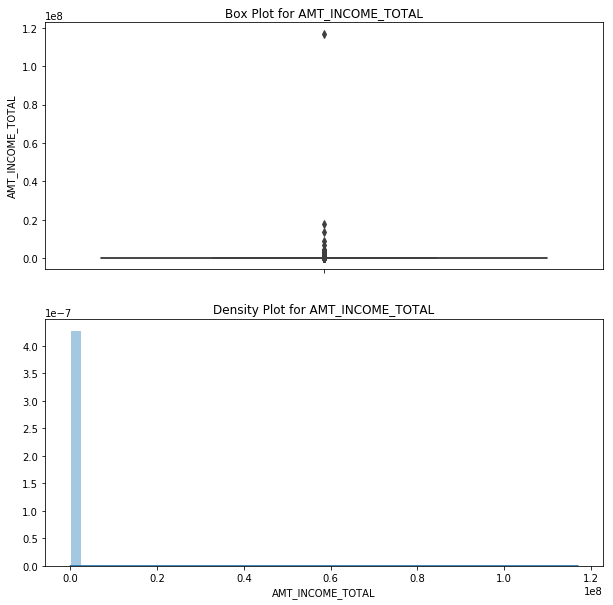

In [271]:
#Plotting box plot to check for outliers in "AMT_INCOME_TOTAL" column
plot_graph(app_data,"AMT_INCOME_TOTAL")

Any data points that lie above or below the whiskers can be considered outliers or anomalous.

In [272]:
#Removing outliers above 99 percentile in the AMT_INCOME_TOTAL column 

q = app_data["AMT_INCOME_TOTAL"].quantile(0.99) #(data points that are more than 99 percentile)
app_data=app_data[app_data["AMT_INCOME_TOTAL"] <=q]

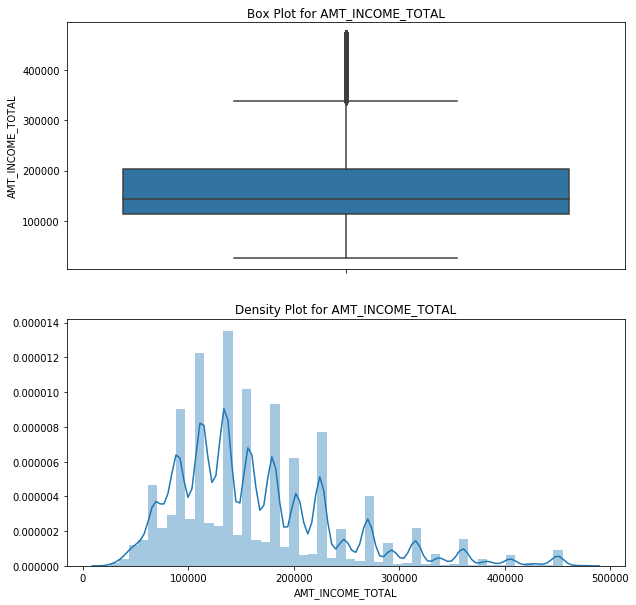

In [273]:
#checking the column after removing outliers 
plot_graph(app_data,"AMT_INCOME_TOTAL")

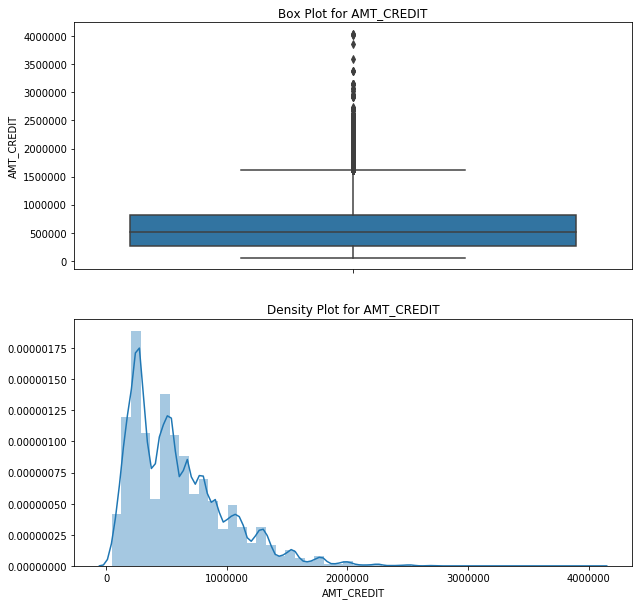

In [274]:
#Plotting box plot to check for outliers in "AMT_CREDIT" column
plot_graph(app_data,"AMT_CREDIT")

In [275]:
#Removing outliers in the AMT_CREDIT column 

q = app_data["AMT_CREDIT"].quantile(0.99) #(data points that are more than 99 percentile)
app_data=app_data[app_data["AMT_CREDIT"] <=q]

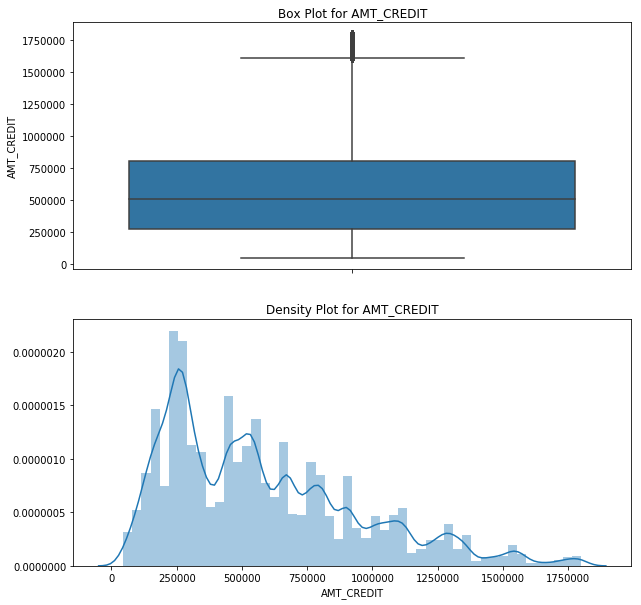

In [276]:
#Checking the "AMT_CREDIT" column after removing outliers
plot_graph(app_data,"AMT_CREDIT")

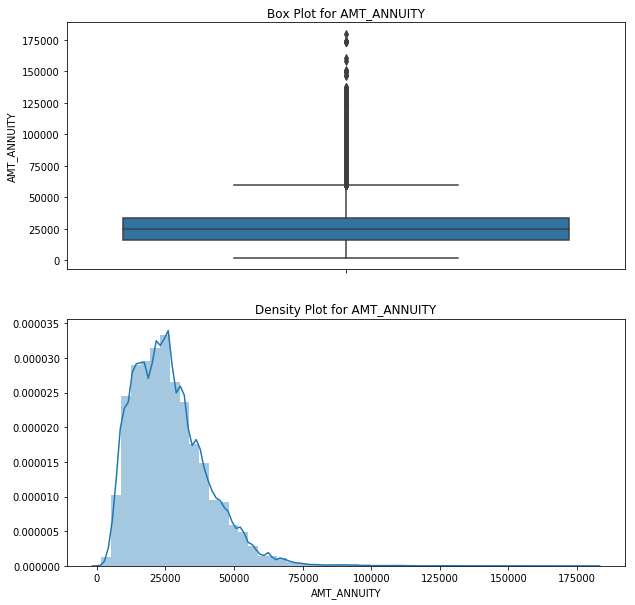

In [277]:
#Plotting box plot for checking outliers in "AMT_ANNUITY" column
plot_graph(app_data,"AMT_ANNUITY")

In [278]:
#Removing outliers in the AMT_ANNUITY column 

q = app_data["AMT_ANNUITY"].quantile(0.99) #data points that are more than 99 percentile
app_data=app_data[app_data["AMT_ANNUITY"] <=q]

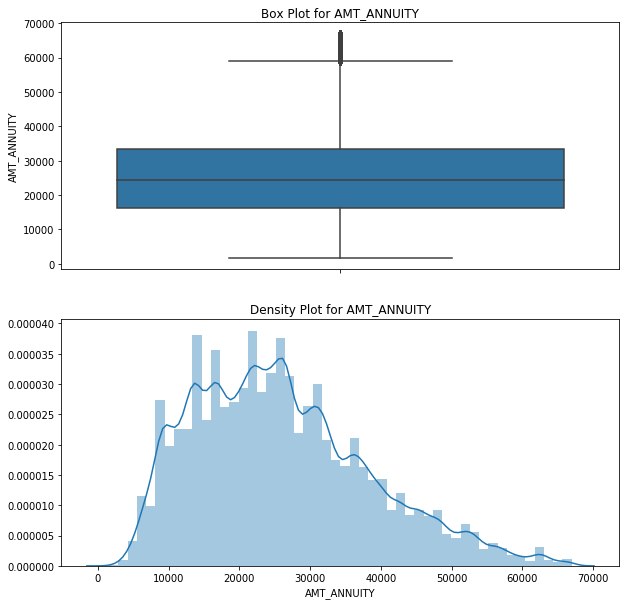

In [279]:
#Checking the "AMT_ANNUITY" column after removing outliers
plot_graph(app_data,"AMT_ANNUITY")

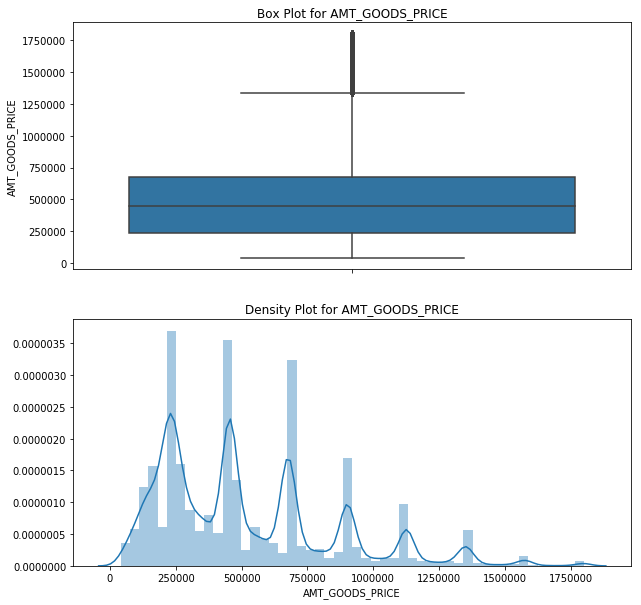

In [280]:
#Plotting box plot to check for outliers in "AMT_GOODS_PRICE" column
plot_graph(app_data,"AMT_GOODS_PRICE")

In [281]:
#Removing outliers in the AMT_GOODS_PPRICE column 

q = app_data["AMT_GOODS_PRICE"].quantile(0.99) #data points that are more than 99 percentile
app_data=app_data[app_data["AMT_GOODS_PRICE"] <=q]

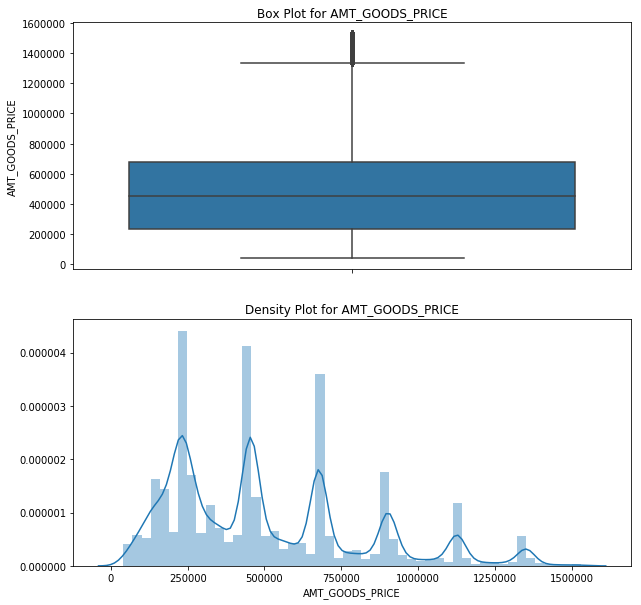

In [282]:
#Checking "AMT_GOODS_PRICE" after removing outliers
plot_graph(app_data,"AMT_GOODS_PRICE")

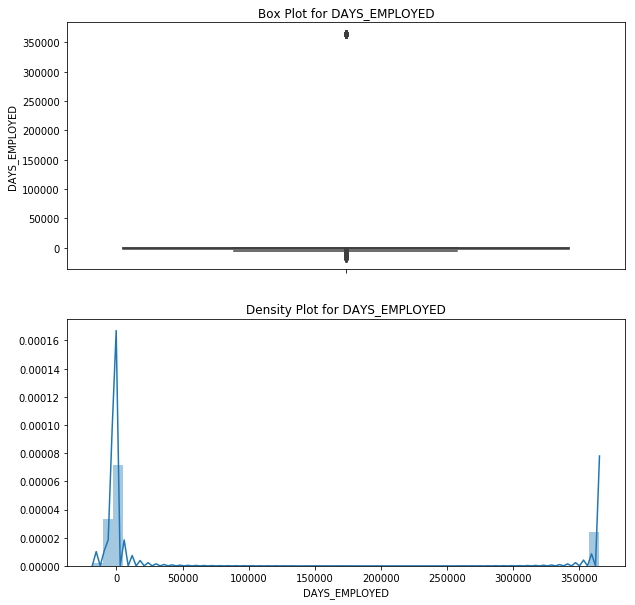

In [283]:
# plot_box("DAYS_EMPLOYED")
plot_graph(app_data,"DAYS_EMPLOYED")

In [284]:
#Checking the column to find the outlier value
app_data["DAYS_EMPLOYED"].describe()

count    295713.000000
mean      64894.433833
std      142149.993752
min      -17912.000000
25%       -2732.000000
50%       -1194.000000
75%        -278.000000
max      365243.000000
Name: DAYS_EMPLOYED, dtype: float64

We can see that the maximum value in the Days_Employed column is 365243 which trasnlates to 1000 years which is not possible. hence, it is an error and can be replaced by Nan. 

In [285]:
#Replacing the "365243" value by nan values.
app_data["DAYS_EMPLOYED"]=app_data["DAYS_EMPLOYED"].replace(365243,np.nan)

#Removing outliers in the DAYS_EMPLOYED column 

q = app_data["DAYS_EMPLOYED"].quantile(0.02) # determine the outliers (data points that are less than 2 percentile)
app_data=app_data[app_data["DAYS_EMPLOYED"] >=q]

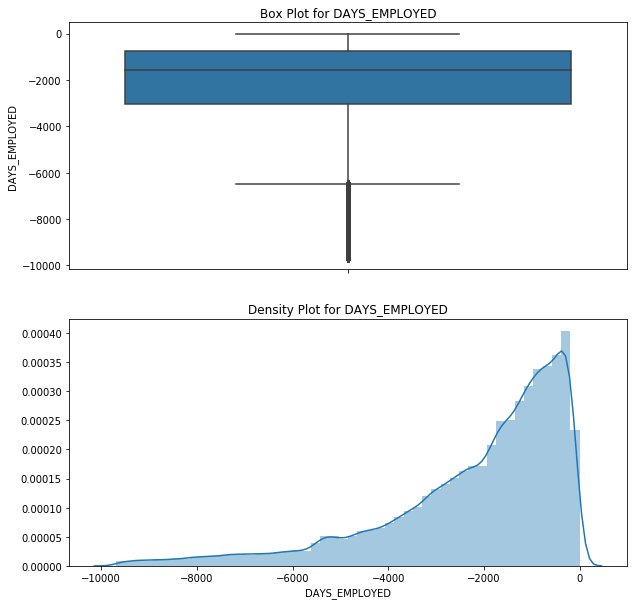

In [286]:
#Checking the column "DAYS_EMPLOYED" after removing outliers
plot_graph(app_data,"DAYS_EMPLOYED")

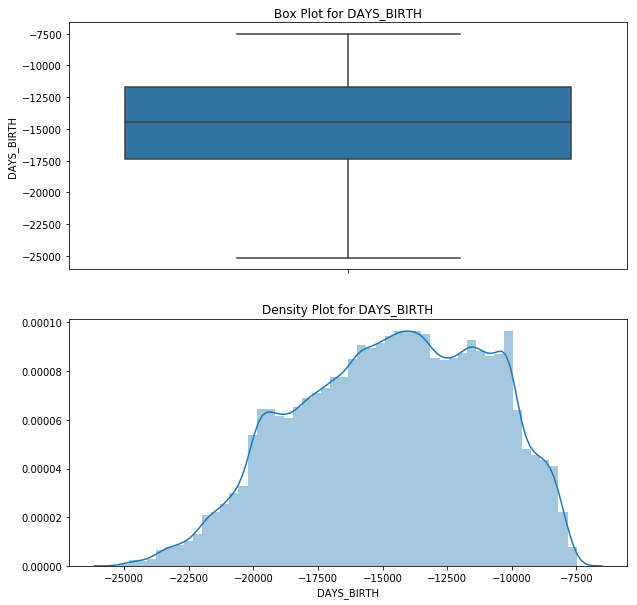

In [287]:
#Plotting box plot to check "DAYS_BIRTH" column
plot_graph(app_data,"DAYS_BIRTH")

We can see that this column has no outliers, hence no action is reuired.

### Binning Continuous Variables

In [288]:
#Checking "AMT_INCOME_TOTAL" variable to decide binning limits
app_data["AMT_INCOME_TOTAL"].describe()

count    236773.000000
mean     166142.815355
std       75602.415864
min       25650.000000
25%      112500.000000
50%      157500.000000
75%      202500.000000
max      472500.000000
Name: AMT_INCOME_TOTAL, dtype: float64

In [289]:
#Binning the "AMT_INCOME_TOTAL" column 
bins = [0, 125000, 250000, 375000, 500000]
slot = ['0-125000', '125000-250000', '250000-375000', '375000-500000']
app_data['INCOME_RANGE'] = pd.cut(app_data['AMT_INCOME_TOTAL'], bins, labels=slot)
app_data['INCOME_RANGE'].value_counts()

125000-250000    131191
0-125000          76796
250000-375000     24193
375000-500000      4593
Name: INCOME_RANGE, dtype: int64

In [290]:
#Checking "AMT_ANNUITY" variable to decide binning limits
app_data["AMT_ANNUITY"].describe()

count    236773.000000
mean      26342.227501
std       12305.926243
min        1980.000000
25%       16780.500000
50%       25191.000000
75%       33907.500000
max       66978.000000
Name: AMT_ANNUITY, dtype: float64

In [291]:
#Binning the "AMT_ANNUITY" column
bins = [0, 17500,35000, 52500, 70000]
slot = ['0-17500', '17500-35000', '35000-52500', '52500-70000']
app_data['ANNUITY_RANGE'] = pd.cut(app_data['AMT_ANNUITY'], bins, labels=slot)
app_data['ANNUITY_RANGE'].value_counts()

17500-35000    117612
0-17500         64540
35000-52500     46805
52500-70000      7816
Name: ANNUITY_RANGE, dtype: int64

In [292]:
#Checking "DAYS_BIRTH" variable to decide binning limits. We will first convert it to age in terms of years.
app_data["AGE"]=round(app_data["DAYS_BIRTH"]/(-365),0)
app_data["AGE"].describe()

count    236773.000000
mean         40.085153
std           9.930558
min          21.000000
25%          32.000000
50%          40.000000
75%          48.000000
max          69.000000
Name: AGE, dtype: float64

We can see that minimum age of loan applicants in 21 years and the maximum age is 69 years.

In [293]:
#Binning the "AGE" column
bins = [20,30,40,50,60,70]
slot = ['20-30', '30-40', '40-50','50-60','60-70']
app_data['AGE_RANGE'] = pd.cut(app_data["AGE"], bins, labels=slot)
app_data['AGE_RANGE'].value_counts()

30-40    78783
40-50    68895
20-30    47558
50-60    37242
60-70     4295
Name: AGE_RANGE, dtype: int64

In [294]:
#Checking "DAYS_EMPLOYED" variable to decide binning limits. We will first convert it to years since employment.
app_data["YEARS_EMPLOYMENT"]=round(app_data["DAYS_EMPLOYED"]/(-365),0)
app_data["YEARS_EMPLOYMENT"].describe()

count    236773.000000
mean          5.970605
std           5.286789
min           0.000000
25%           2.000000
50%           4.000000
75%           8.000000
max          27.000000
Name: YEARS_EMPLOYMENT, dtype: float64

In [295]:
#Binning the "YEARS_EMPLOYMENT" column 
bins = [0,5,10,15,20]
slot = ['0-5', '5-10', '10-15','15-20']
app_data['EMPLOYED_RANGE'] = pd.cut(app_data["YEARS_EMPLOYMENT"], bins, labels=slot)
app_data['EMPLOYED_RANGE'].value_counts()

0-5      130277
5-10      57254
10-15     23955
15-20      9558
Name: EMPLOYED_RANGE, dtype: int64

In [296]:
#Checking "EXT_SOURCE_1" variable to decide binning limits. 
app_data["EXT_SOURCE_1"].describe()

count    114131.000000
mean          0.474579
std           0.204313
min           0.014568
25%           0.312569
50%           0.471526
75%           0.635425
max           0.942680
Name: EXT_SOURCE_1, dtype: float64

In [297]:
#Binning "EXT_SOURCE_1" column
bins = [0,0.25,0.5,0.75,1]
slot = ['0-0.25', '0.25-0.5', '0.5-0.75','0.75-1']
app_data['SCORE1_RANGE'] = pd.cut(app_data["EXT_SOURCE_1"], bins, labels=slot)
app_data['SCORE1_RANGE'].value_counts()

0.25-0.5    43702
0.5-0.75    39895
0-0.25      18487
0.75-1      12047
Name: SCORE1_RANGE, dtype: int64

In [298]:
#Checking "EXT_SOURCE_2" variable to decide binning limits. 
app_data["EXT_SOURCE_2"].describe()

count    2.362880e+05
mean     5.119743e-01
std      1.905818e-01
min      8.173617e-08
25%      3.915766e-01
50%      5.625634e-01
75%      6.607800e-01
max      8.549997e-01
Name: EXT_SOURCE_2, dtype: float64

In [299]:
#Binning "EXT_SOURCE_2" column
bins = [0,0.25,0.5,0.75,1]
slot = ['0-0.25', '0.25-0.5', '0.5-0.75','0.75-1']
app_data['SCORE2_RANGE'] = pd.cut(app_data["EXT_SOURCE_2"], bins, labels=slot)
app_data['SCORE2_RANGE'].value_counts()

0.5-0.75    135025
0.25-0.5     62178
0-0.25       28927
0.75-1       10158
Name: SCORE2_RANGE, dtype: int64

In [300]:
#Checking "EXT_SOURCE_3" variable to decide binning limits. 
app_data["EXT_SOURCE_3"].describe()

count    189386.000000
mean          0.497768
std           0.196380
min           0.000527
25%           0.353988
50%           0.519097
75%           0.656158
max           0.893976
Name: EXT_SOURCE_3, dtype: float64

In [301]:
#Binning "EXT_SOURCE_3" column
bins = [0,0.25,0.5,0.75,1]
slot = ['0-0.25', '0.25-0.5', '0.5-0.75','0.75-1']
app_data['SCORE3_RANGE'] = pd.cut(app_data["EXT_SOURCE_3"], bins, labels=slot)
app_data['SCORE3_RANGE'].value_counts()

0.5-0.75    83796
0.25-0.5    63551
0-0.25      25042
0.75-1      16997
Name: SCORE3_RANGE, dtype: int64

# Finding Data Imbalance

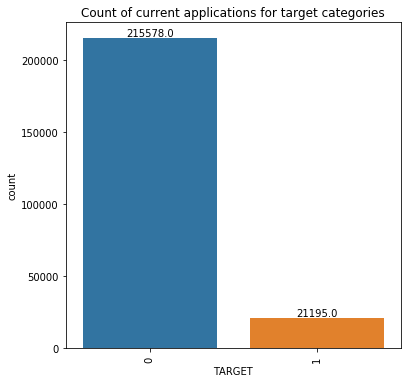

In [302]:
#Finding if there is any imbalance in the data
plt.figure(figsize=(6, 6))
g=sns.countplot(x='TARGET',data = app_data)
plt.xticks(rotation=90)
for p in g.patches:
    g.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

plt.title('Count of current applications for target categories')
plt.show()

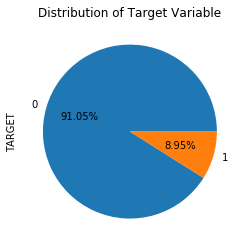

In [303]:
#Plotting pie chart to see the percentage of defaulters and non-defaulters
app_data.TARGET.value_counts().plot.pie(autopct='%1.2f%%',shadow=False)
plt.title("Distribution of Target Variable")
plt.show()

In [304]:
#Finding the ratio of Data Imbalance
Count_default=app_data['TARGET'].value_counts()

Nondefaulters= Count_default[0]
Defaulters = Count_default[1]


ratio= round((Nondefaulters/Defaulters),2)
print("The ratio of Data imbalance is", ratio)

#Finding the percentage of defaulters and Non-Defaulters
print("The percentage of defaulters is",round((Defaulters/(Defaulters+Nondefaulters))*100,2))
print("The percentage of Non-defaulters is",round((Nondefaulters/(Defaulters+Nondefaulters))*100,2))

The ratio of Data imbalance is 10.17
The percentage of defaulters is 8.95
The percentage of Non-defaulters is 91.05


### INFERENCE : From the above graphs we can see that the number of defaulters as compared to non-defaulters is very less amongst the loan applicants. Only 21195 (8.95%) people out of 2,36,773 loan applicants are defaulters.

## UNIVARIATE ANALYSIS FOR CATEGORICAL COLUMNS

In [305]:
#Creating new dataframe for defaulters and non-defaulters
defaulters_df=app_data[app_data.TARGET==1]
nondefaulters_df=app_data[app_data.TARGET==0]

In [306]:
#Defining function to plot graphs for univariate analysis
  
def plot_univariatePercentage(var,annot,log):
    fig=plt.figure(figsize=(10,10),dpi=150)
    ax1 = fig.add_subplot(221)
    ax2 = fig.add_subplot(222)
    ax3 = fig.add_subplot(223)
    ax4 = fig.add_subplot(224)
    ax1.set_title('% Rate of defaulters for ' + '%s' %var)
    ax2.set_title('Distribution of ' +  '%s' %var + ' for Defaulters')
    ax3.set_title('% Rate of non defaulters for '+'%s' %var)
    ax4.set_title('Distribution of ' +  '%s' %var + ' for Non-Defaulters')
    
    ax1.set_ylabel('Percentage')
    ax3.set_ylabel('Percentage')
    
    cDf=pd.crosstab(app_data[var],app_data['TARGET']).apply(lambda r: r*100/r.sum(), axis=1)
    
    dDf=cDf[1].sort_values(ascending=False)
    ndDf=cDf[0].sort_values(ascending=False)
    
    p1=sns.barplot(y=dDf.values,x=dDf.index, ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
    
    p2=sns.barplot(y=ndDf.values,x=ndDf.index, ax=ax3)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)
    
    p3=sns.countplot(x=defaulters_df[var], data = defaulters_df,order = defaulters_df[var].value_counts().index,ax=ax2)
    p3.set_xticklabels(p3.get_xticklabels(),rotation=90)
    
    p4=sns.countplot(x=nondefaulters_df[var], data = nondefaulters_df,order = nondefaulters_df[var].value_counts().index,ax=ax4)
    p4.set_xticklabels(p4.get_xticklabels(),rotation=90)
    
    if(log):
        ax2.set_yscale('log')
        ax4.set_yscale('log')
    
    if(annot):
        for p in p1.patches:
            p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
        for p in p2.patches:
            p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
        for p in p3.patches:
            p3.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
        for p in p4.patches:
            p4.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    fig.tight_layout()
    plt.show()

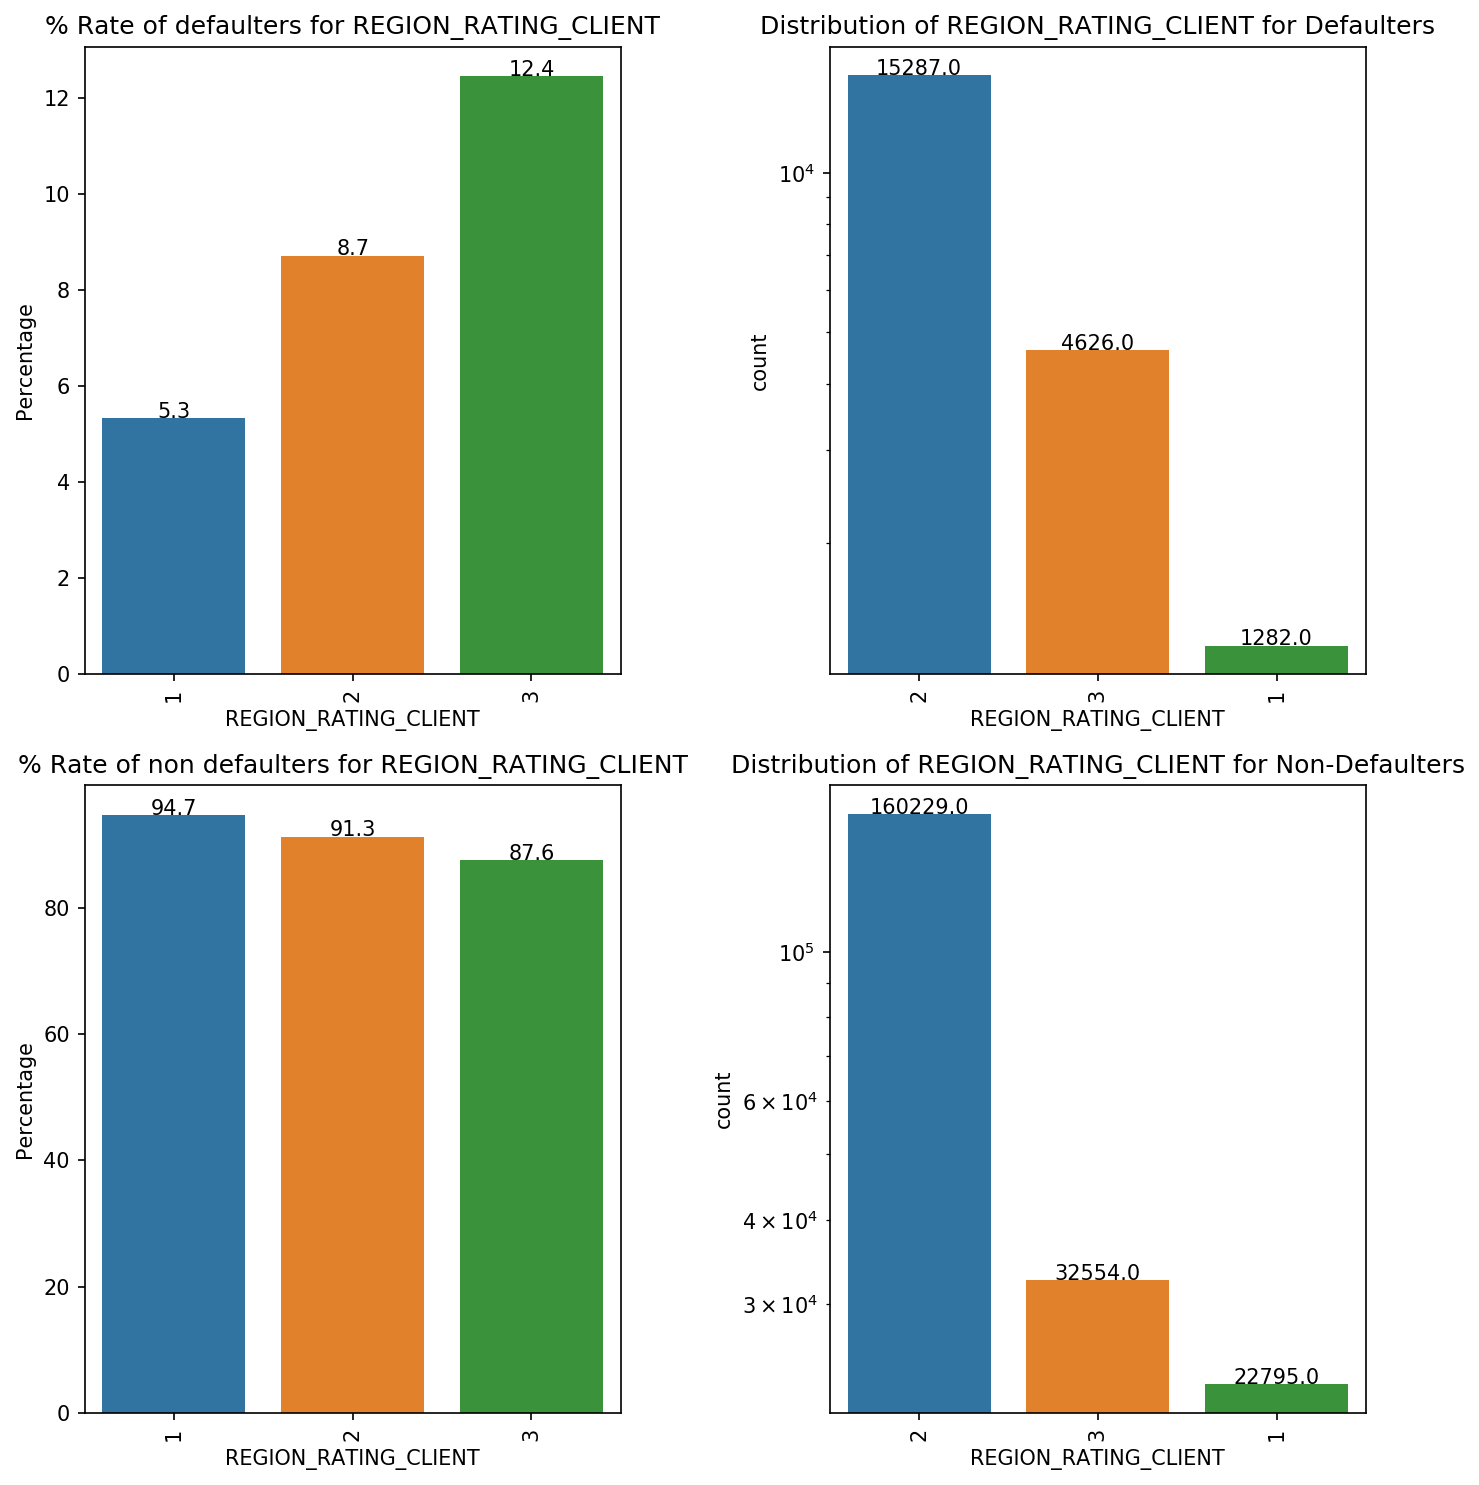

In [307]:
# Plot for region rating of client
plot_univariatePercentage('REGION_RATING_CLIENT','annot','log')            

### INFERENCE: 
1. From the above graph, we can see that most of the loan applicants are with rating 2 and 3.
2. Based on the region rating of client, loan applicants who have rating 3 are more likely to default than those with rating 1 and 2

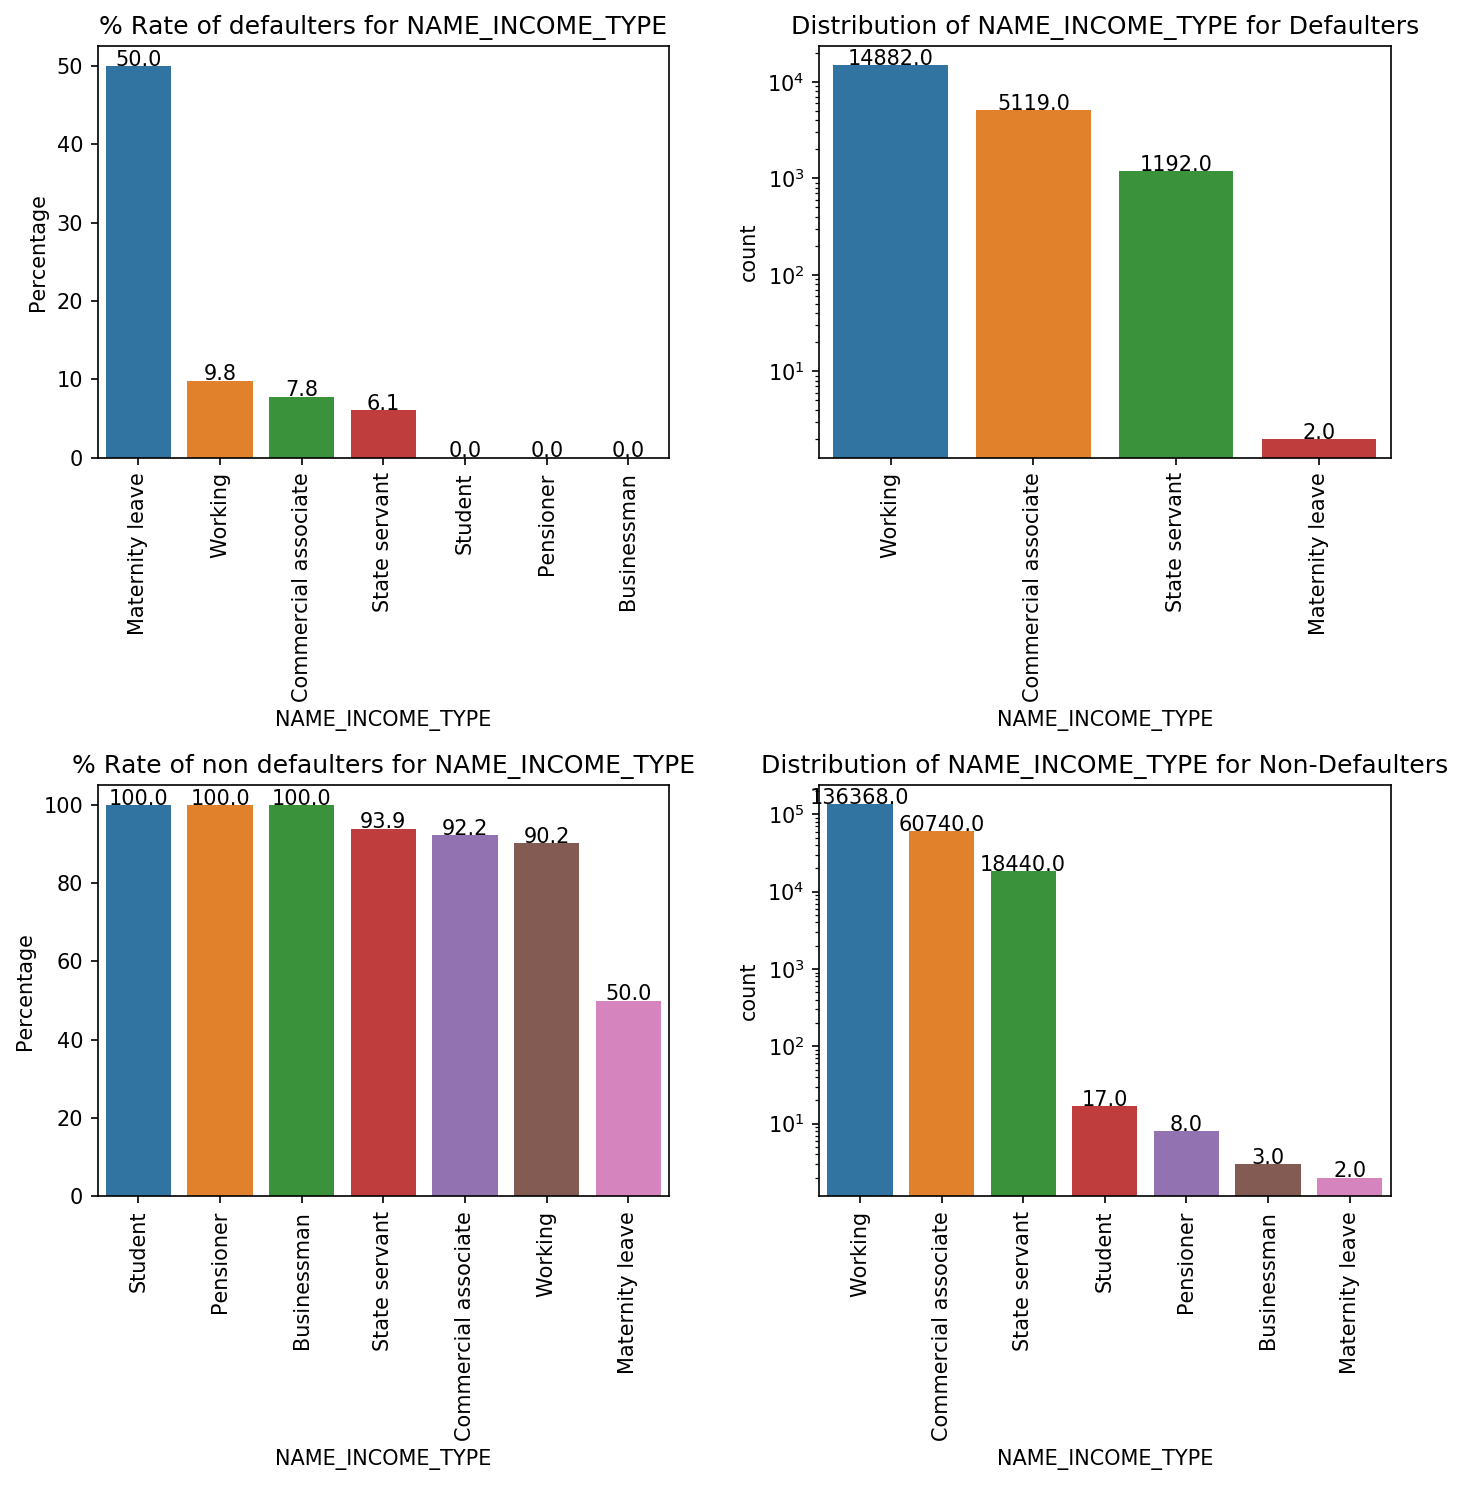

In [308]:
# Plot for income type
plot_univariatePercentage('NAME_INCOME_TYPE','annot','log')

### INFERENCE: 
1. From the above graph, we can see that most of the loan applicants are working professionals (63%) and Commercial associates (28%).
2. The graph shows persons with maternity leave are the highest defaulters among others. However, as the count of such applicants in the dataset is only 4 (2 have defaulted, 2 have not defaulted), this may not be the trend. However, working, commercial associate and state servant are more likely to deafult compared to student and pensioners.

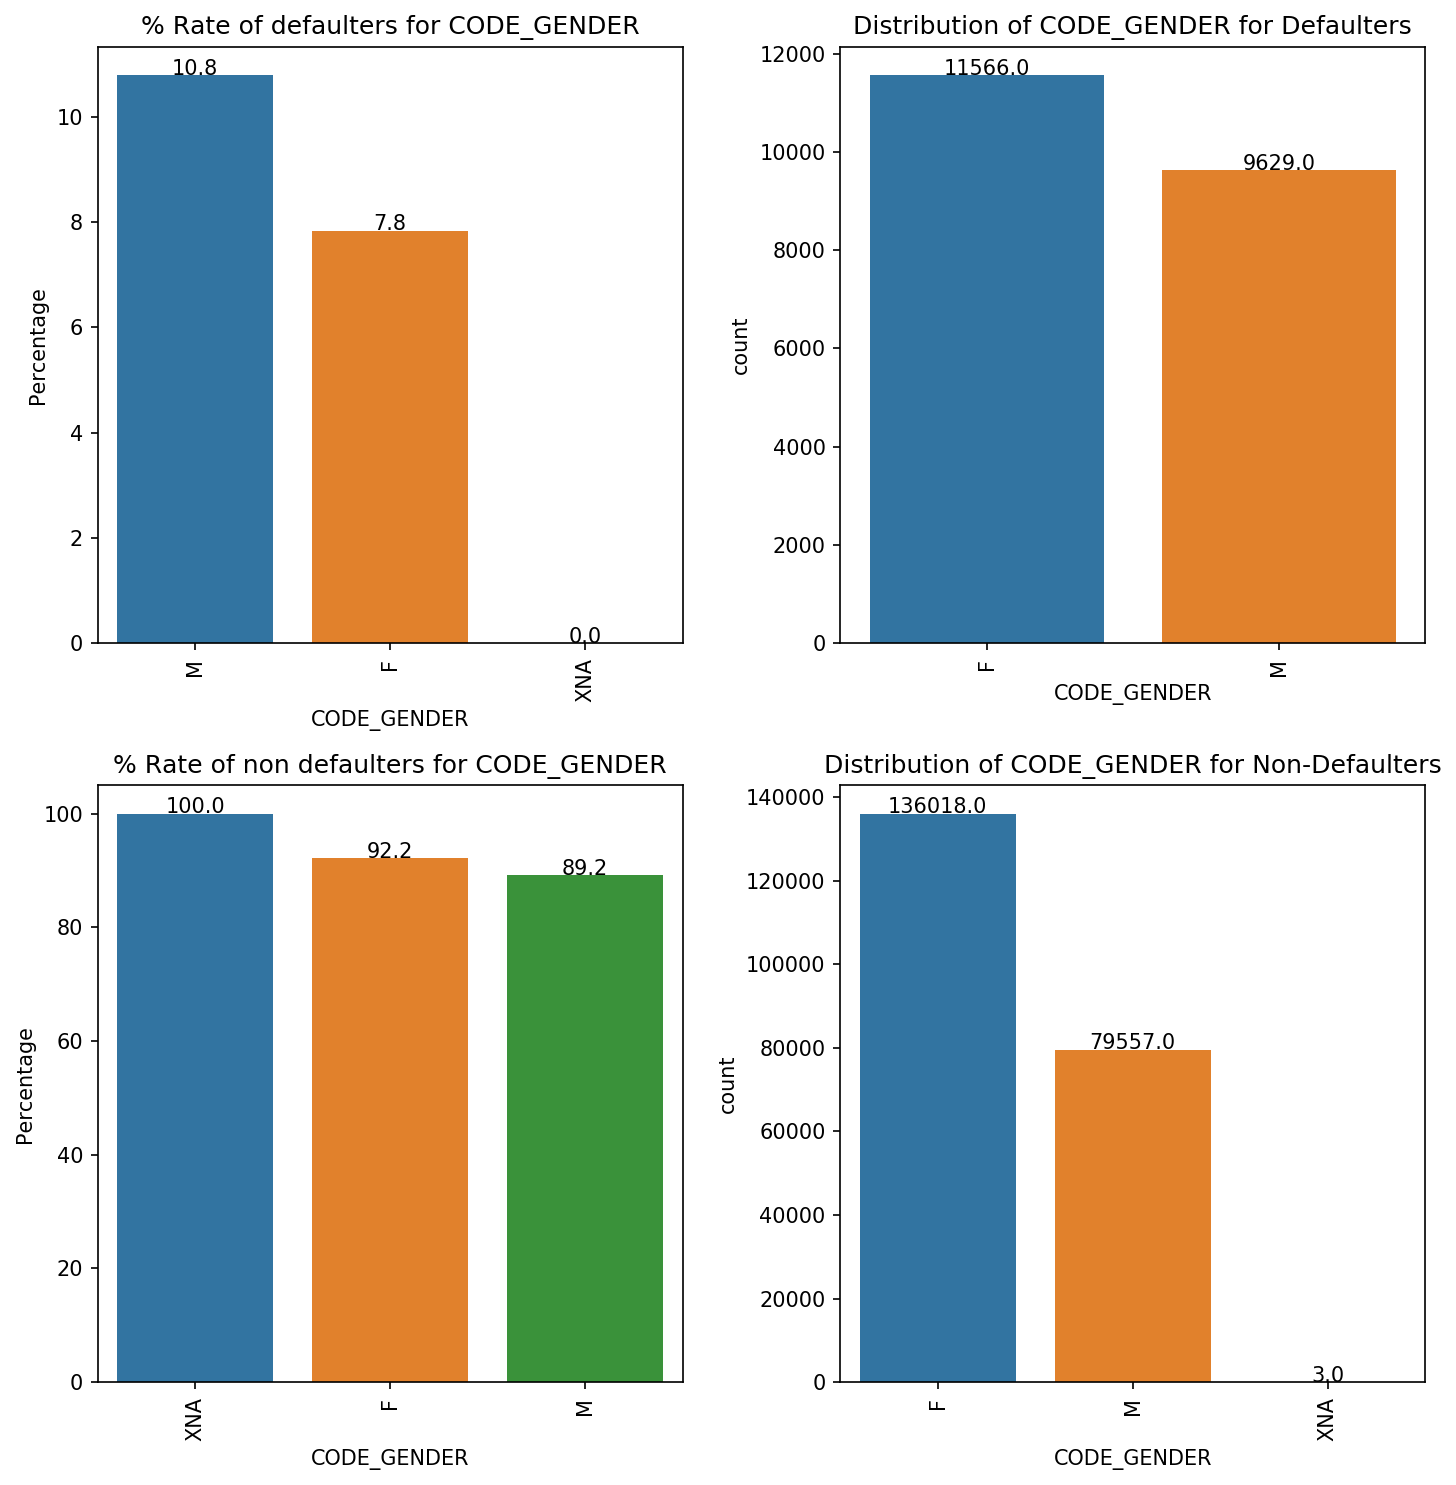

In [309]:
# Plot for gender code
plot_univariatePercentage('CODE_GENDER','annot',log=False)

### INFERENCES:
1. Most of the loan applicants are Female (62%). 
2. However, the percentage of Males who are likely to default is more than that of Females. The percentage of defaulters who are male is 10.8% and that of females is 7.8%.

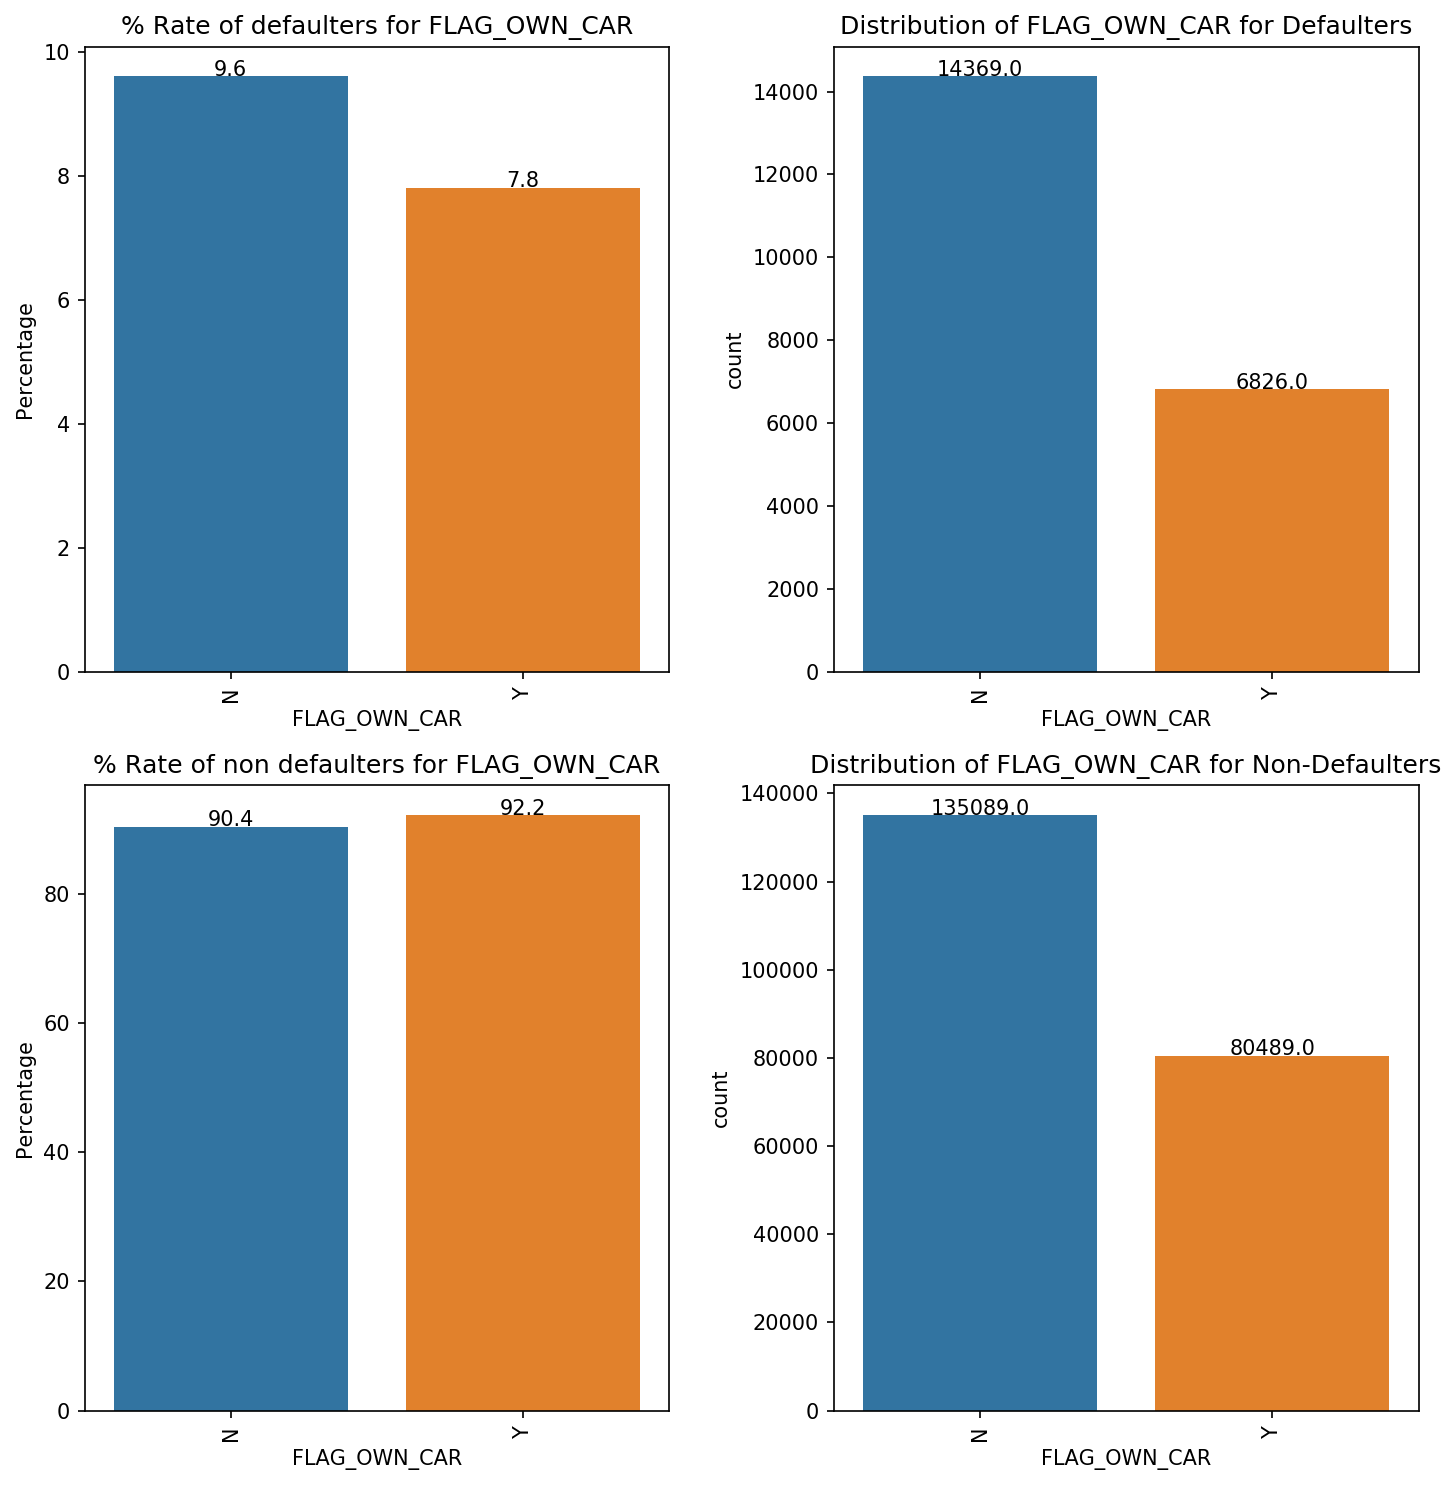

In [310]:
# Plot for own car
plot_univariatePercentage('FLAG_OWN_CAR','annot',log=False)

### INFERENCE:
1. Of 236776 loan applicants, 149458 (63%) people do not own a car.
2. From the total number of loan applicants who do not own a car, 9.6% are defaulters. From the total number of people who own a car, about 7.8% people are defaulters.

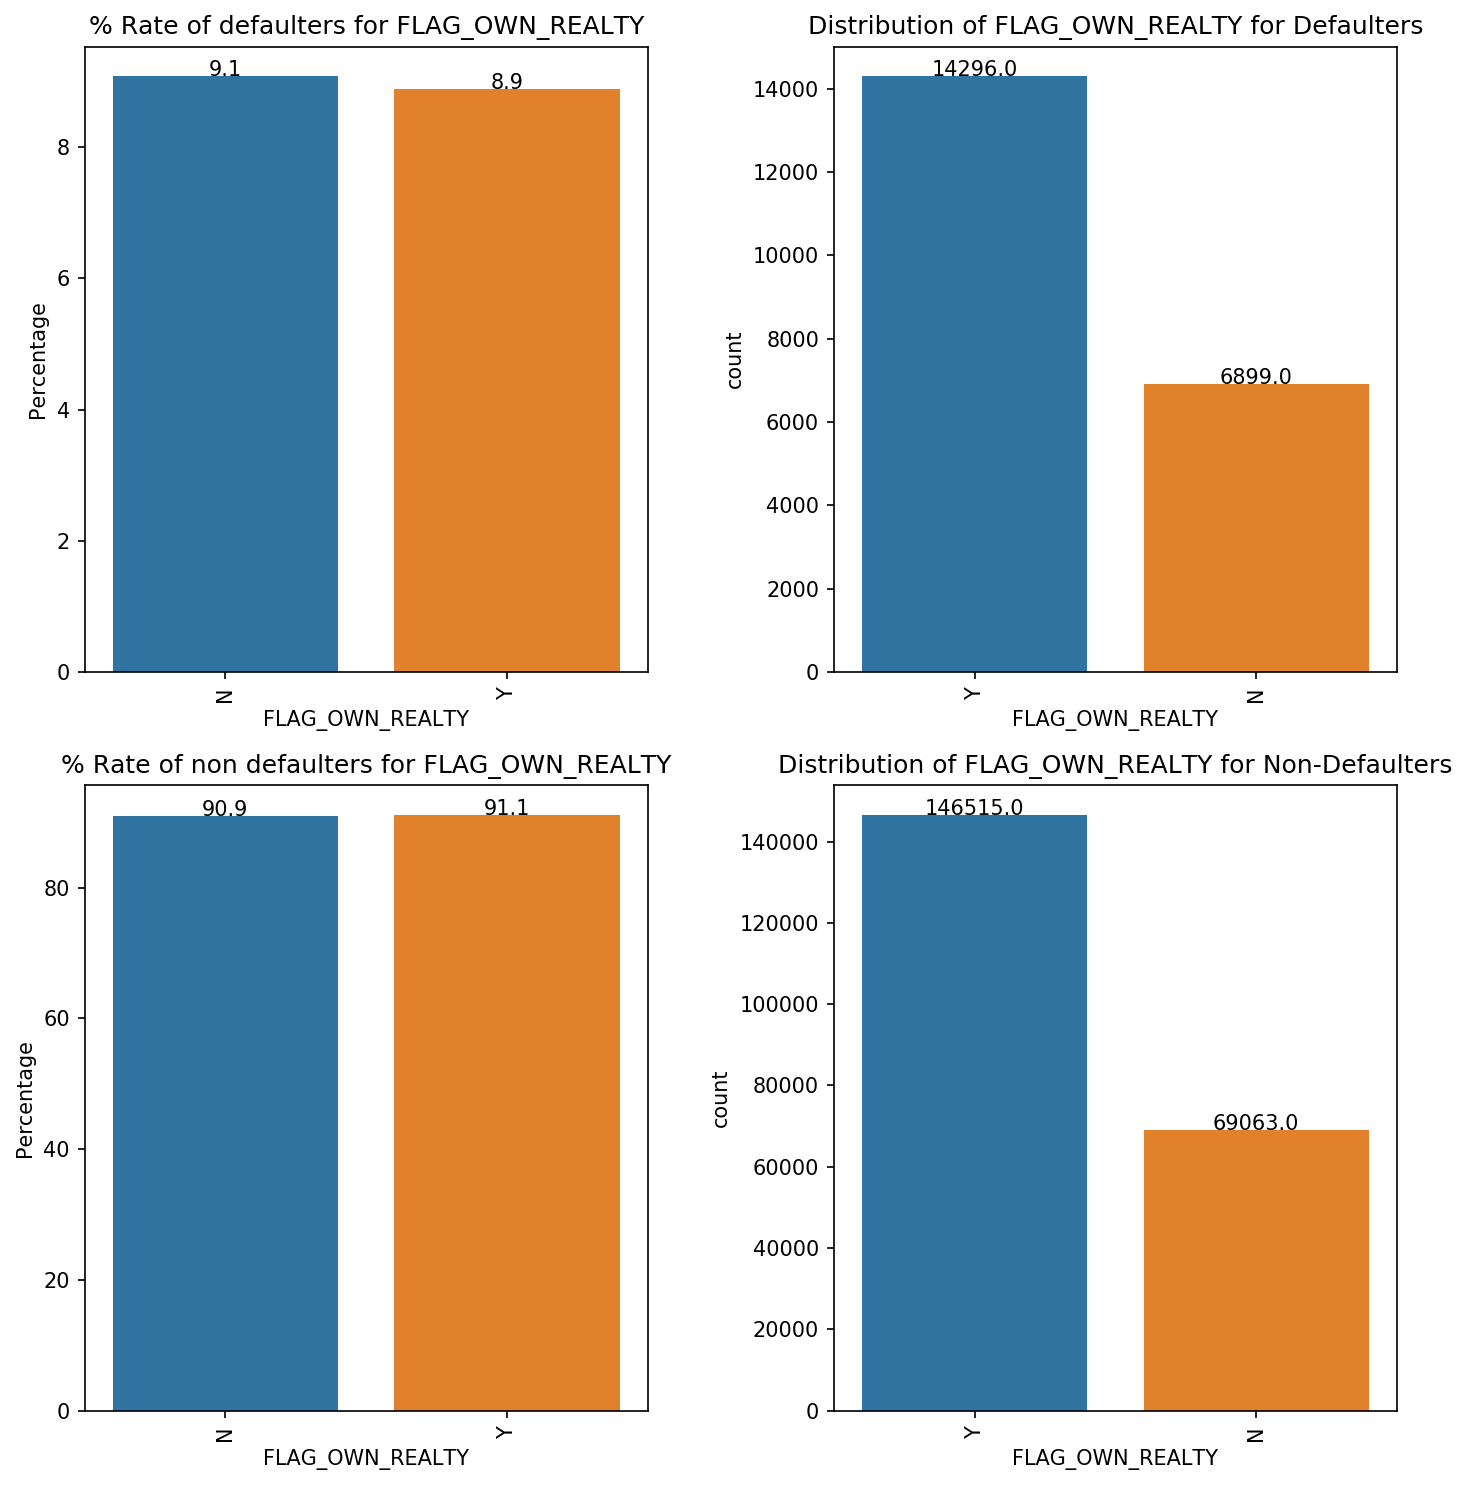

In [311]:
# Plot for realty
plot_univariatePercentage('FLAG_OWN_REALTY','annot',log=False)

### INFERENCE:
1. Most of the loan applicants - about 68% own a house.
2. Loan applicants who do not own a house are more likely to default than those who own a house. 9.1% of applicants who do not own a house are defaulters whereas 8.9% of applicants who own a house are defaulters.
3. About 91% of the applicants who own a house are likely to repay their loan on time.

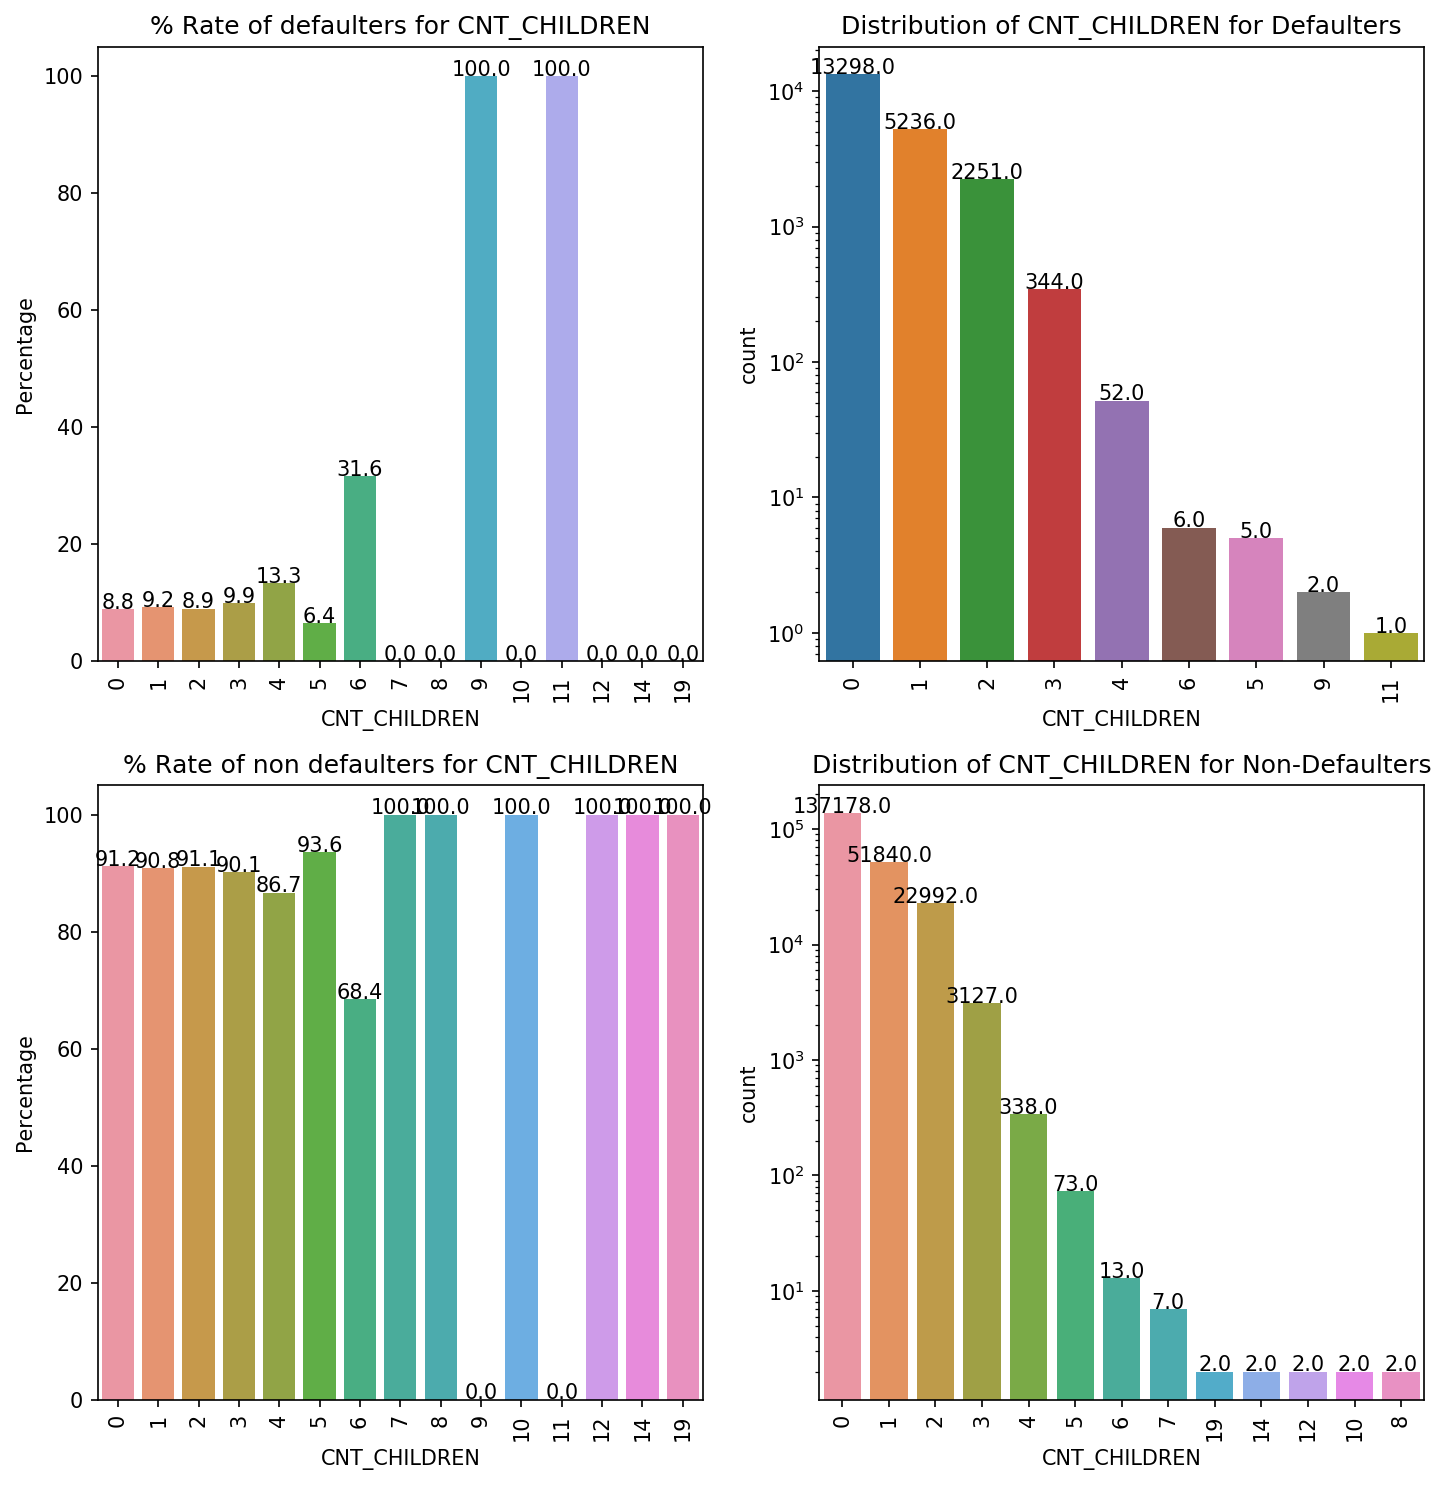

In [312]:
# Plot for count of children
plot_univariatePercentage('CNT_CHILDREN','annot',"log")

### INFERENCE:
1. Majority of the loan applicants (64%) have no children.About 24% have one child.Very few loan applicants have more than 2 children.
2. People who have 9 and 11 children have a 100% default rate. However, since our data has very few applicants having 9 or 11 children, this may not be the trend.
3. 31.6% of the applicants who have 6 children are defaulters compared to applicants who have 1 child where only 8.8% are defaulters.
4. If we consider among applicants who have 1,2,3 or 4 children, 13.3% of the applicants who have 4 children are defaulters.
5. Thus we can say, the default rate is almost directly proportional to the number of children they have. 

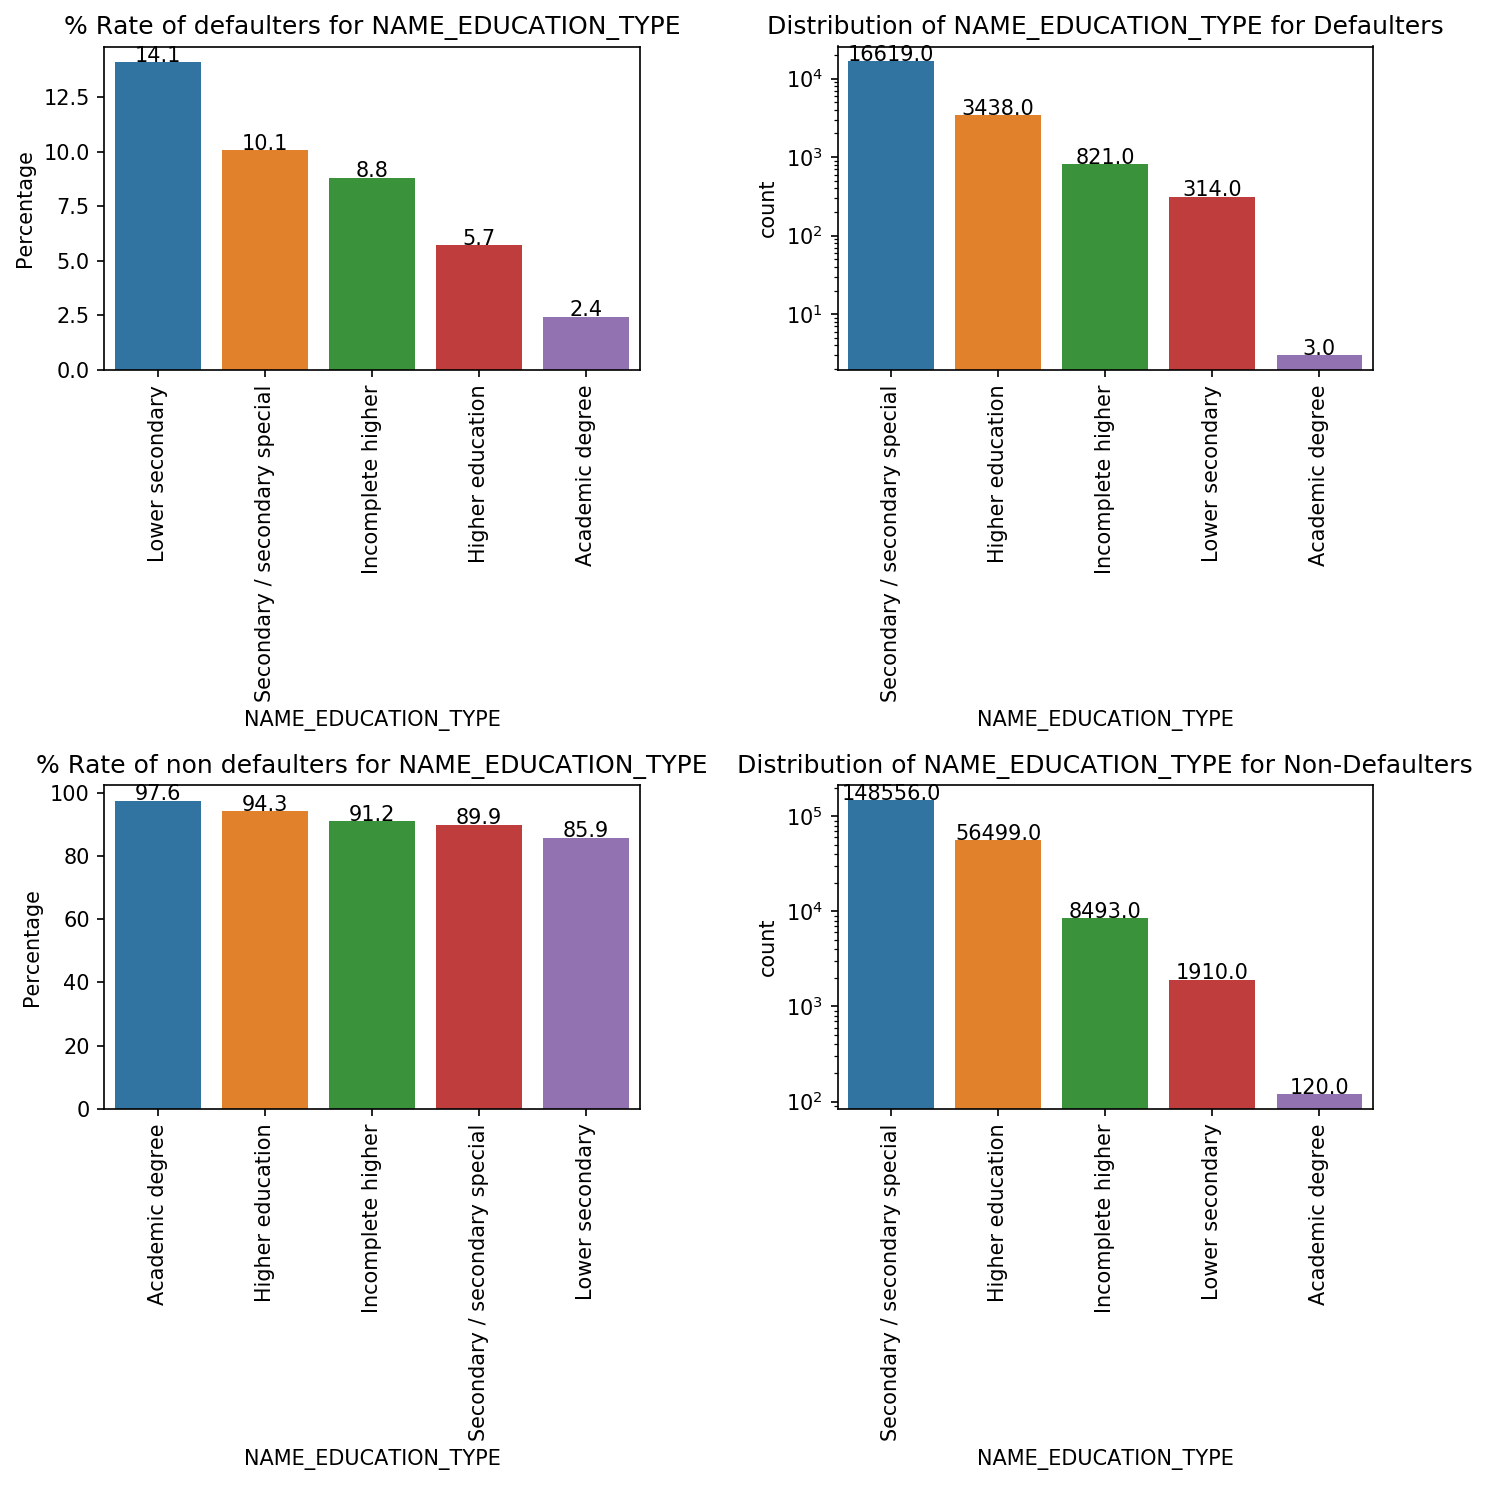

In [313]:
# Plot for education type
plot_univariatePercentage('NAME_EDUCATION_TYPE','annot',"log")

### INFERENCE:
1. 70% of the Loan applicants have completed their education till Secondary/Secondary special level.
2. 14.1% of the applicants who have completed their Lower Secondary are defaulters. Hence, people who completed only lower secondary are more likely to default compared to those who have completed their Academic degrees where the default rate is only 2.4%. 

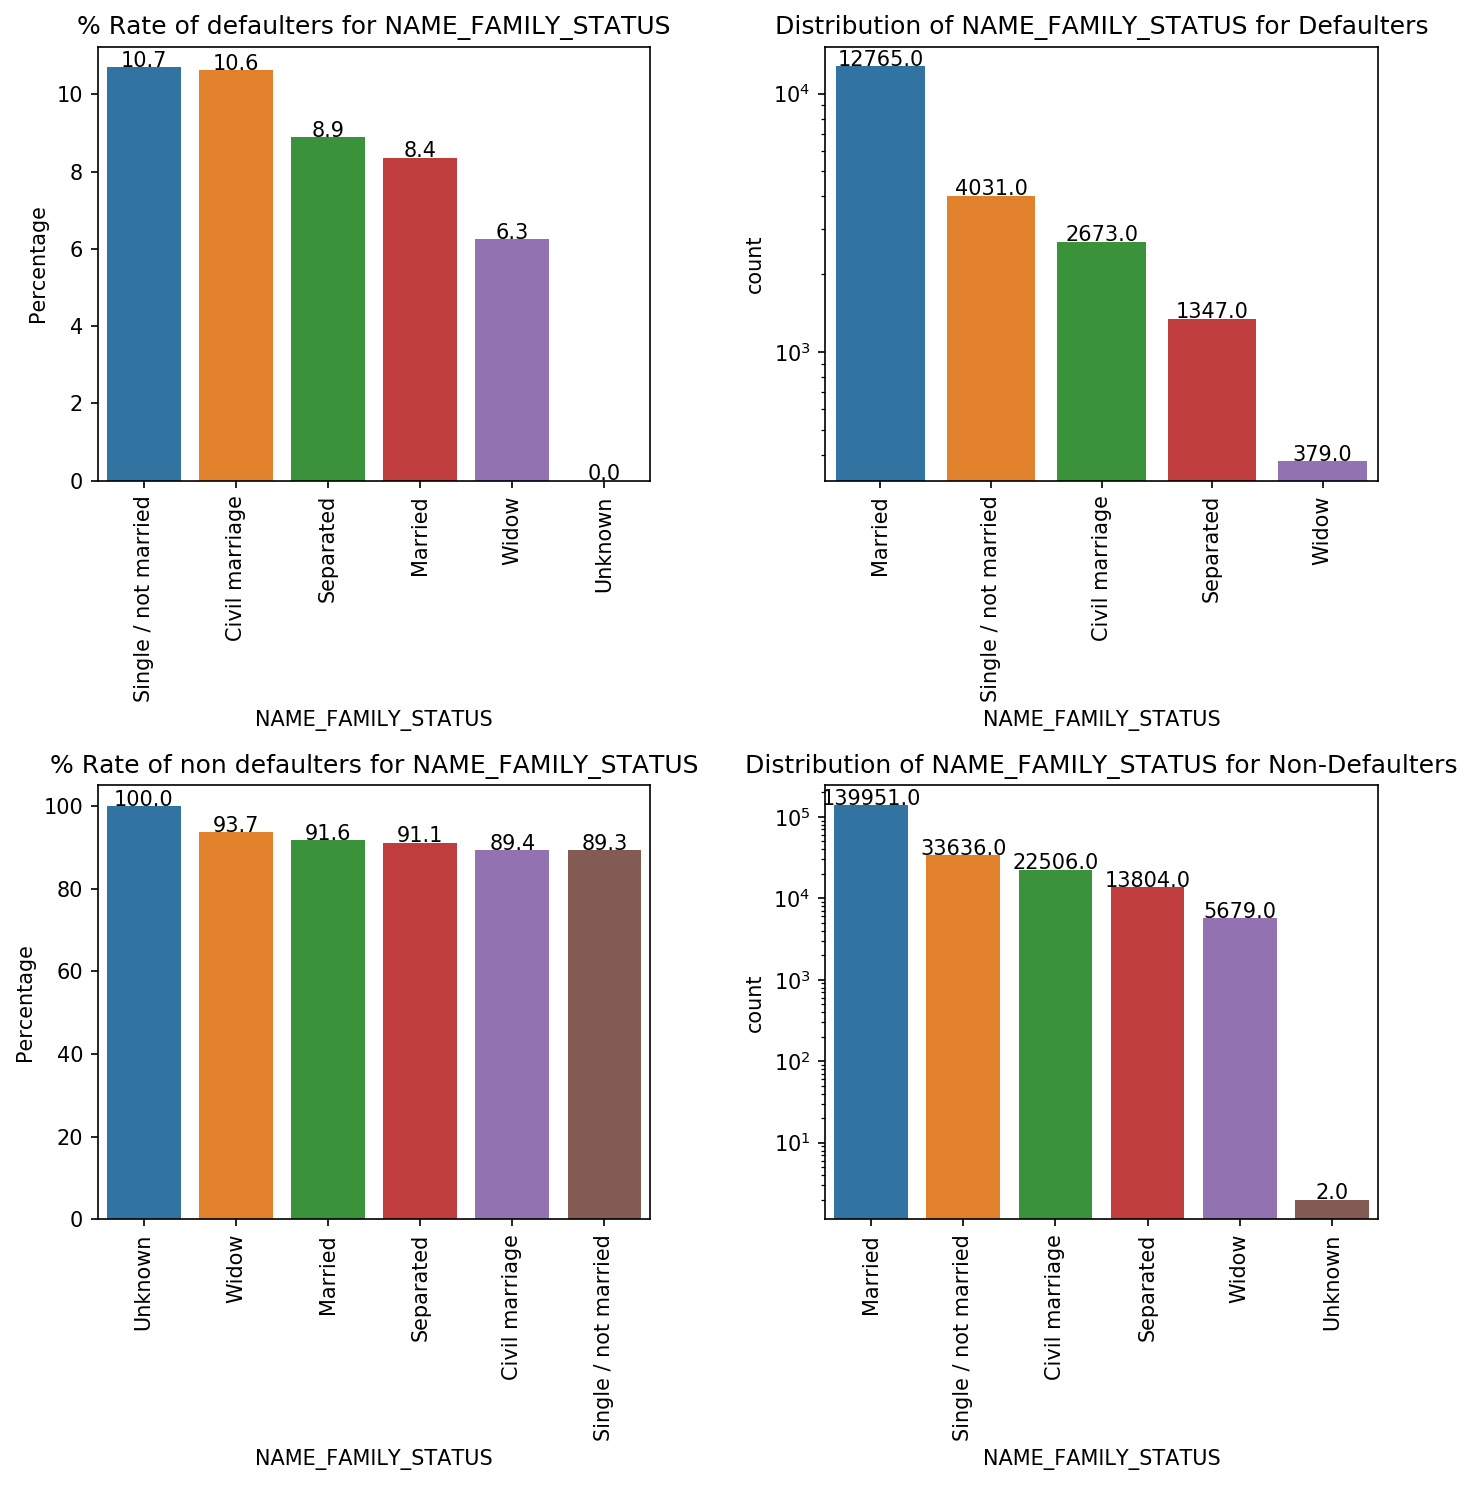

In [314]:
# Plot for family status
plot_univariatePercentage('NAME_FAMILY_STATUS','annot',"log")

### INFERENCE:
1. From the above graph we can see that 65% of the loan applicants are married.
2. Applicants who are Single/Not married and civil marriage are more likely to default than those who are widows or are married.
3. 10.7% of Single applicants and 10.6% civil marriage applicants are defaulters while only 6% of applicants who are widows are defaulters.

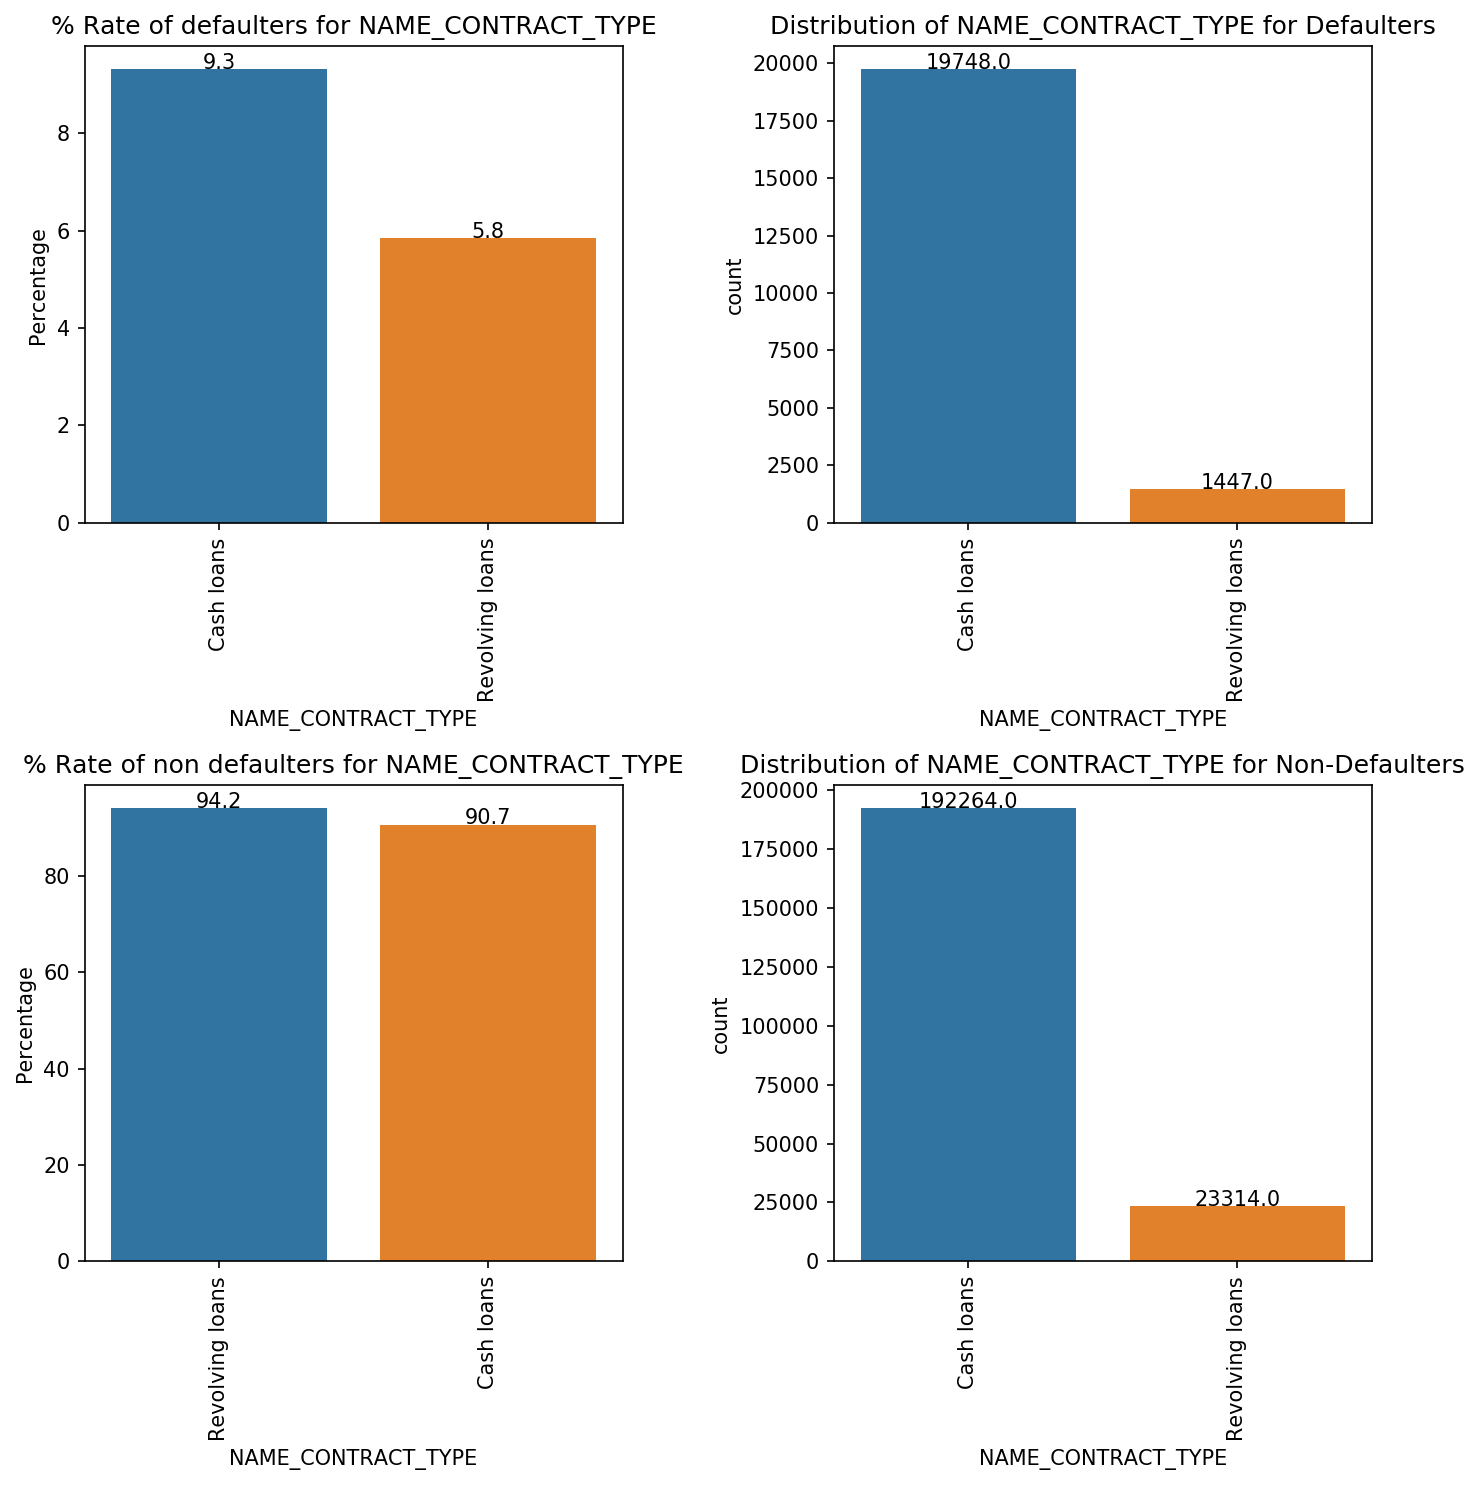

In [315]:
# Plot for contract type
plot_univariatePercentage('NAME_CONTRACT_TYPE','annot',log=False)

### INFERENCE:
1. The number of cash loans(89.5%) is much higher than Revolving type (10%) of loans.
2. Loan applicnats who apply for cash loans are more likely to default when compared to applicants who have applied for revolving type of loans.
3. 9.3% of applicants who have applied for cash loans are defaulters.

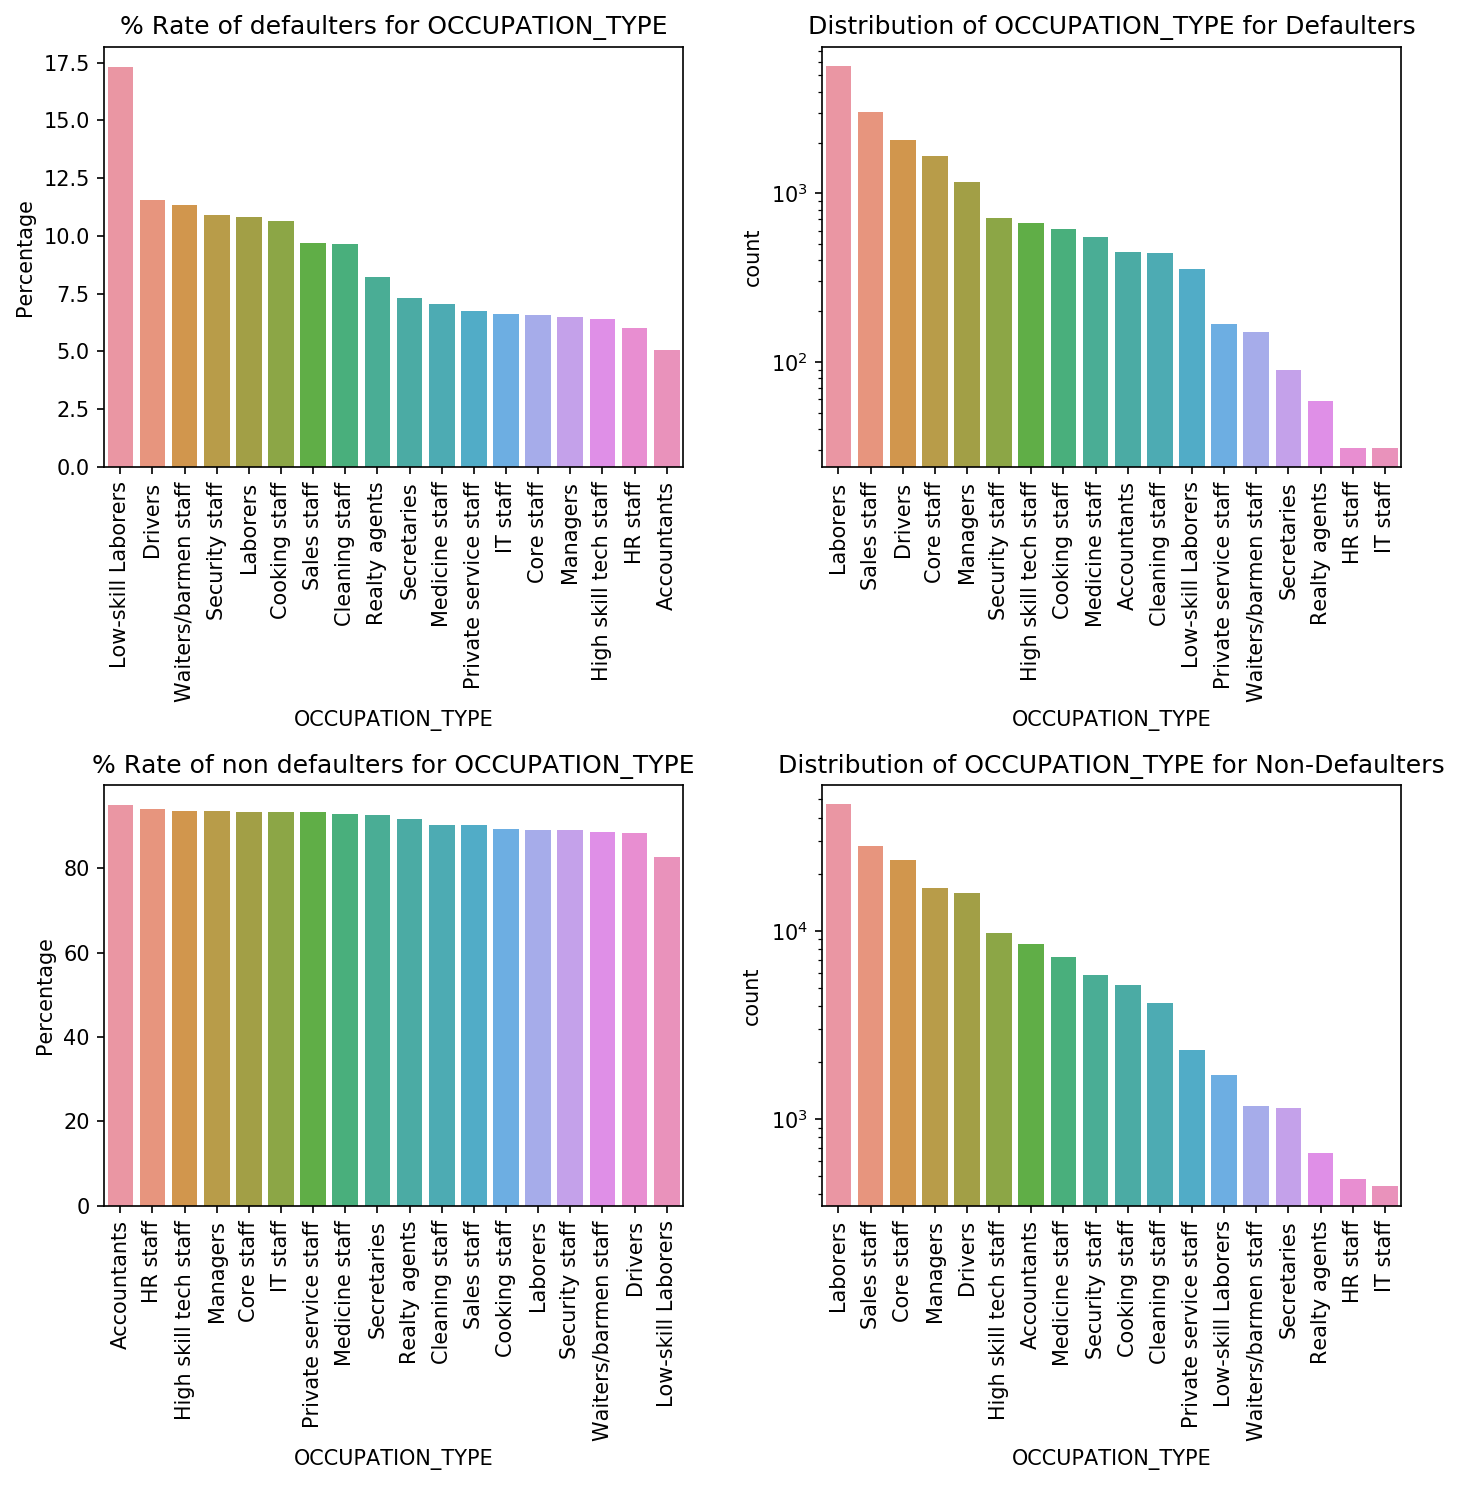

In [316]:
# Plot for occupation type
plot_univariatePercentage('OCCUPATION_TYPE', annot=False,log=True)

### INFERENCE:
1. Majority of the Loan applicants are Laborers and sales staff. IT staff and HR staff form a minority of the loan applicants.
2. Low-skill Laborers are more likely to default than Accountants, HR staff and High skill Tech staff.
3. Amongst the Low skill Laborers, about 17% applicants are defaulters whereas only about 5% of accountants are defaulters.
4. Low skilled labourers, drivers, waiter/barmen staff, security staff, labourers, cooking staff are likely to default compared to managers and core staff.

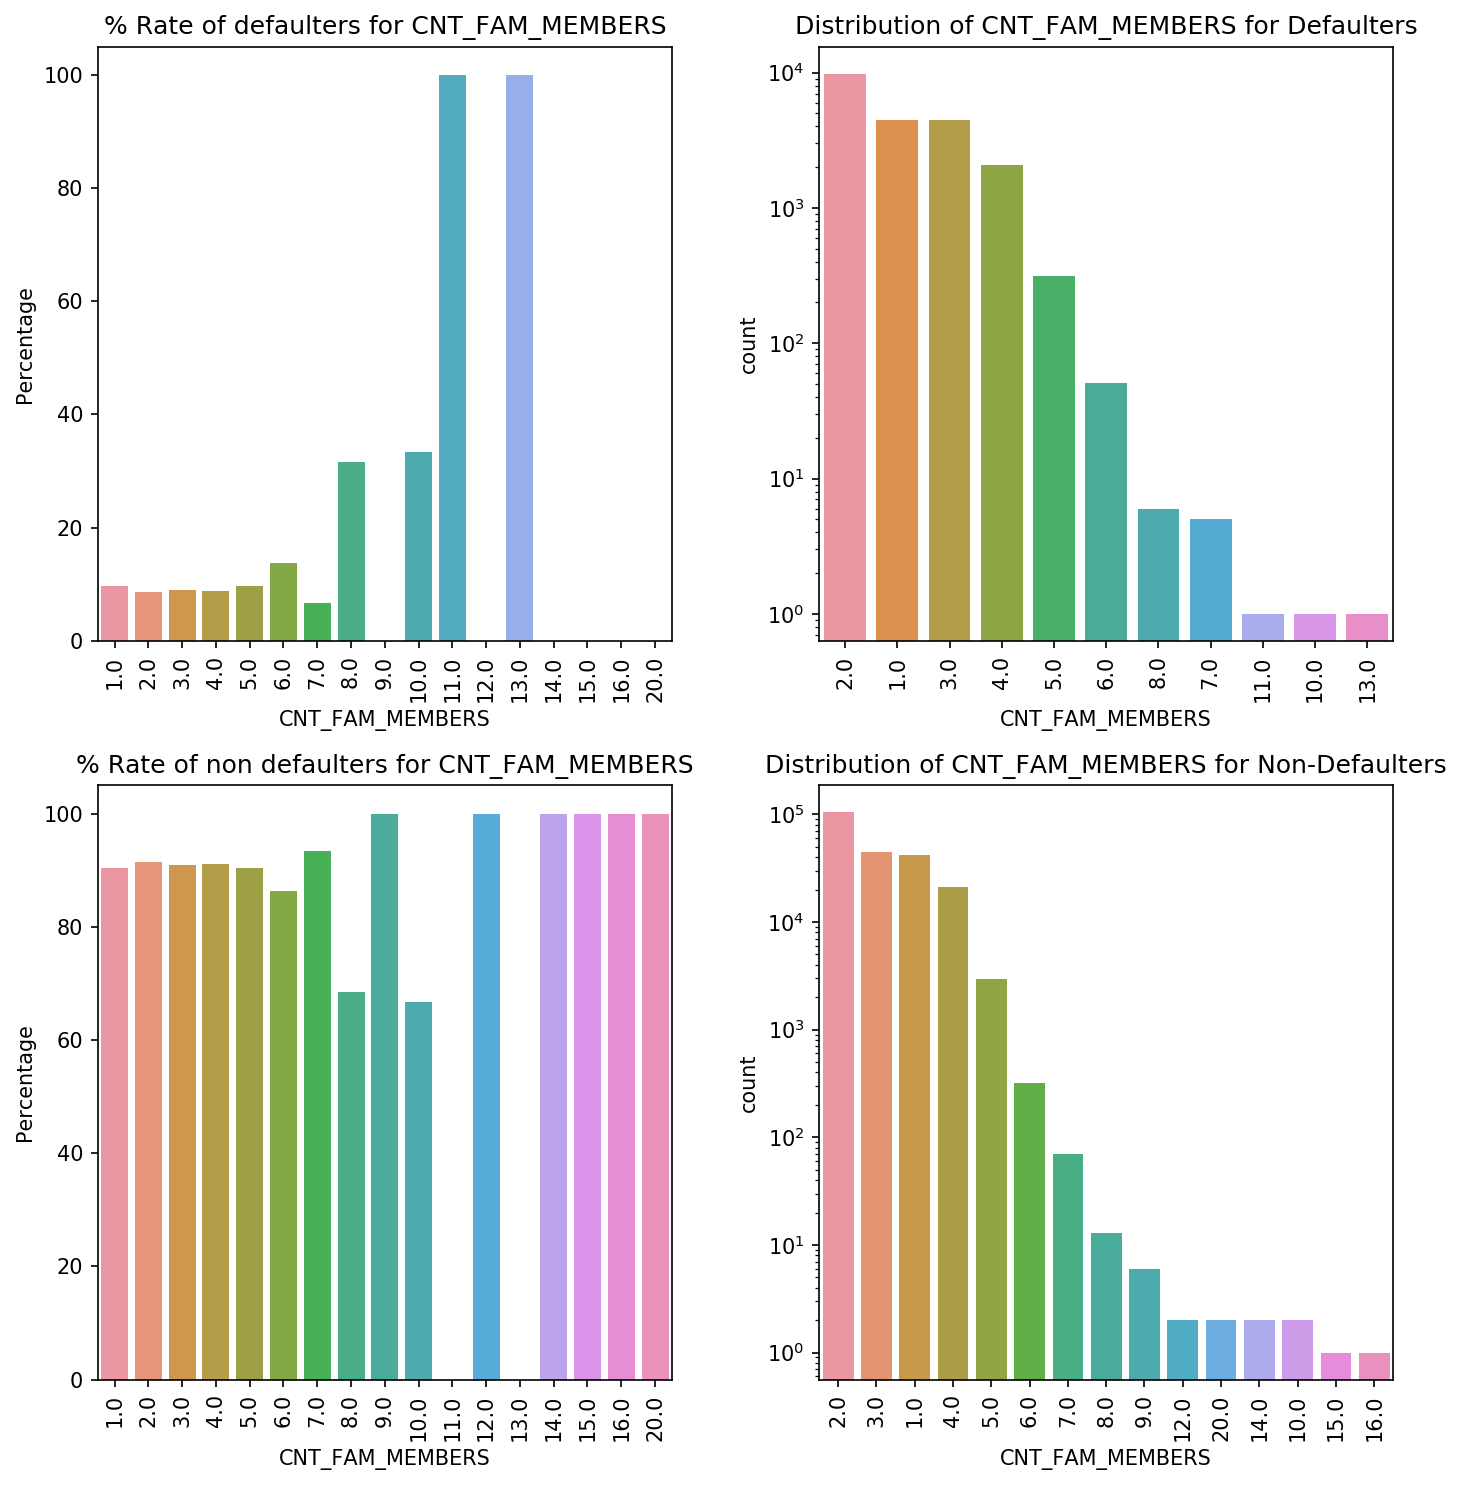

In [317]:
# Plot for count of family members
plot_univariatePercentage('CNT_FAM_MEMBERS',annot=False,log=True)

### INFERENCE:
1. From the countplot we can see that most loan applicants have 1 or 2 family members.
2. If we consider applicants with 1,2,3,4,5 or 6 family members, we can see that people with higher family members have a trend to default.

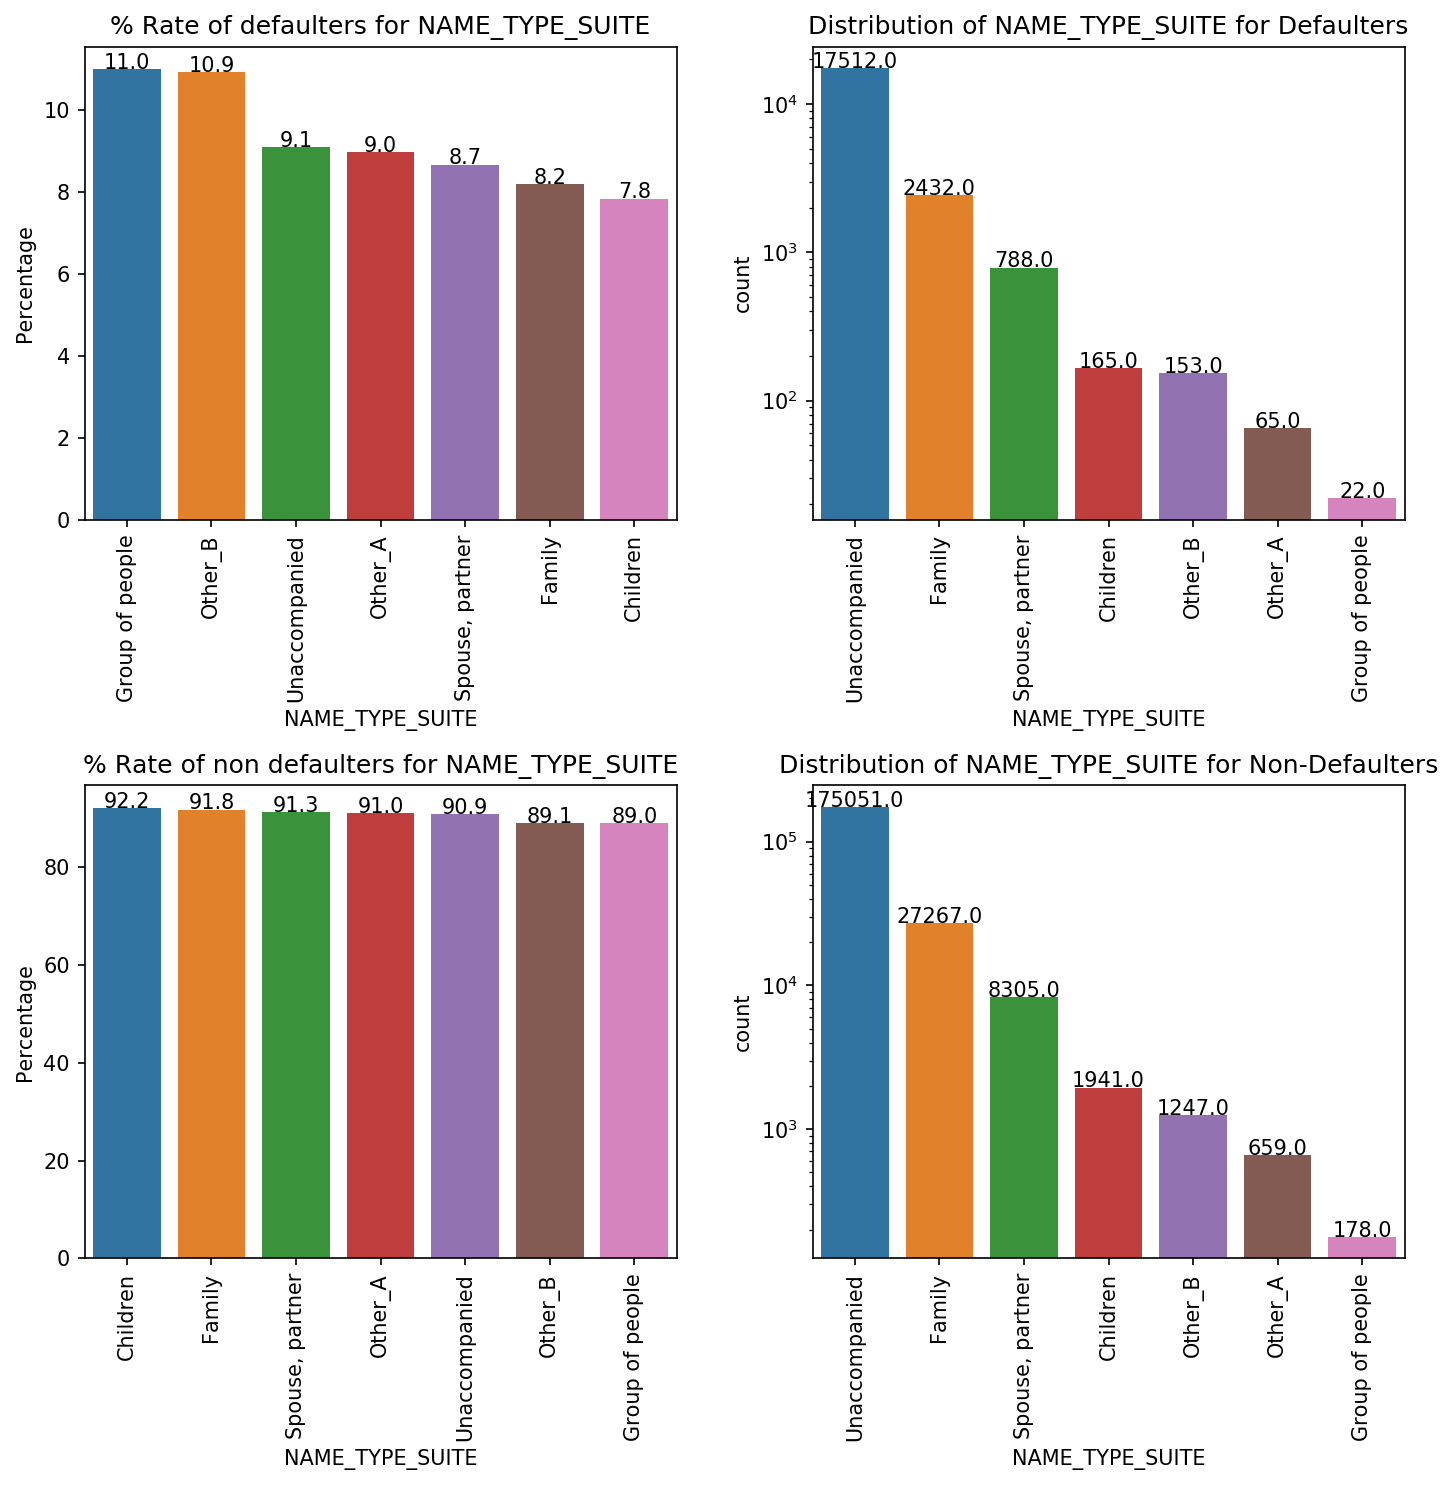

In [318]:
# Plot for type suite
plot_univariatePercentage('NAME_TYPE_SUITE','annot','log')

### INFERENCE:
TYPE SUITE refers to who accompanied the applicant while applying the loan
1. From the above graph, we can see that most of the loan applicants were unaccompanied or came with family.
2. Applicants who came with group of people are likely to default than others.

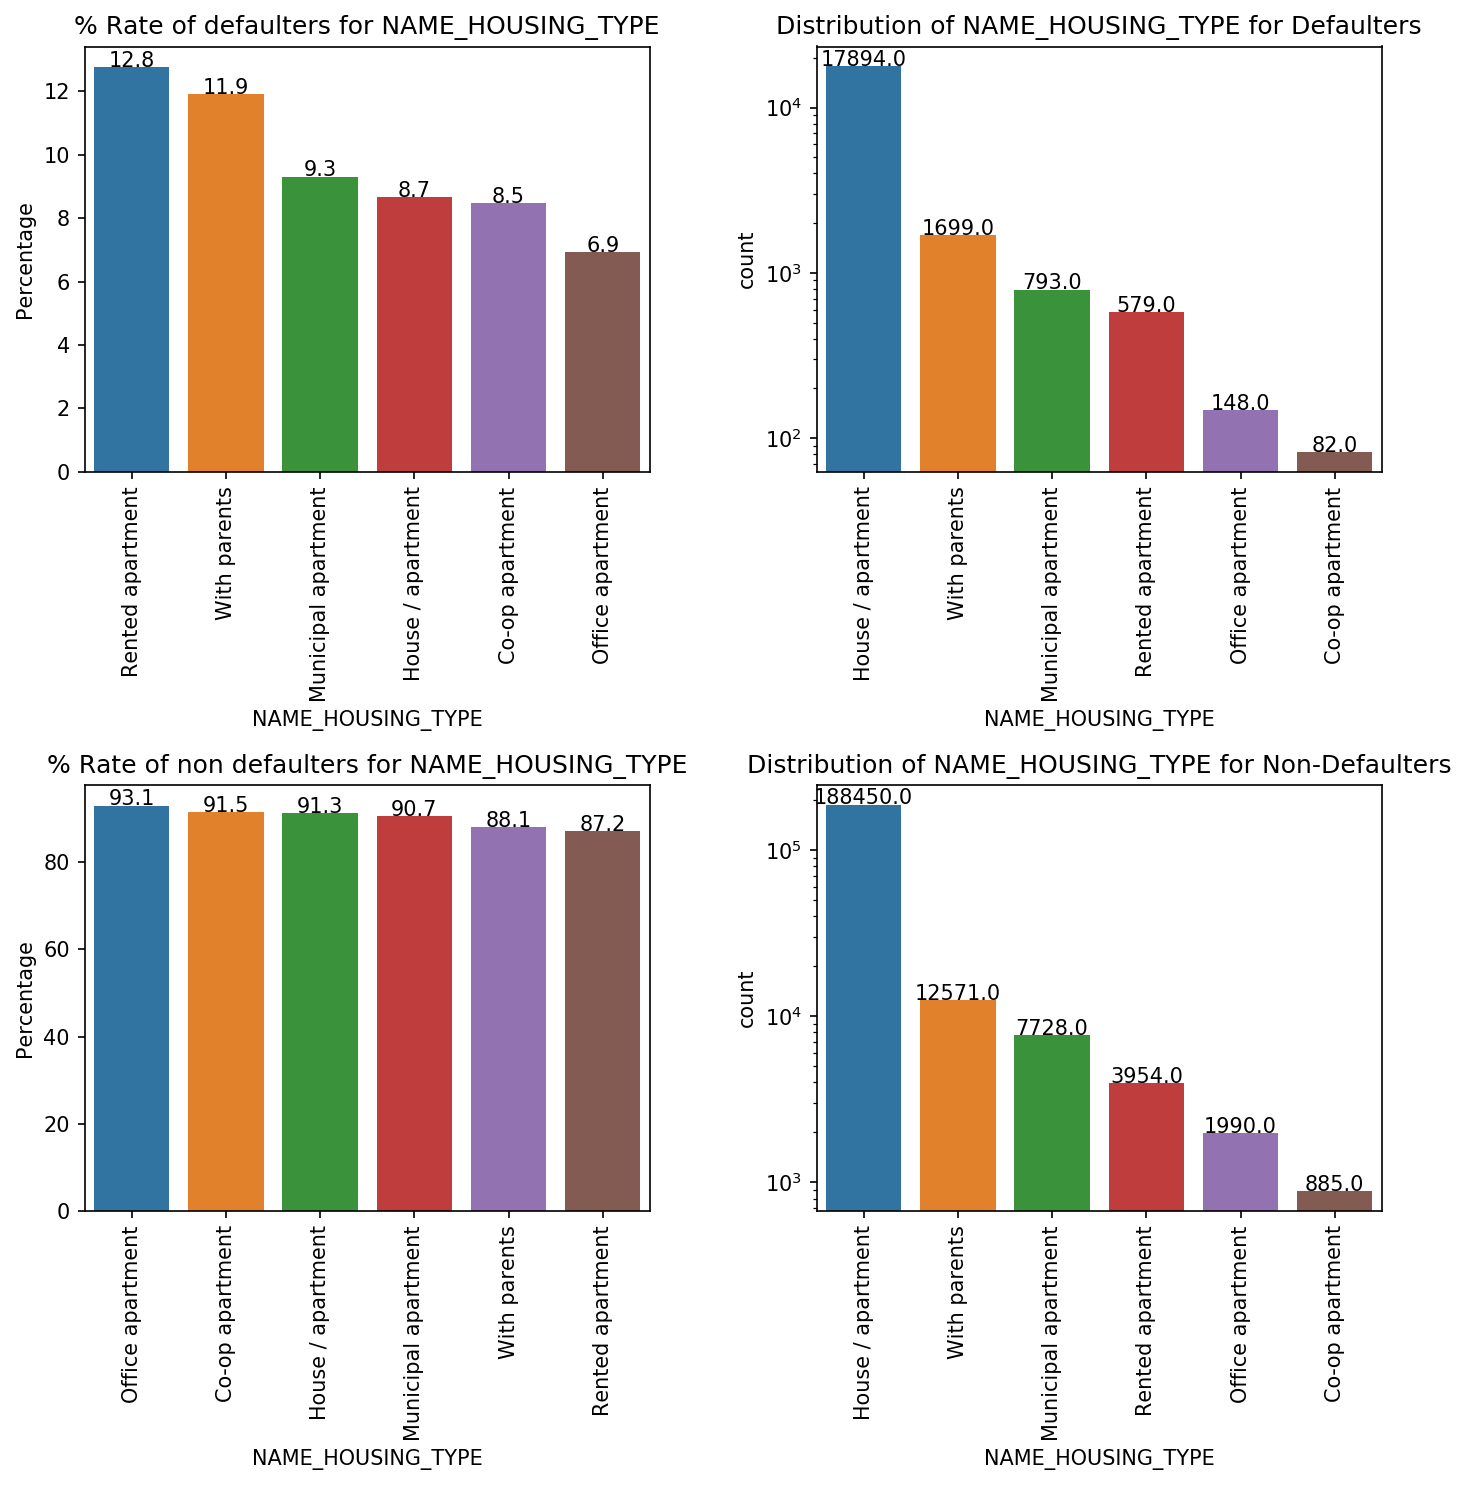

In [319]:
# Plot for housing type
plot_univariatePercentage('NAME_HOUSING_TYPE','annot','log')

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants are living in house/apartment.
2. Clients living in rented apartments and those living with parents are likely to default than others.

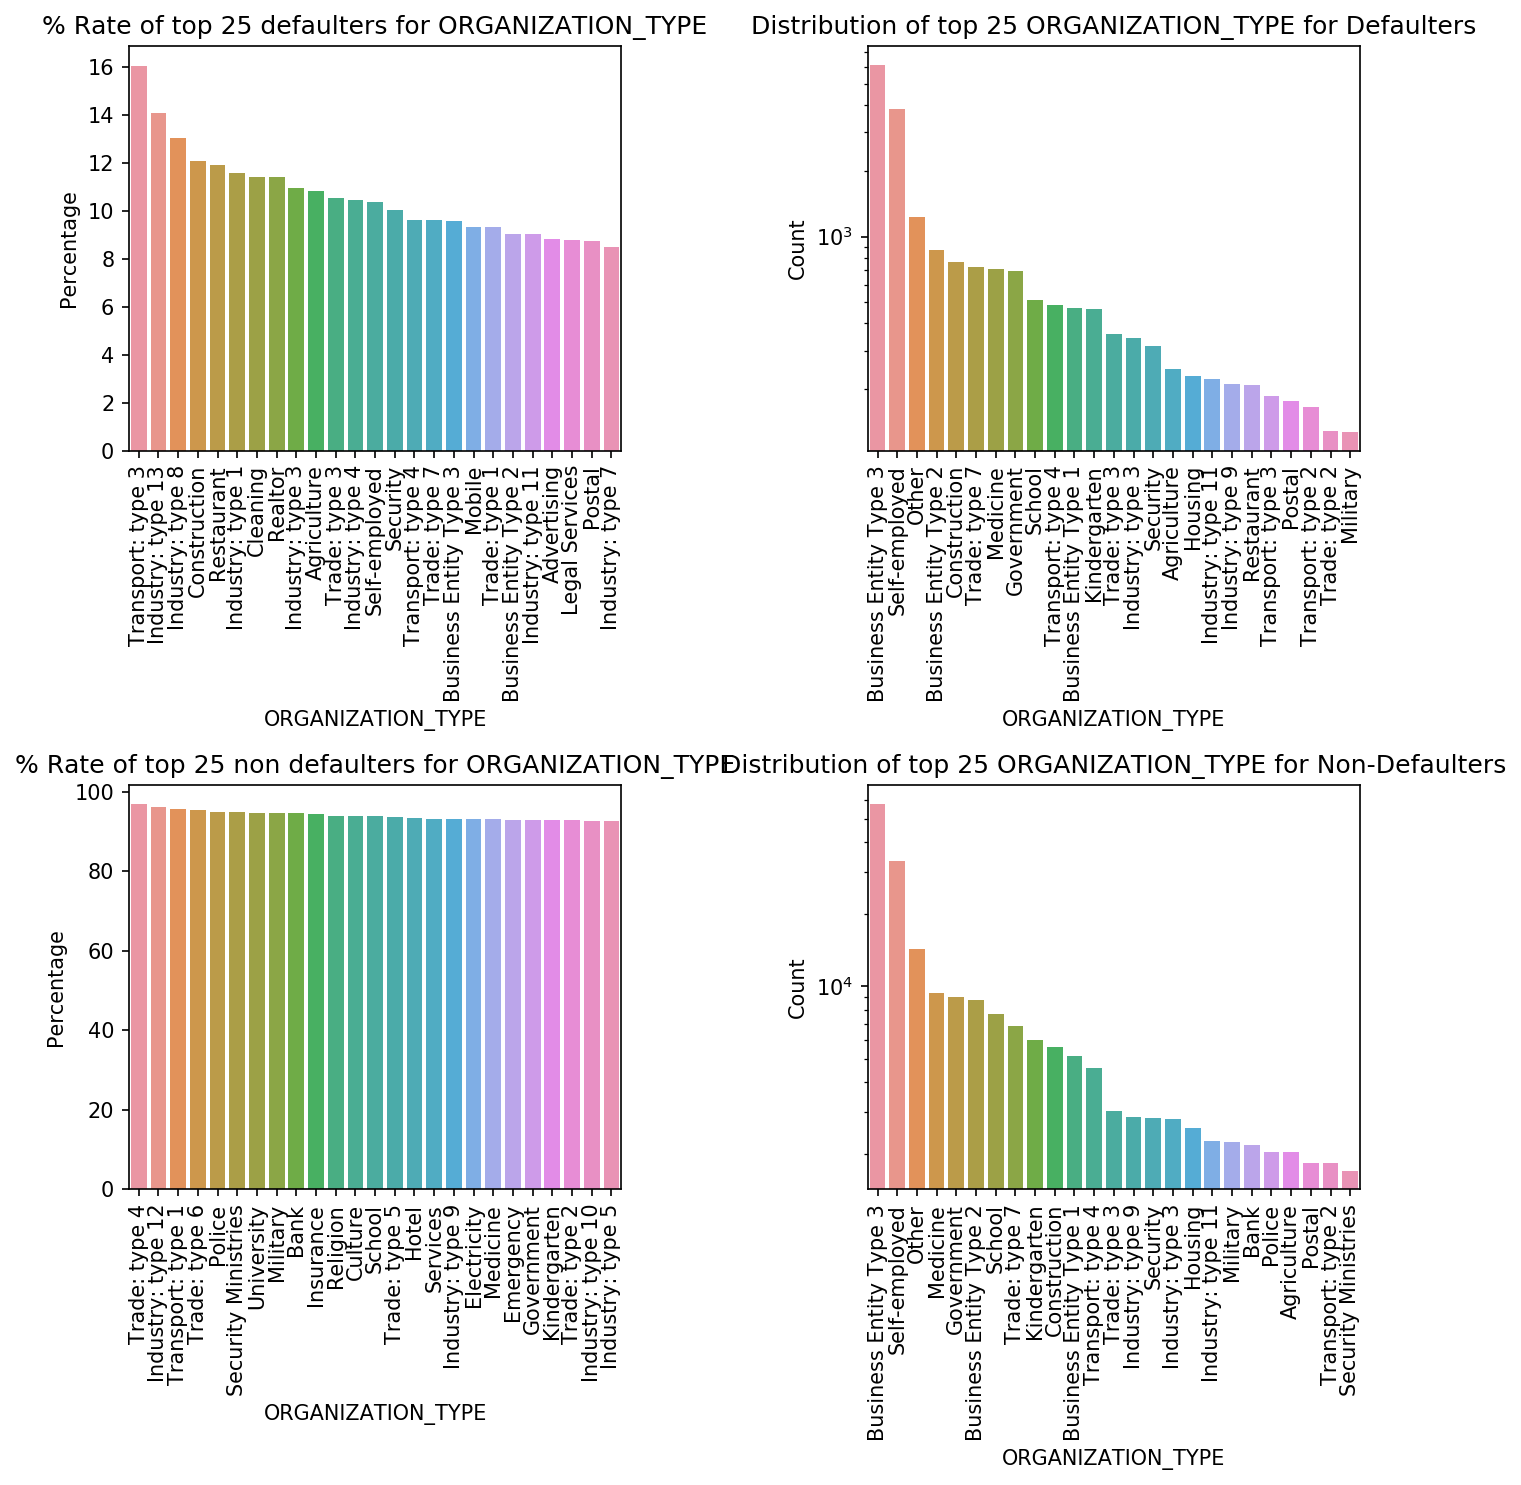

In [320]:
# Plot for organization type
fig=plt.figure(figsize=(10,10),dpi=150)
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)
ax1.set_title('% Rate of top 25 defaulters for ORGANIZATION_TYPE')
ax2.set_title('Distribution of top 25 ORGANIZATION_TYPE for Defaulters')
ax3.set_title('% Rate of top 25 non defaulters for ORGANIZATION_TYPE')
ax4.set_title('Distribution of top 25 ORGANIZATION_TYPE for Non-Defaulters')

ax1.set_ylabel('Percentage')
ax3.set_ylabel('Percentage')

ax2.set_xlabel('ORGANIZATION_TYPE')
ax4.set_xlabel('ORGANIZATION_TYPE')
ax2.set_ylabel('Count')
ax4.set_ylabel('Count')

cDf=pd.crosstab(app_data['ORGANIZATION_TYPE'],app_data['TARGET']).apply(lambda r: r*100/r.sum(), axis=1)
    
dDf=cDf[1].sort_values(ascending=False)
ndDf=cDf[0].sort_values(ascending=False)

dDf=dDf.iloc[0:25]
ndDf=ndDf.iloc[0:25]
p1=sns.barplot(y=dDf.values,x=dDf.index, ax=ax1)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
    
p2=sns.barplot(y=ndDf.values,x=ndDf.index, ax=ax3)
p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

cntDdf=defaulters_df['ORGANIZATION_TYPE'].value_counts()
cntDdf=cntDdf.iloc[0:25]
p3=sns.barplot(x=cntDdf.index, y= cntDdf.values,ax=ax2)
p3.set_xticklabels(p3.get_xticklabels(),rotation=90)

cntnDdf=nondefaulters_df['ORGANIZATION_TYPE'].value_counts()
cntnDdf=cntnDdf.iloc[0:25]
p4=sns.barplot(x=cntnDdf.index, y= cntnDdf.values,ax=ax4)
p4.set_xticklabels(p4.get_xticklabels(),rotation=90) 

ax2.set_yscale('log')
ax4.set_yscale('log')
    
fig.tight_layout()
plt.show()

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants have occupation as business entity type 3 and self employed.
2. Clients working in Transport type 3, industry type 13, industry type 8, contruction, restaurant are likely to default than others.

## UNIVARIATE ANALYSIS FOR NUMERICAL COLUMNS

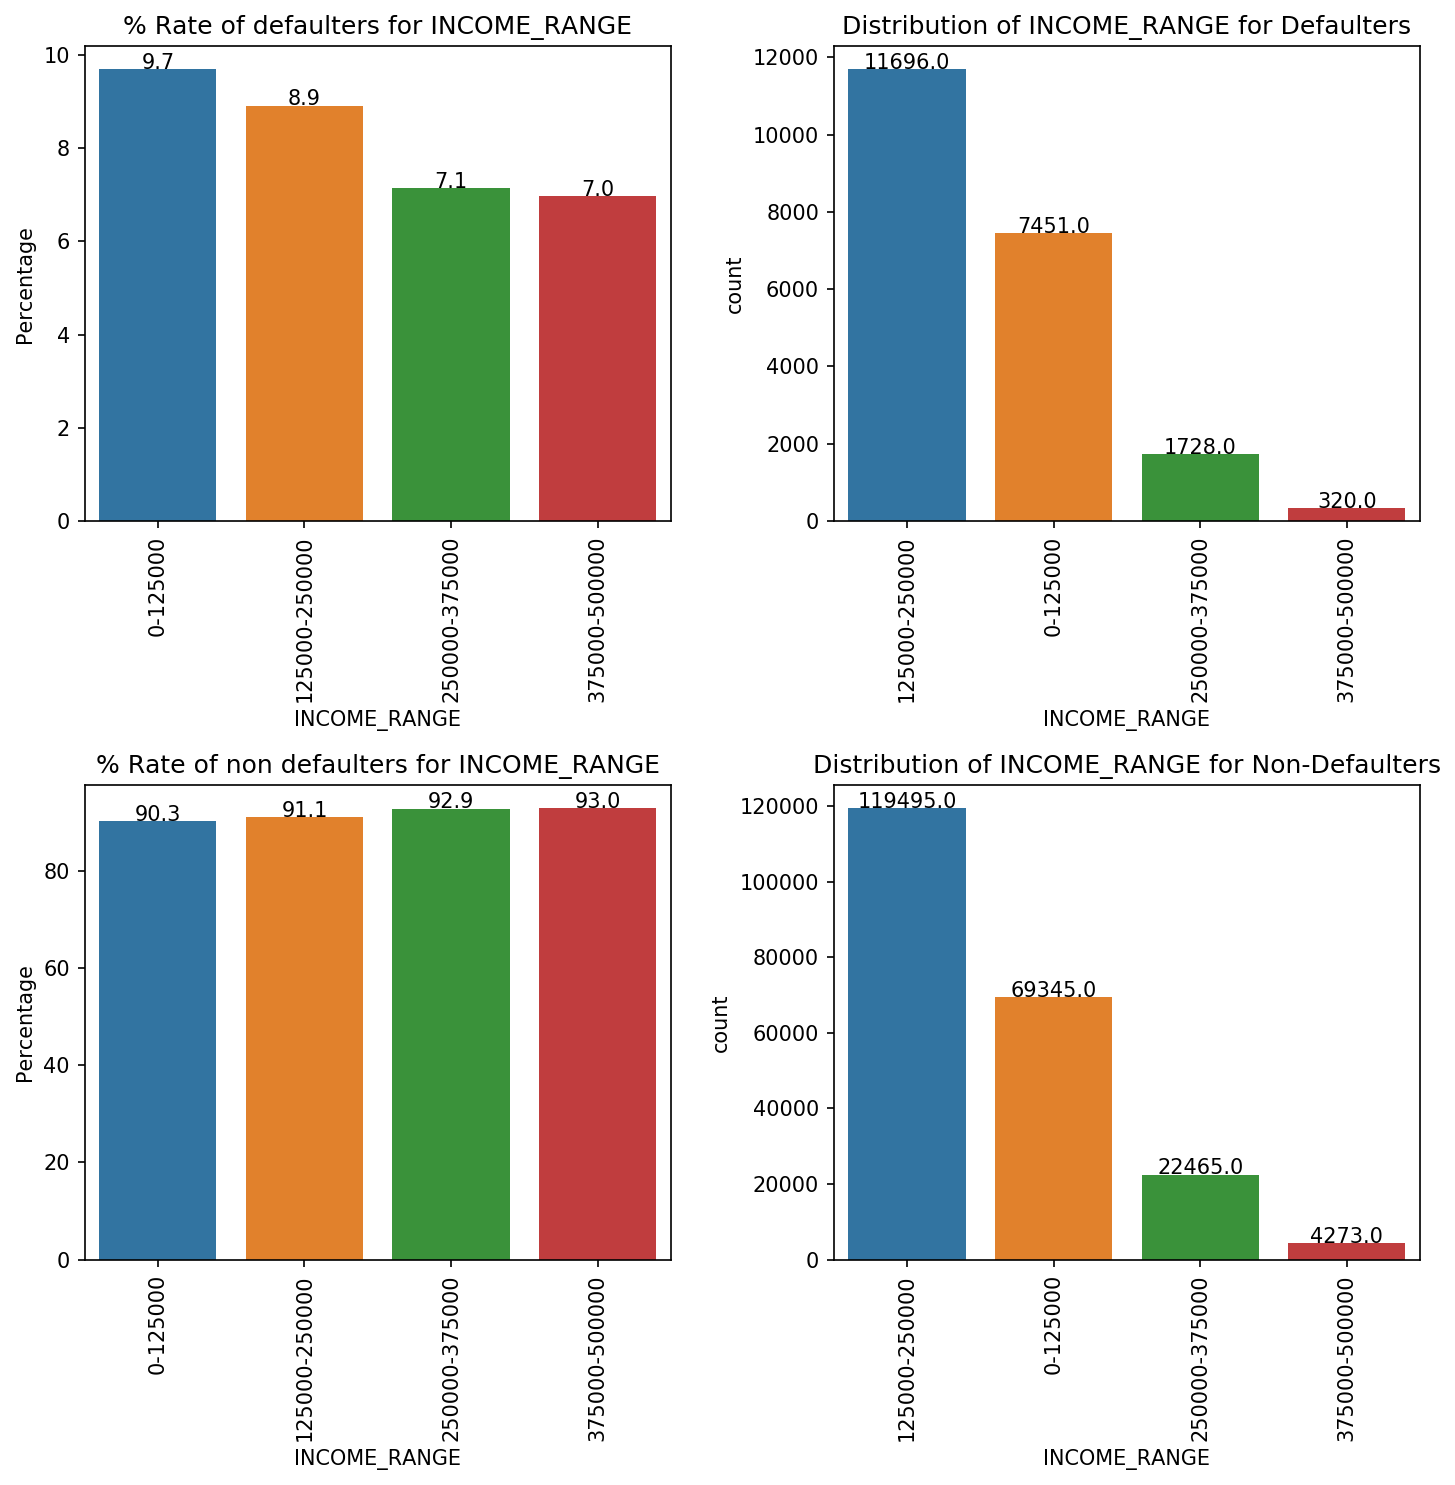

In [321]:
# Plot for income range
plot_univariatePercentage('INCOME_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants are in the income range 1.25L to 2.5L.
2. People in income range 0 to 1.25L are likely to default than others.

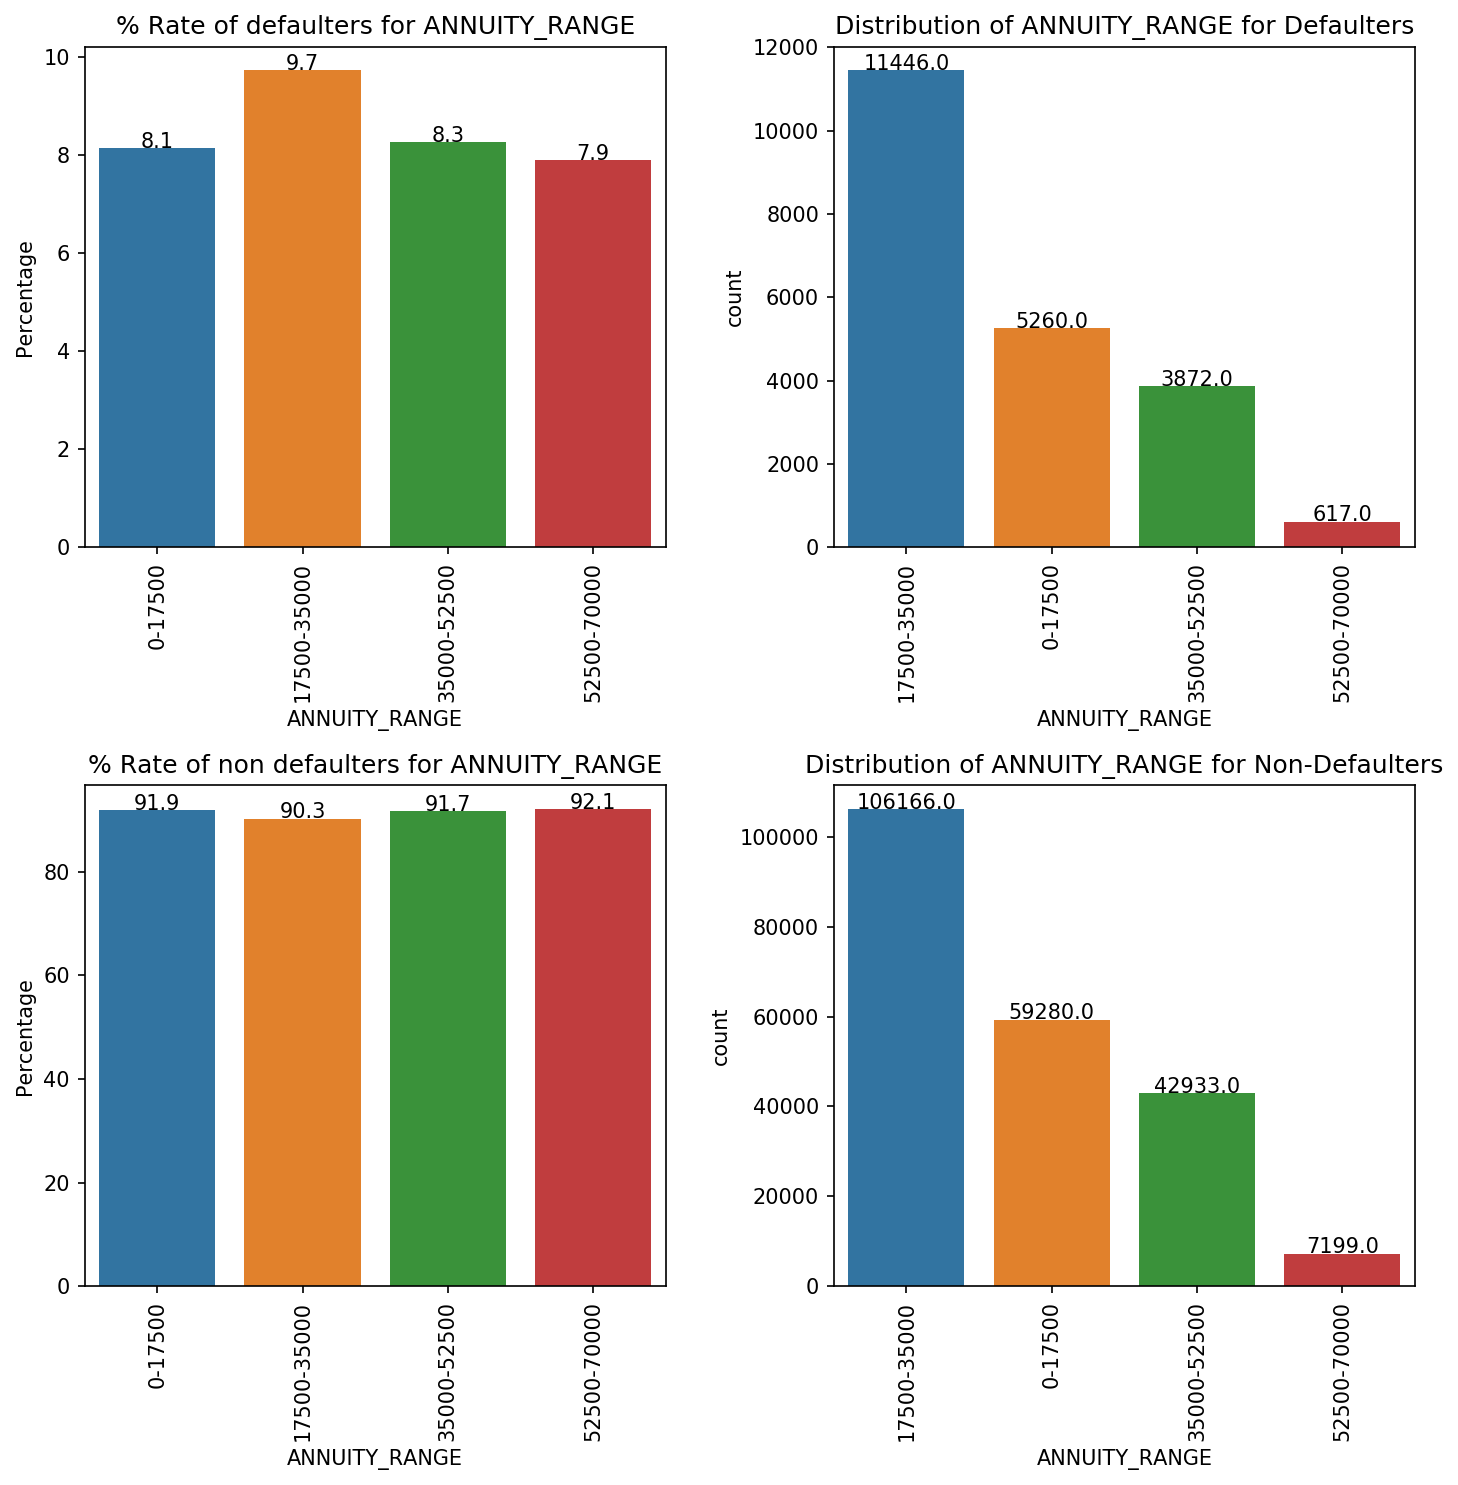

In [322]:
# Plot for annuity range
plot_univariatePercentage('ANNUITY_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants are in the annuity range 17500 to 35000
2. People in annuity range 17500 to 35000 are likely to default than others.

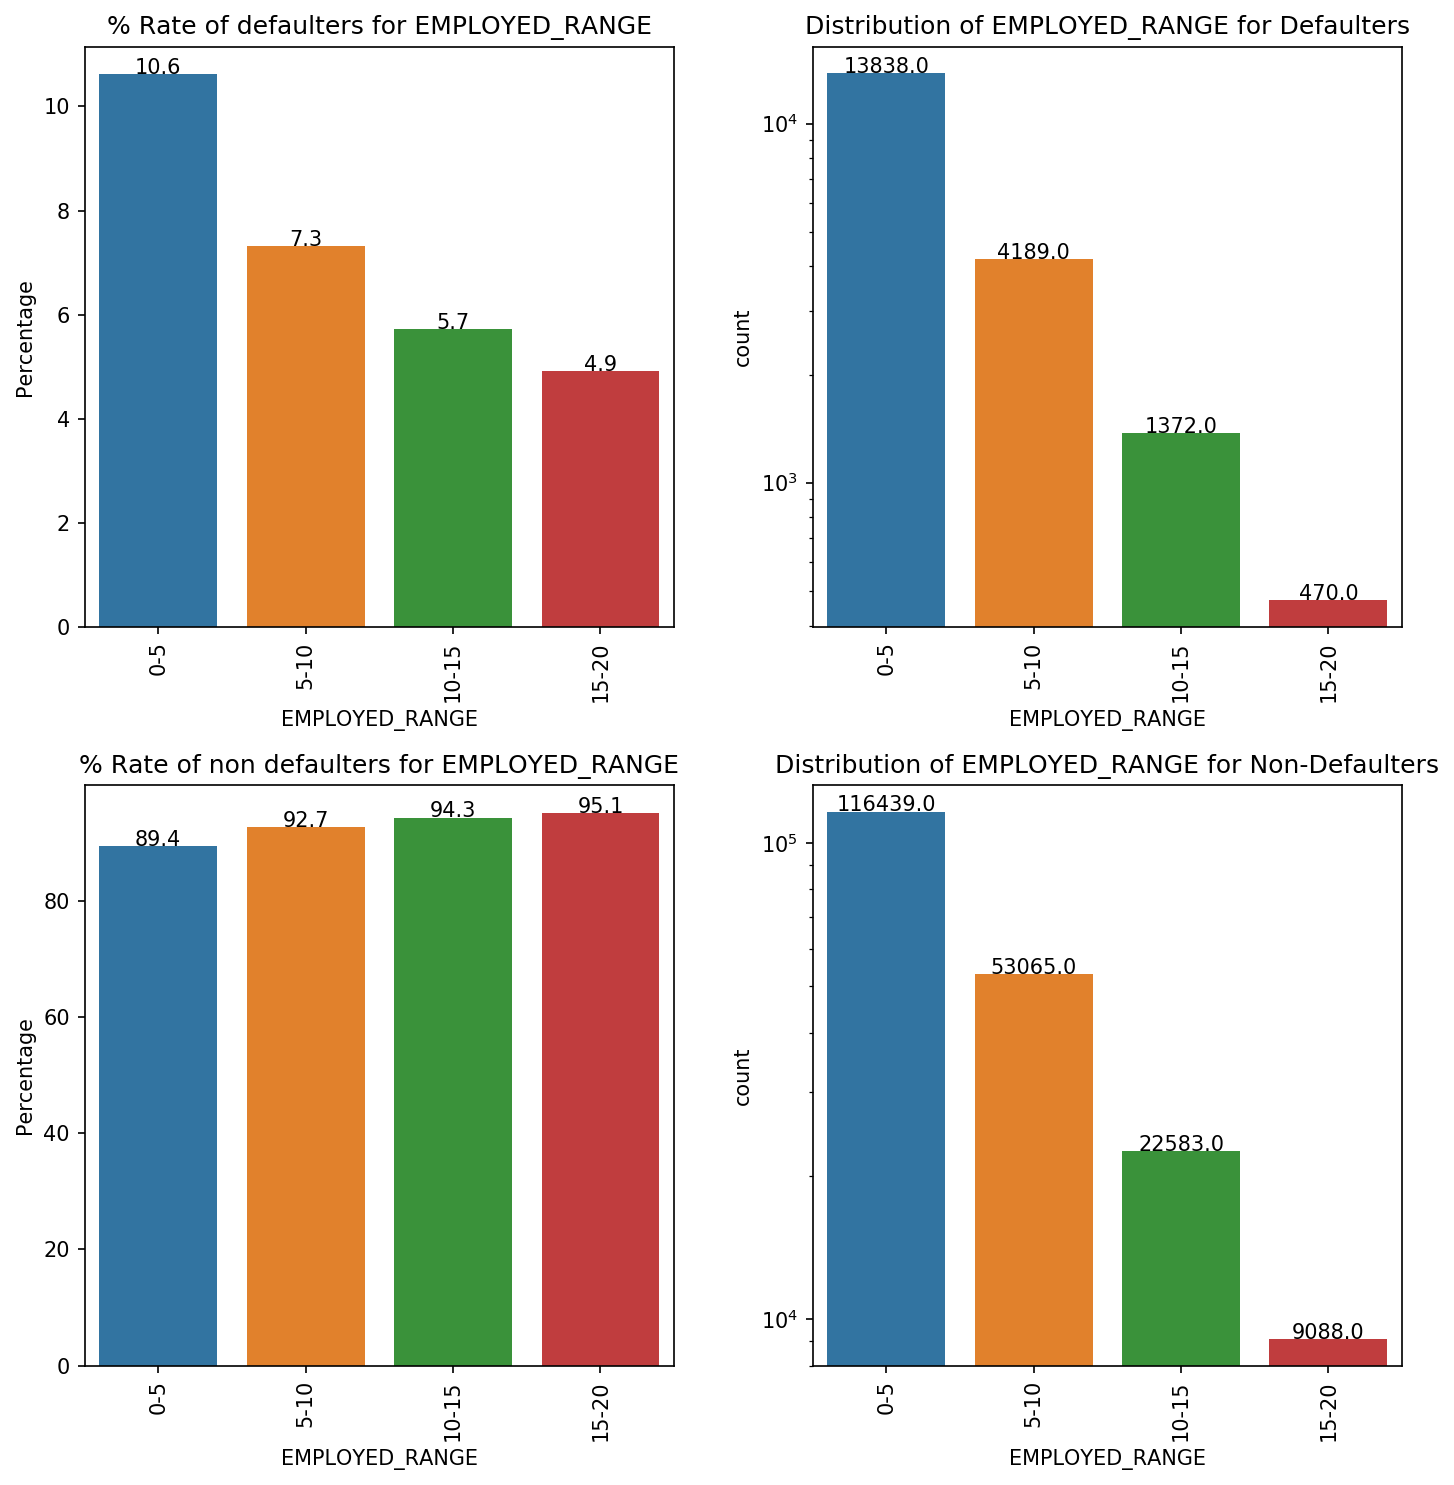

In [323]:
# Plot for employed range
plot_univariatePercentage('EMPLOYED_RANGE','annot','log')

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants have been employed for 0-5years.
2. People who are employed for 0-5 years are likely to default than others.

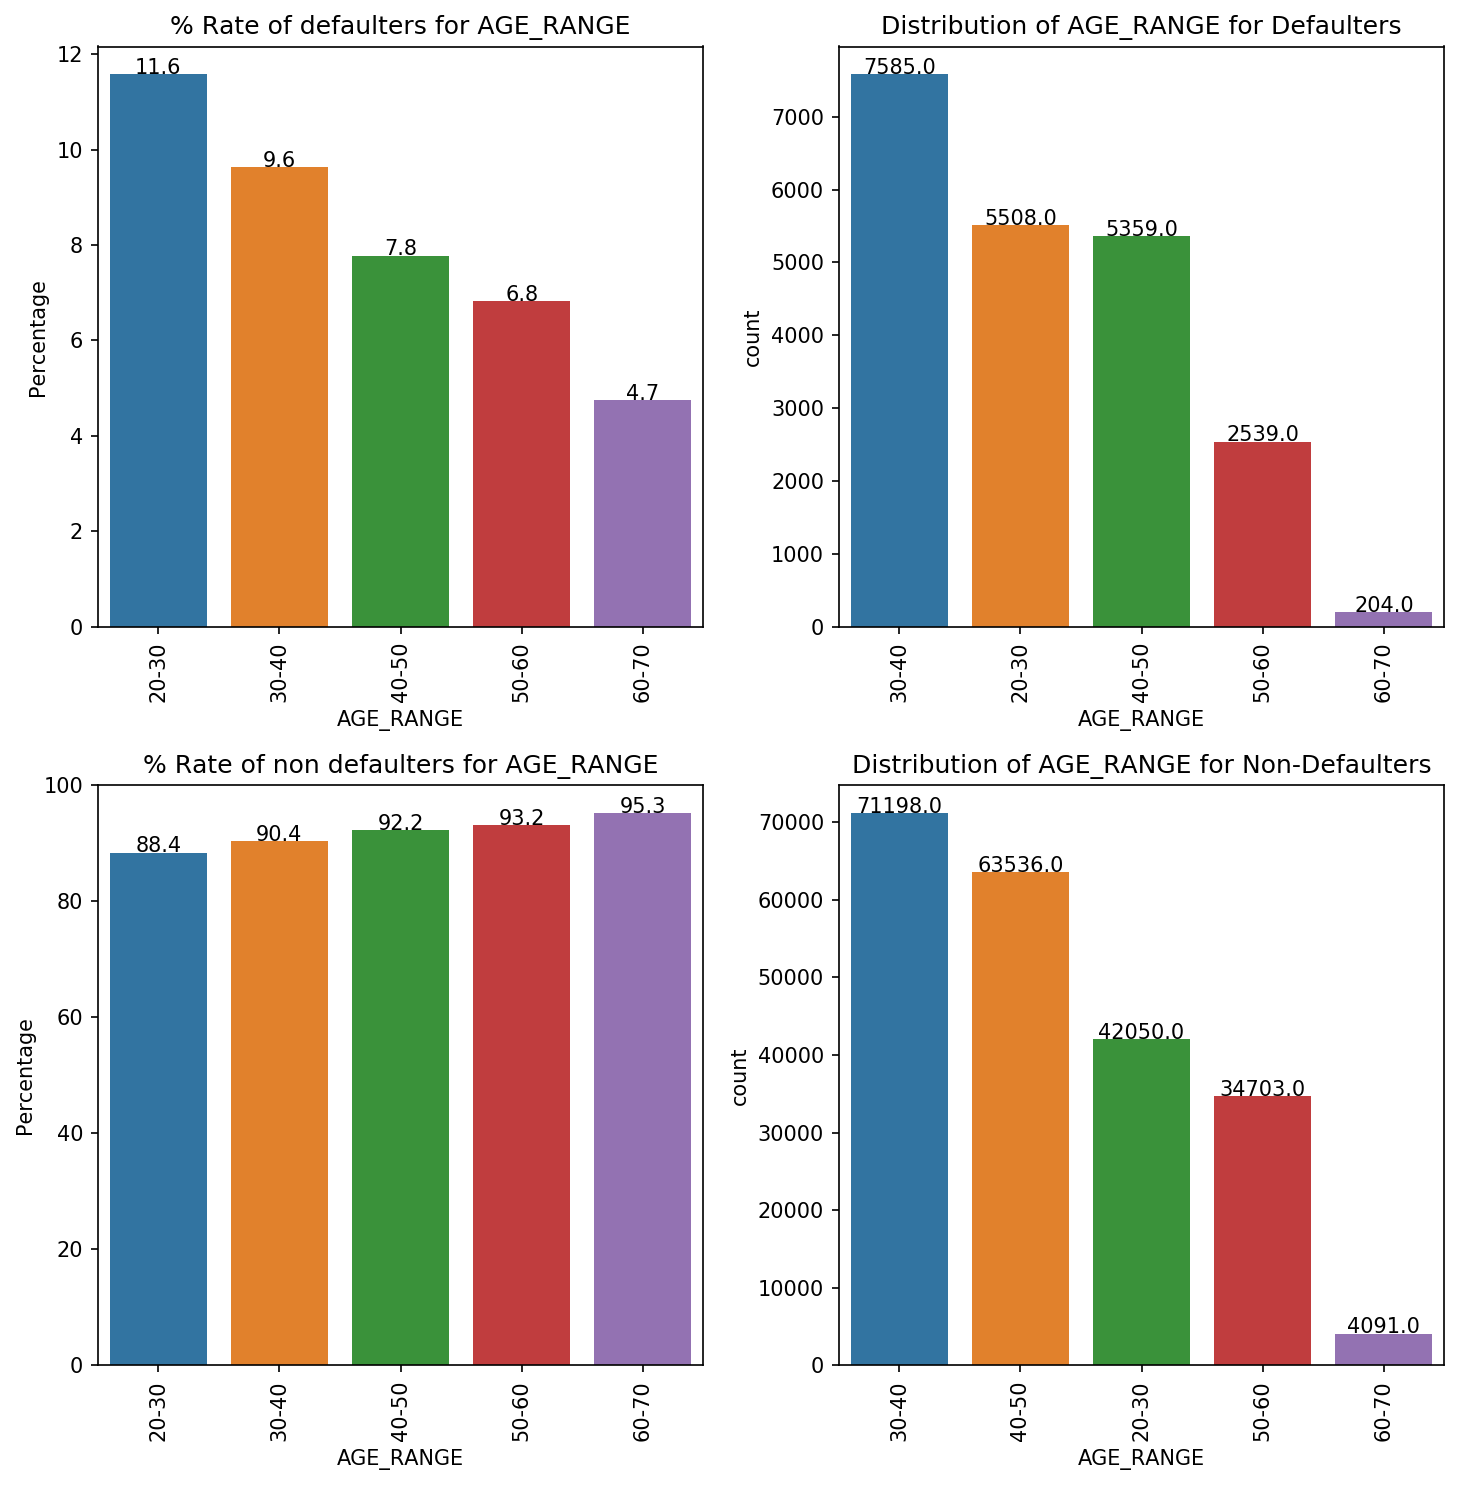

In [324]:
# Plot for age range
plot_univariatePercentage('AGE_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants are in the age range 30-40years.
2. People in age range 20-30 years are likely to default than others.

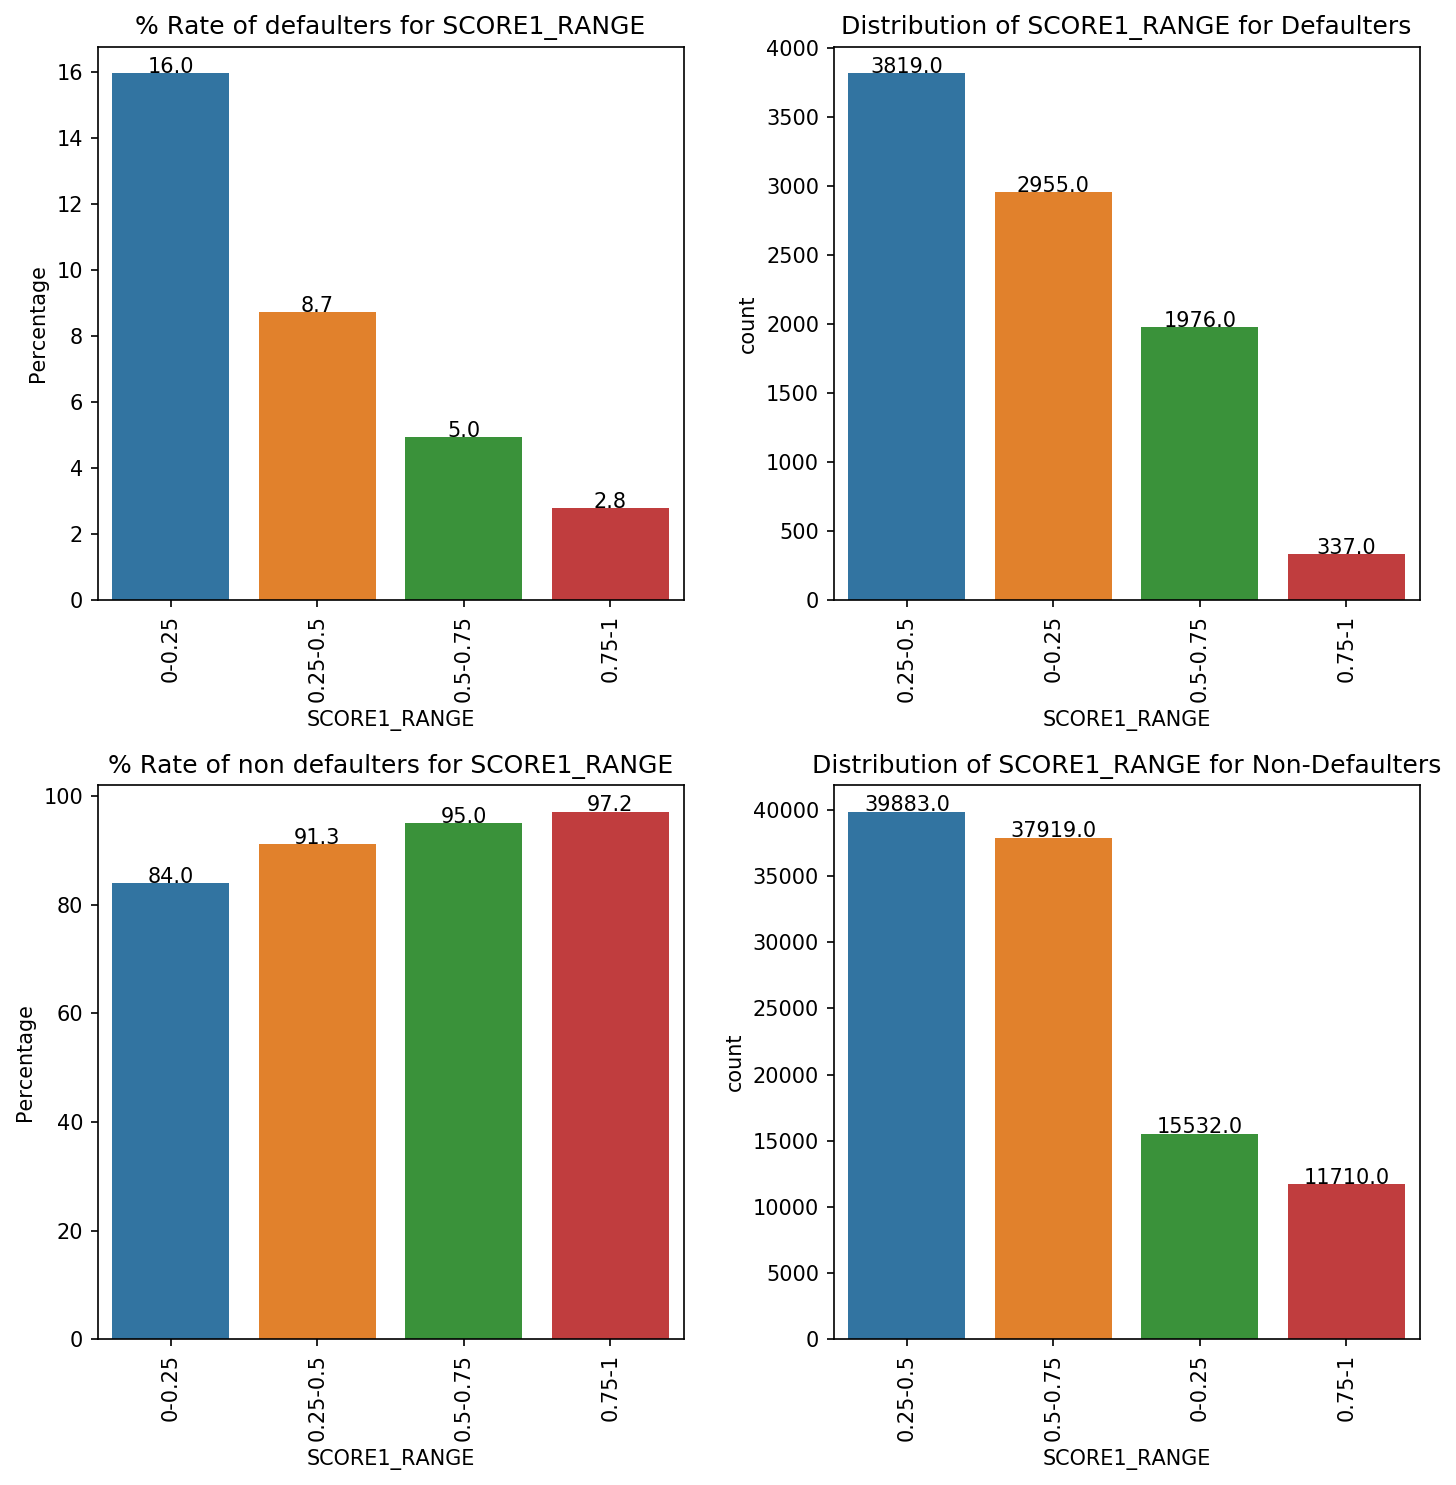

In [325]:
# Plot for credit score 1
plot_univariatePercentage('SCORE1_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants have score1 range 0.25-0.5.
2. People in score1 range 0 to 0.25 are likely to default than others.

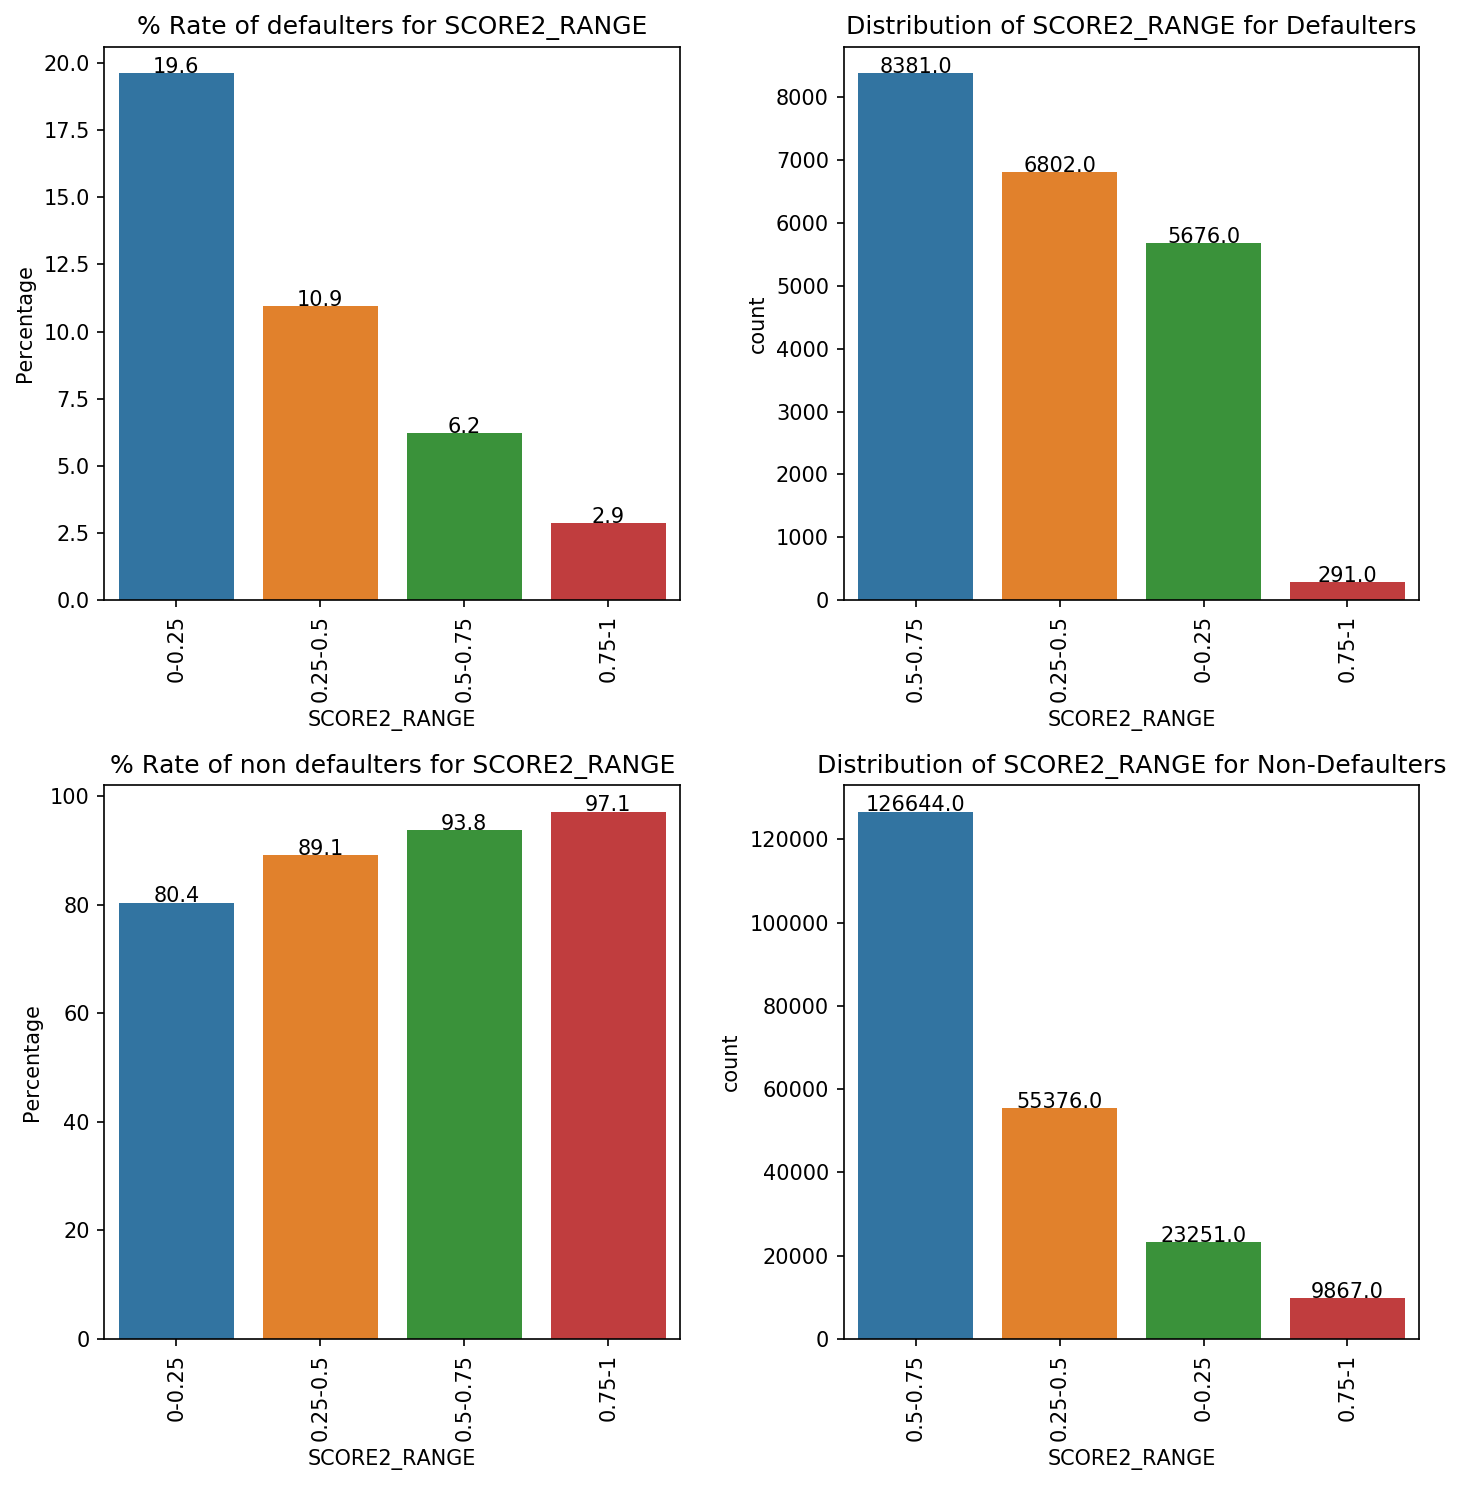

In [326]:
# Plot for credit score 2
plot_univariatePercentage('SCORE2_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants have score2 range 0.5-0.75.
2. People in score2 range 0 to 0.25 are likely to default than others.

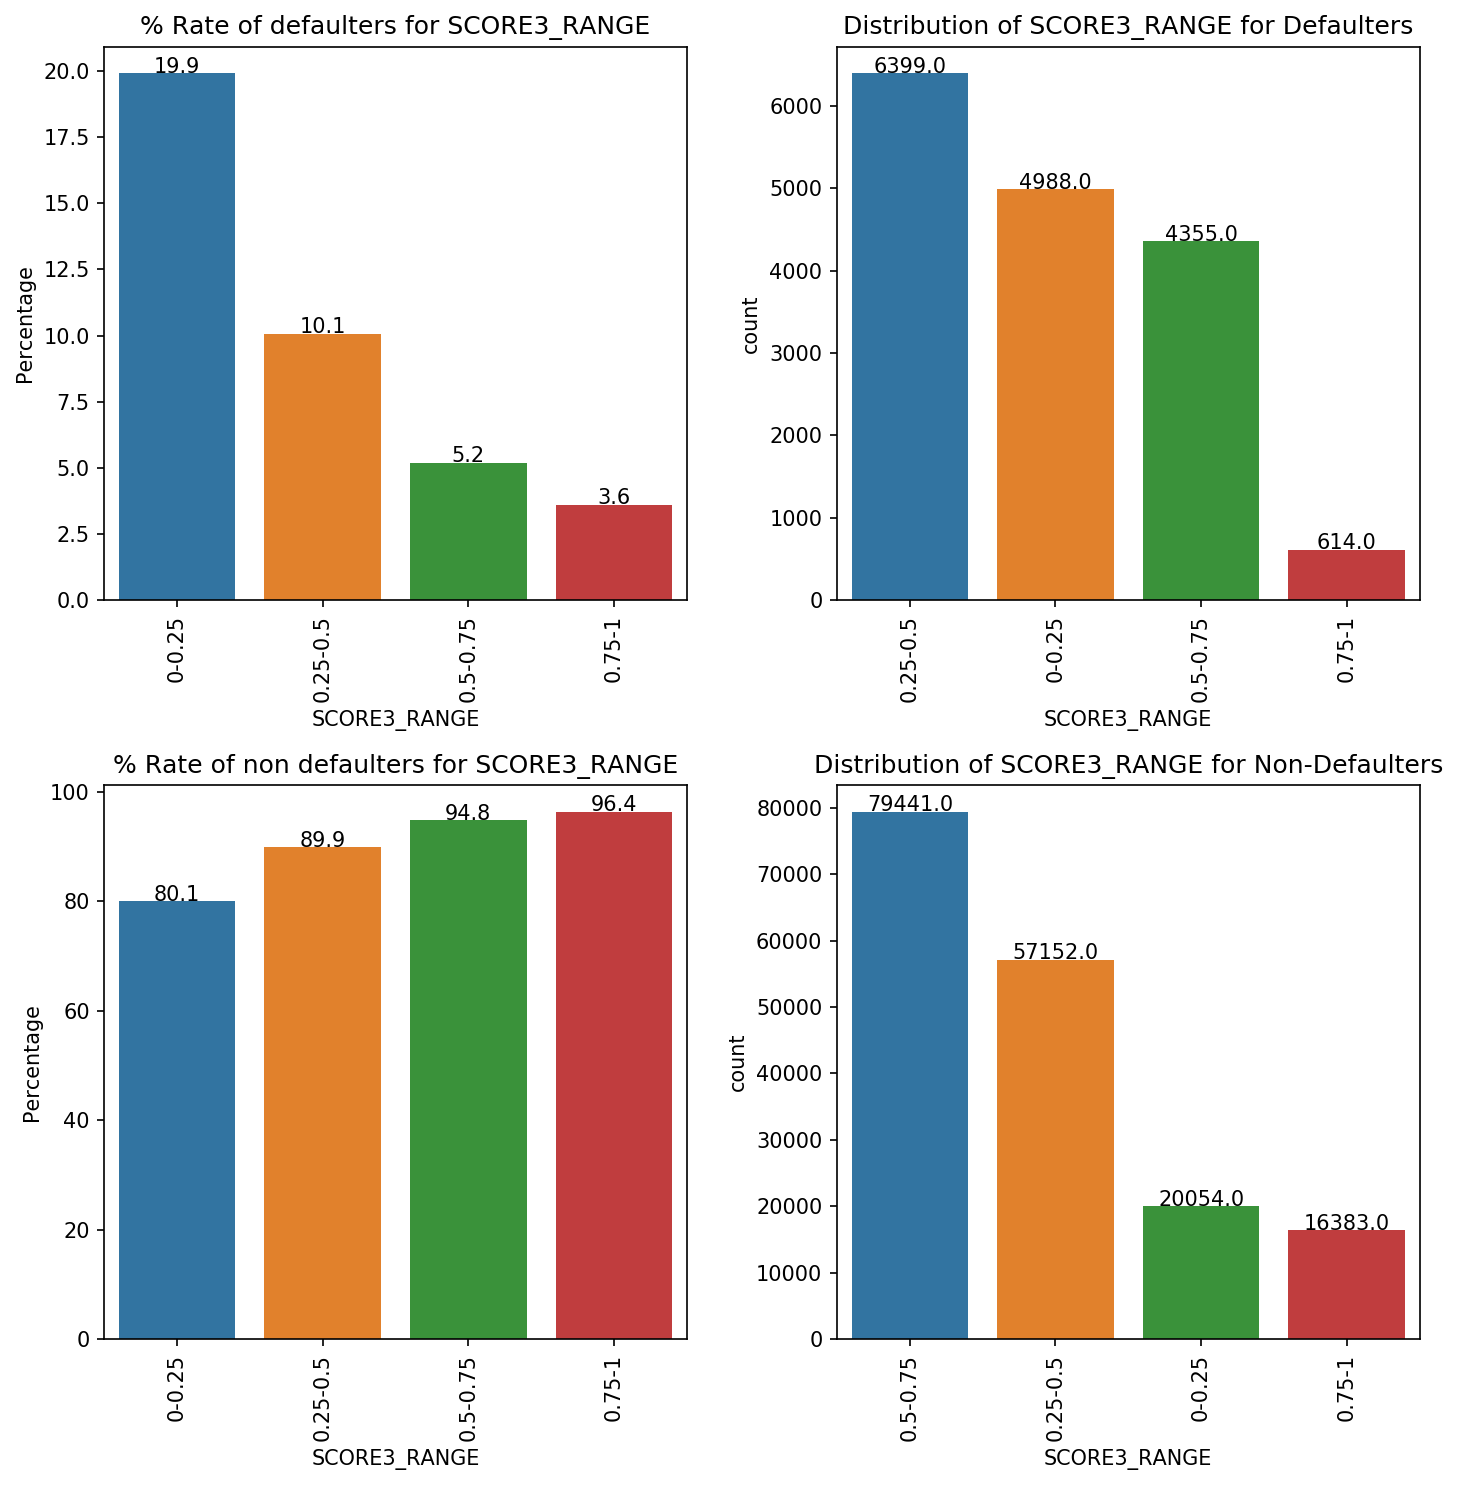

In [327]:
# Plot for credit score 3
plot_univariatePercentage('SCORE3_RANGE','annot',log=False)

### INFERENCE:
1. From the above graph, we can see that most of the loan applicants have score3 range 0.25-0.5.
2. People in score3 range 0 to 0.25 are likely to default than others.

## BIVARIATE ANALYSIS

### FINDING CORRELATION

In [328]:
#Selecting numerical columns to find correlation

list_correlate=["AMT_INCOME_TOTAL","AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","DAYS_BIRTH","DAYS_EMPLOYED","DAYS_REGISTRATION","DAYS_ID_PUBLISH","AMT_REQ_CREDIT_BUREAU_YEAR","AMT_REQ_CREDIT_BUREAU_QRT","AMT_REQ_CREDIT_BUREAU_MON","AMT_REQ_CREDIT_BUREAU_WEEK","AMT_REQ_CREDIT_BUREAU_DAY","AMT_REQ_CREDIT_BUREAU_HOUR","REGION_POPULATION_RELATIVE","HOUR_APPR_PROCESS_START","EXT_SOURCE_1","EXT_SOURCE_2","EXT_SOURCE_3","YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","TOTALAREA_MODE","EMERGENCYSTATE_MODE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","DAYS_LAST_PHONE_CHANGE","CNT_CHILDREN","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]


In [329]:
#Finding correlation for defaulters
correlate_default=defaulters_df[list_correlate].corr()
correlate_default

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
AMT_INCOME_TOTAL                      1.000000    0.325711     0.396354   
AMT_CREDIT                            0.325711    1.000000     0.740393   
AMT_ANNUITY                           0.396354    0.740393     1.000000   
AMT_GOODS_PRICE                       0.328922    0.979375     0.738687   
DAYS_BIRTH                           -0.099149   -0.188876    -0.085388   
DAYS_EMPLOYED                        -0.036274   -0.110750    -0.053584   
DAYS_REGISTRATION                     0.005653   -0.035993     0.016098   
DAYS_ID_PUBLISH                      -0.039392   -0.061154    -0.041226   
AMT_REQ_CREDIT_BUREAU_YEAR            0.100264    0.008489     0.010025   
AMT_REQ_CREDIT_BUREAU_QRT             0.033017   -0.001057    -0.002062   
AMT_REQ_CREDIT_BUREAU_MON             0.070470    0.057381     0.046714   
AMT_REQ_CREDIT_BUREAU_WEEK            0.021735    0.013115     0.037028   
AMT_REQ_CREDIT_BUREAU_DAY             0.001098   -0.000702    -0.001667   
AMT_REQ_CREDIT_BUREAU_HOUR            0.012466   -0.004179     0.013394   
REGION_POPULATION_RELATIVE            0.111656    0.066580     0.063632   
HOUR_APPR_PROCESS_START               0.068615    0.024237     0.016414   
EXT_SOURCE_1                          0.108064    0.177697     0.111197   
EXT_SOURCE_2                          0.137934    0.114514     0.105085   
EXT_SOURCE_3                         -0.048603    0.093899     0.053554   
YEARS_BEGINEXPLUATATION_AVG           0.011558    0.000230    -0.003108   
FLOORSMAX_AVG                         0.147607    0.081400     0.094390   
YEARS_BEGINEXPLUATATION_MODE          0.009593   -0.006632    -0.007982   
FLOORSMAX_MODE                        0.142589    0.078430     0.093309   
YEARS_BEGINEXPLUATATION_MEDI          0.011775   -0.000742    -0.003063   
FLOORSMAX_MEDI                        0.147064    0.081630     0.094652   
TOTALAREA_MODE                        0.096845    0.053620     0.058432   
OBS_30_CNT_SOCIAL_CIRCLE             -0.008534    0.017788     0.005743   
DEF_30_CNT_SOCIAL_CIRCLE             -0.026209   -0.033419    -0.021919   
OBS_60_CNT_SOCIAL_CIRCLE             -0.007754    0.018408     0.007037   
DEF_60_CNT_SOCIAL_CIRCLE             -0.025002   -0.036983    -0.024986   
DAYS_LAST_PHONE_CHANGE               -0.083291   -0.120843    -0.082829   
CNT_CHILDREN                         -0.027164    0.005459     0.020542   
CNT_FAM_MEMBERS                      -0.021239    0.053310     0.059398   
REGION_RATING_CLIENT                 -0.165494   -0.054060    -0.063722   
REGION_RATING_CLIENT_W_CITY          -0.182206   -0.066714    -0.079700   

                              AMT_GOODS_PRICE  DAYS_BIRTH  DAYS_EMPLOYED  \
AMT_INCOME_TOTAL                     0.328922   -0.099149      -0.036274   
AMT_CREDIT                           0.979375   -0.188876      -0.110750   
AMT_ANNUITY                          0.738687   -0.085388      -0.053584   
AMT_GOODS_PRICE                      1.000000   -0.185100      -0.117922   
DAYS_BIRTH                          -0.185100    1.000000       0.274937   
DAYS_EMPLOYED                       -0.117922    0.274937       1.000000   
DAYS_REGISTRATION                   -0.034778    0.232631       0.109557   
DAYS_ID_PUBLISH                     -0.064086    0.136427       0.105735   
AMT_REQ_CREDIT_BUREAU_YEAR           0.006875   -0.095768      -0.048140   
AMT_REQ_CREDIT_BUREAU_QRT            0.000679   -0.019059       0.004763   
AMT_REQ_CREDIT_BUREAU_MON            0.061435   -0.028367      -0.026042   
AMT_REQ_CREDIT_BUREAU_WEEK           0.015266   -0.001663      -0.012890   
AMT_REQ_CREDIT_BUREAU_DAY            0.000964   -0.000619      -0.010169   
AMT_REQ_CREDIT_BUREAU_HOUR          -0.002872    0.010062       0.010946   
REGION_POPULATION_RELATIVE           0.075208   -0.050273      -0.020989   
HOUR_APPR_PROCESS_START              0.038660    0.036299      -0.001187   
EXT_SOURCE_1                         

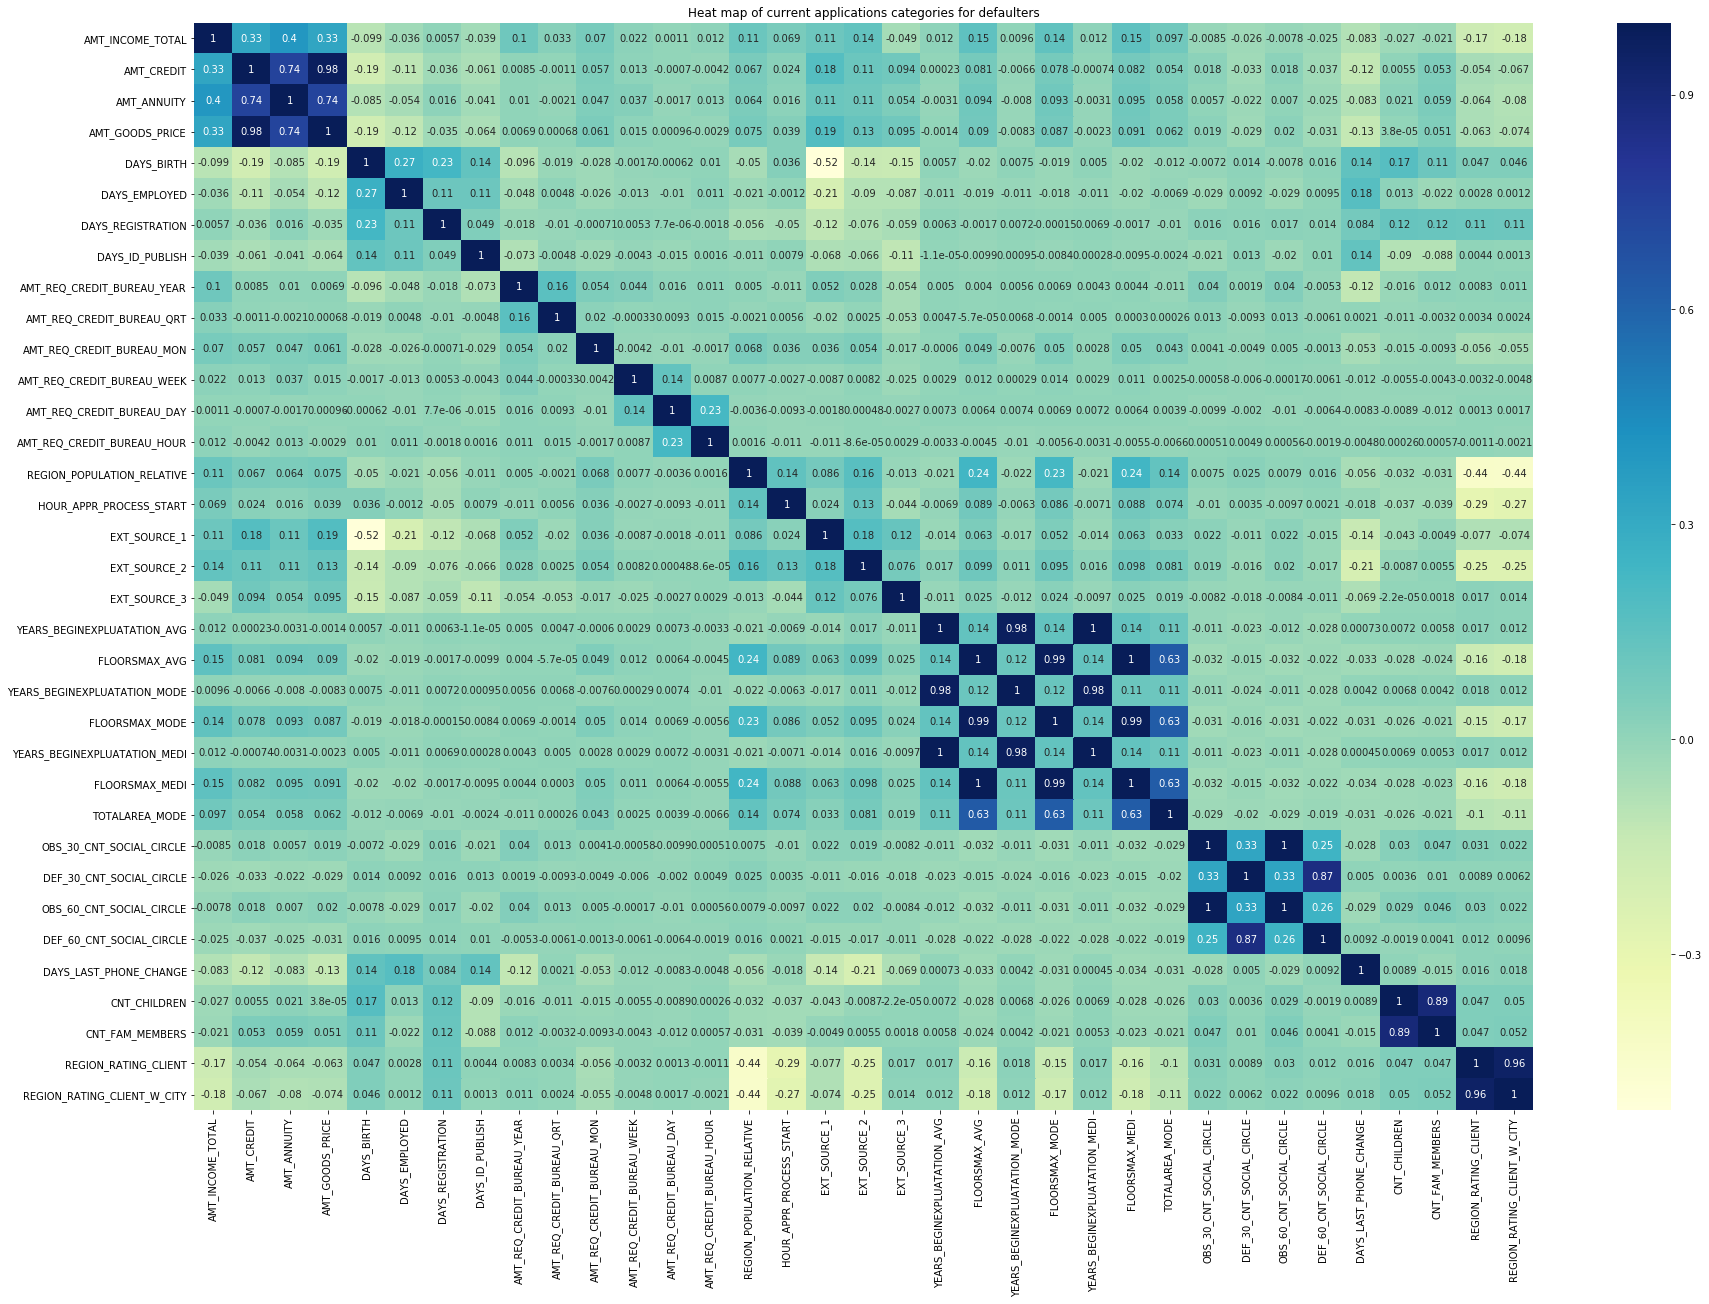

In [330]:
#Plotting a heatmap to find correlation for numerical values for defaulters
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(correlate_default, cmap="YlGnBu",annot=True)
plt.title('Heat map of current applications categories for defaulters')
plt.show()

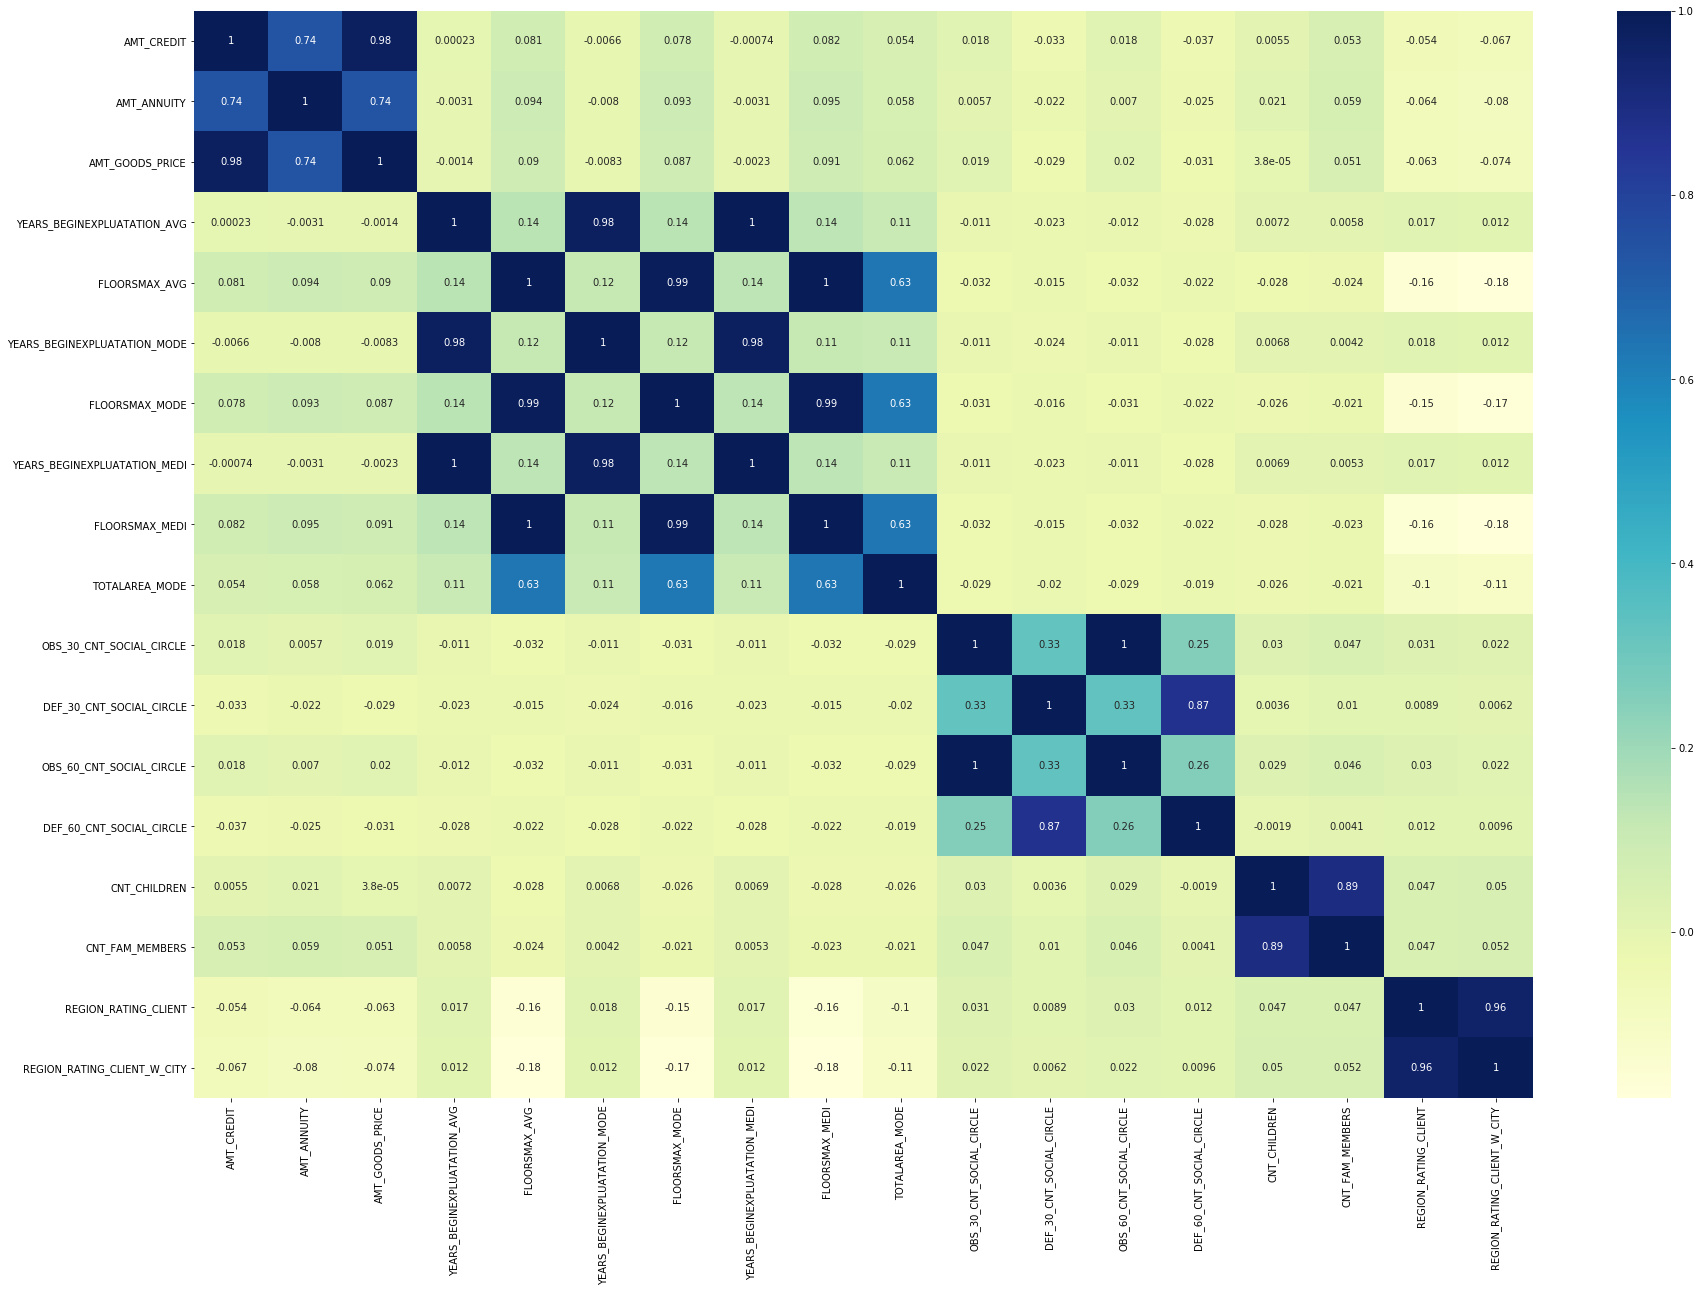

In [331]:
#From the above heat map for defaulter variables, we can see that some variables are highly correlated. Plotting a heat map for only those variables:
list_corr=["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","TOTALAREA_MODE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","CNT_CHILDREN","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]
corr_df=defaulters_df[list_corr].corr()

#Plotting a heatmap to find correlation for defaulters
plt.figure(figsize=(30,20))
sns.heatmap(corr_df, cmap="YlGnBu",annot=True)
plt.show()

In [332]:
#List of Top 10 correlations for numerical columns for defaulters
Top_10_default=pd.DataFrame(corr_df.unstack().sort_values(ascending=False))
Top_10_default.rename(columns={0:"Correlation value"},inplace=True)
Top_10_default=Top_10_default[18:].head(20)

print("THE TOP TEN CORRELATIONS FOR NUMERICAL COLUMNS FOR DEFAULTERS: \n \n",Top_10_default.iloc[1::2])


THE TOP TEN CORRELATIONS FOR NUMERICAL COLUMNS FOR DEFAULTERS: 
 
                                                            Correlation value
OBS_30_CNT_SOCIAL_CIRCLE     OBS_60_CNT_SOCIAL_CIRCLE               0.998285
FLOORSMAX_MEDI               FLOORSMAX_AVG                          0.997493
YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_AVG            0.995883
FLOORSMAX_MEDI               FLOORSMAX_MODE                         0.989079
FLOORSMAX_AVG                FLOORSMAX_MODE                         0.986875
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE           0.981097
AMT_GOODS_PRICE              AMT_CREDIT                             0.979375
YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MODE           0.978578
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT                   0.957175
CNT_CHILDREN                 CNT_FAM_MEMBERS                        0.893999


### INFERENCE:

In [333]:
#Finding correlation for non-defaulters
correlate_nondefault=nondefaulters_df[list_correlate].corr()
correlate_nondefault.head()

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.339768     0.417441         0.343956   
AMT_CREDIT                0.339768    1.000000     0.759780         0.983086   
AMT_ANNUITY               0.417441    0.759780     1.000000         0.758939   
AMT_GOODS_PRICE           0.343956    0.983086     0.758939         1.000000   
DAYS_BIRTH               -0.051093   -0.158195    -0.089714        -0.152945   

                  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
AMT_INCOME_TOTAL   -0.051093      -0.043905           0.037178   
AMT_CREDIT         -0.158195      -0.091556          -0.022505   
AMT_ANNUITY        -0.089714      -0.054259           0.005817   
AMT_GOODS_PRICE    -0.152945      -0.093692          -0.019438   
DAYS_BIRTH          1.000000       0.291612           0.287931   

                  DAYS_ID_PUBLISH  AMT_REQ_CREDIT_BUREAU_YEAR  \
AMT_INCOME_TOTAL        -0.030920                    0.080526   
AMT_CREDIT              -0.032087                   -0.007972   
AMT_ANNUITY             -0.021660                    0.019300   
AMT_GOODS_PRICE         -0.033777                   -0.009948   
DAYS_BIRTH               0.105713                   -0.071703   

                  AMT_REQ_CREDIT_BUREAU_QRT  ...  TOTALAREA_MODE  \
AMT_INCOME_TOTAL                   0.026656  ...        0.120384   
AMT_CREDIT                         0.026848  ...        0.047974   
AMT_ANNUITY                        0.017355  ...        0.065534   
AMT_GOODS_PRICE                    0.027656  ...        0.052699   
DAYS_BIRTH                        -0.008920  ...       -0.006002   

                  OBS_30_CNT_SOCIAL_CIRCLE  DEF_30_CNT_SOCIAL_CIRCLE  \
AMT_INCOME_TOTAL                 -0.028365                 -0.029001   
AMT_CREDIT                        0.002369                 -0.017318   
AMT_ANNUITY                      -0.008480                 -0.016650   
AMT_GOODS_PRICE                   0.002656                 -0.018545   
DAYS_BIRTH                        0.019467                  0.014981   

                  OBS_60_CNT_SOCIAL_CIRCLE  DEF_60_CNT_SOCIAL_CIRCLE  \
AMT_INCOME_TOTAL                 -0.028074                 -0.029037   
AMT_CREDIT                        0.002480                 -0.019646   
AMT_ANNUITY                      -0.008172                 -0.018255   
AMT_GOODS_PRICE                   0.002741                 -0.020382   
DAYS_BIRTH                        0.018983                  0.015019   

                  DAYS_LAST_PHONE_CHANGE  CNT_CHILDREN  CNT_FAM_MEMBERS  \
AMT_INCOME_TOTAL               -0.053220     -0.017732        -0.011999   
AMT_CREDIT                     -0.080882     -0.015371         0.039569   
AMT_ANNUITY                    -0.069562     -0.005479         0.043909   
AMT_GOODS_PRICE                -0.084755     -0.019436         0.037923   
DAYS_BIRTH                      0.137372      0.231430         0.167226   

                  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  
AMT_INCOME_TOTAL             -0.209295                    -0.228629  
AMT_CREDIT                   -0.073584                    -0.081075  
AMT_ANNUITY                  -0.104078                    -0.116699  
AMT_GOODS_PRICE              -0.074355                    -0.081108  
DAYS_BIRTH                    0.036265                     0.036064  

[5 rows x 35 columns]

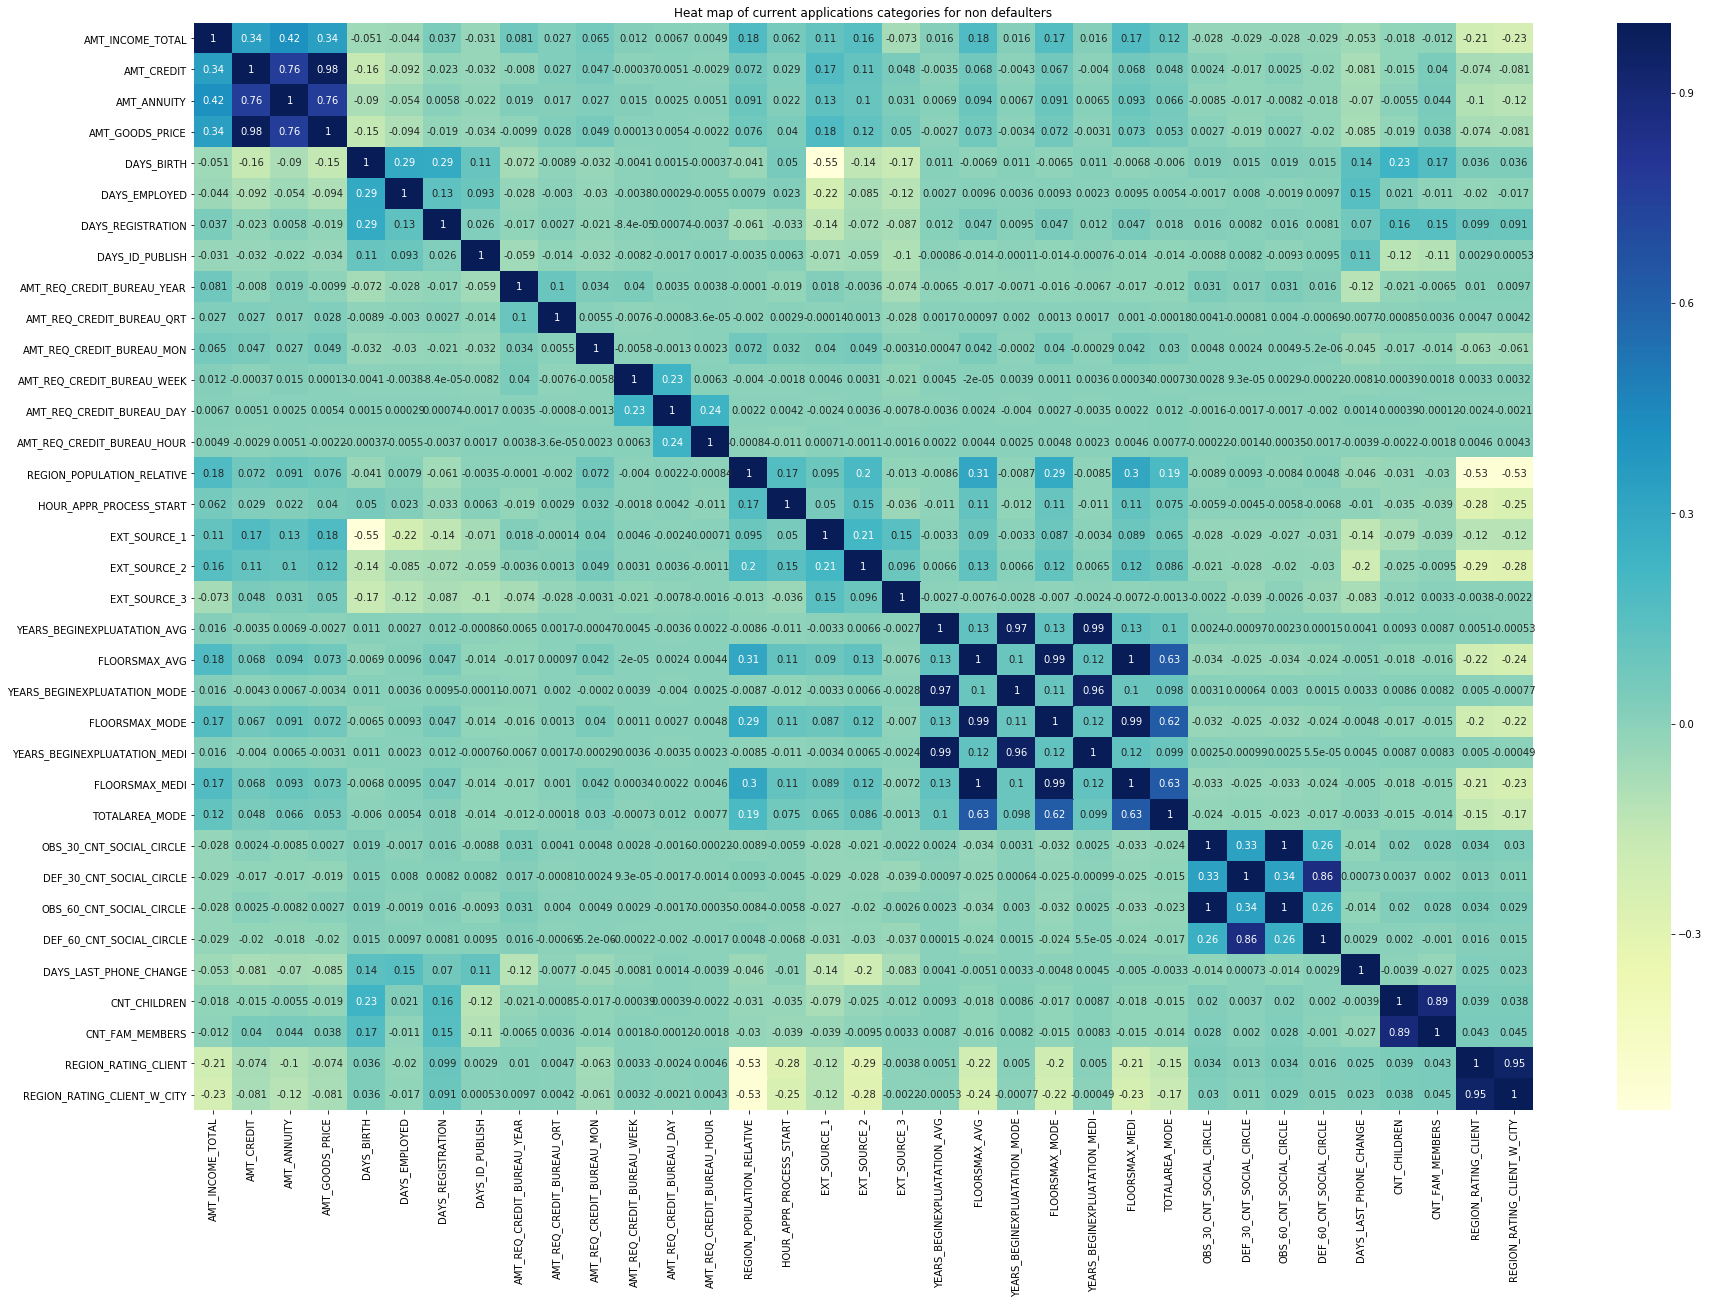

In [334]:
#Plotting a heatmap to find correlation for non-defaulters
plt.figure(figsize=(30,20))

#Plotting heatmap to visualise correlation
sns.heatmap(correlate_nondefault, cmap="YlGnBu",annot=True)
plt.title('Heat map of current applications categories for non defaulters')
plt.show()

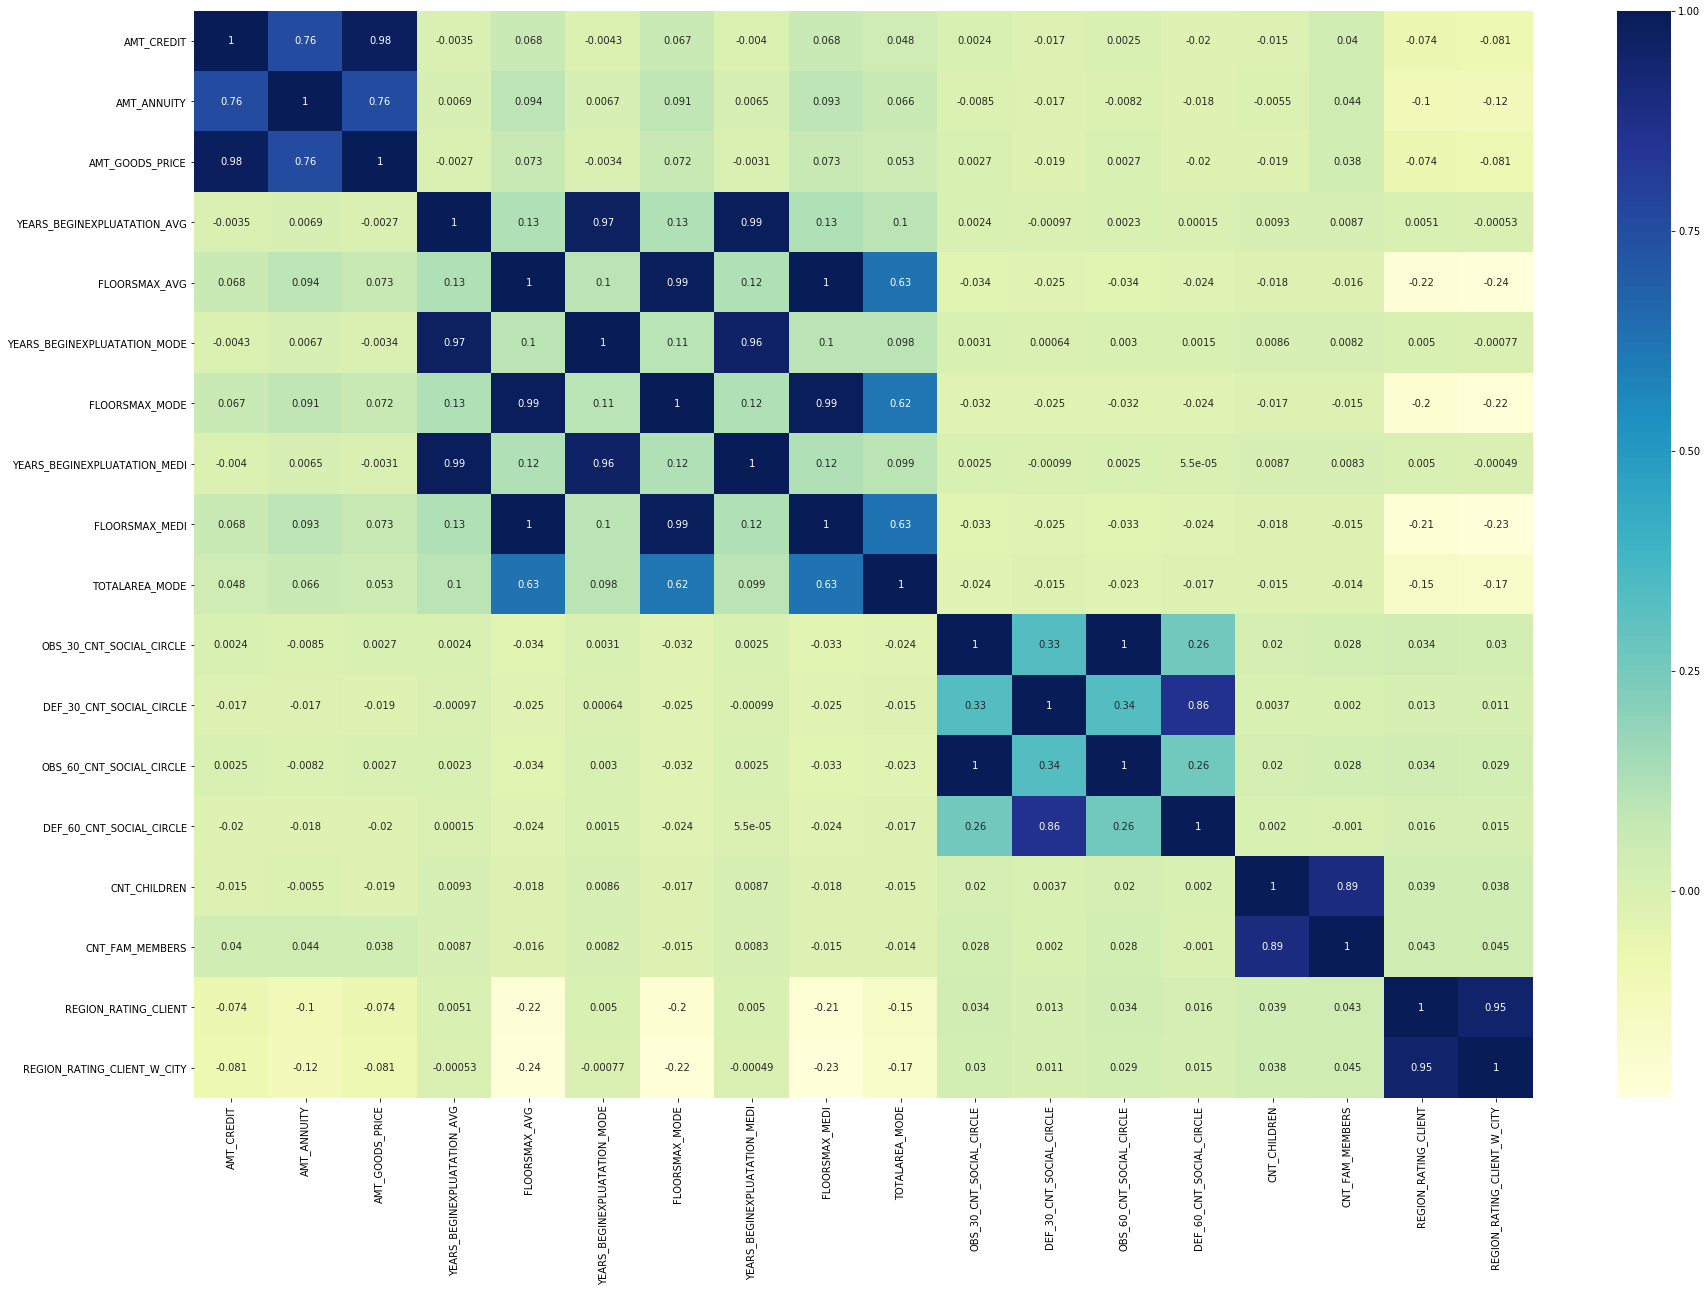

In [335]:
#From the above heat map for non-defaulter variables, we can see that some variables are highly correlated. Plotting a heat map for only those variables:
list_corr1=["AMT_CREDIT","AMT_ANNUITY","AMT_GOODS_PRICE","YEARS_BEGINEXPLUATATION_AVG","FLOORSMAX_AVG","YEARS_BEGINEXPLUATATION_MODE","FLOORSMAX_MODE","YEARS_BEGINEXPLUATATION_MEDI","FLOORSMAX_MEDI","TOTALAREA_MODE","OBS_30_CNT_SOCIAL_CIRCLE","DEF_30_CNT_SOCIAL_CIRCLE","OBS_60_CNT_SOCIAL_CIRCLE","DEF_60_CNT_SOCIAL_CIRCLE","CNT_CHILDREN","CNT_FAM_MEMBERS","REGION_RATING_CLIENT","REGION_RATING_CLIENT_W_CITY"]
corr_df1=nondefaulters_df[list_corr1].corr()

#Plotting a heatmap to find correlation for defaulters
plt.figure(figsize=(30,20))
sns.heatmap(corr_df1, cmap="YlGnBu",annot=True)
plt.show()

In [336]:
#List of top 10 correlations for numerical columns Non-defaulters
Top_10_nondefault=pd.DataFrame(corr_df1.unstack().sort_values(ascending=False))
Top_10_nondefault.rename(columns={0:"Correlation value"},inplace=True)
Top_10_nondefault=Top_10_nondefault[Top_10_nondefault["Correlation value"]<1]
print("THE TOP TEN CORRELATIONS FOR NUMERICAL COLUMNS FOR NON-DEFAULTERS: \n \n",Top_10_nondefault.iloc[[0,2,4,6,9,10,12,14,16,18],:])

THE TOP TEN CORRELATIONS FOR NUMERICAL COLUMNS FOR NON-DEFAULTERS: 
 
                                                            Correlation value
OBS_60_CNT_SOCIAL_CIRCLE     OBS_30_CNT_SOCIAL_CIRCLE               0.998508
FLOORSMAX_AVG                FLOORSMAX_MEDI                         0.997079
YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_AVG            0.993074
FLOORSMAX_MODE               FLOORSMAX_MEDI                         0.988228
FLOORSMAX_AVG                FLOORSMAX_MODE                         0.985679
AMT_GOODS_PRICE              AMT_CREDIT                             0.983086
YEARS_BEGINEXPLUATATION_AVG  YEARS_BEGINEXPLUATATION_MODE           0.971559
YEARS_BEGINEXPLUATATION_MEDI YEARS_BEGINEXPLUATATION_MODE           0.961521
REGION_RATING_CLIENT_W_CITY  REGION_RATING_CLIENT                   0.949353
CNT_FAM_MEMBERS              CNT_CHILDREN                           0.894082


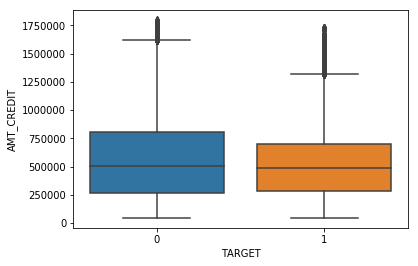

In [337]:
# Variation of credit amount for target variable
sns.boxplot(x='TARGET',y='AMT_CREDIT',data=app_data)
plt.show()

### INFERENCE:
Defaulters show a lower 75th quantile than the non defaulter

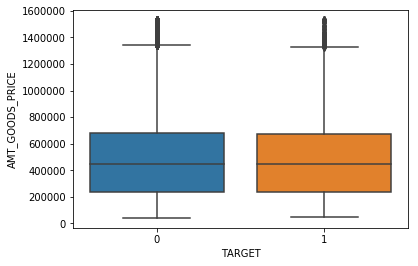

In [338]:
# Variation of credit amount for target variable
sns.boxplot(x='TARGET',y='AMT_GOODS_PRICE',data=app_data)
plt.show()

### INFERENCE:
There is no variation in goods price across defaulters and non defaulters

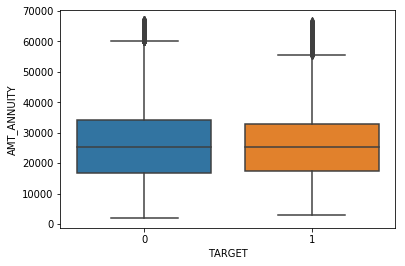

In [339]:
# Variation of credit amount for target variable
sns.boxplot(x='TARGET',y='AMT_ANNUITY',data=app_data)
plt.show()

### INFERENCE:
There is no variation in annuity across defaulters and non defaulters

# Previous Application Data

In [340]:
# Reading the previous application data
previousApplication = pd.read_csv("previous_application.csv")
previousApplication.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START  ... NAME_SELLER_INDUSTRY  CNT_PAYMENT  \
0                       15  ...         Connectivity         12.0   
1                       11  ...                  XNA         36.0   
2                       11  ...                  XNA         12.0   
3                        7  ...                  XNA         12.0   
4                        9  ...                  XNA         24.0   

   NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0            middle  POS mobile with interest            365243.0   
1        low_action          Cash X-Sell: low            365243.0   
2              high         Cash X-Sell: high            365243.0   
3            middle       Cash X-Sell: middle            365243.0   
4              high         Cash Street: high                 NaN   

  DAYS_FIRST_DUE DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE DAYS_TERMINATION  \
0          -42.0                     300.0          -42.0            -37.0   
1         -134.0                     916.0       365243.0         365243.0   
2         -271.0                      59.0       365243.0         365243.0   
3         -482.0                    -152.0         -182.0           -177.0   
4            NaN                       NaN            NaN              NaN   

  NFLAG_INSURED_ON_APPROVAL  
0                       0.0  
1                       1.0  
2                       1.0  
3                       1.0  
4                       NaN  

[5 rows x 37 columns]

In [341]:
# Checking the info of the data frame
previousApplication.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
SK_ID_PREV                     1670214 non-null int64
SK_ID_CURR                     1670214 non-null int64
NAME_CONTRACT_TYPE             1670214 non-null object
AMT_ANNUITY                    1297979 non-null float64
AMT_APPLICATION                1670214 non-null float64
AMT_CREDIT                     1670213 non-null float64
AMT_DOWN_PAYMENT               774370 non-null float64
AMT_GOODS_PRICE                1284699 non-null float64
WEEKDAY_APPR_PROCESS_START     1670214 non-null object
HOUR_APPR_PROCESS_START        1670214 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    1670214 non-null object
NFLAG_LAST_APPL_IN_DAY         1670214 non-null int64
RATE_DOWN_PAYMENT              774370 non-null float64
RATE_INTEREST_PRIMARY          5951 non-null float64
RATE_INTEREST_PRIVILEGED       5951 non-null float64
NAME_CASH_LOAN_PURPOSE         1670214 non-null object
NAME_CONTRA

In [342]:
# Displaying the unique values in each column
GetUniqueValuesInDf(previousApplication)

Unique_values Data_type
SK_ID_PREV                         1670214     int64
SK_ID_CURR                          338857     int64
NAME_CONTRACT_TYPE                       4    object
AMT_ANNUITY                         357959   float64
AMT_APPLICATION                      93885   float64
AMT_CREDIT                           86803   float64
AMT_DOWN_PAYMENT                     29278   float64
AMT_GOODS_PRICE                      93885   float64
WEEKDAY_APPR_PROCESS_START               7    object
HOUR_APPR_PROCESS_START                 24     int64
FLAG_LAST_APPL_PER_CONTRACT              2    object
NFLAG_LAST_APPL_IN_DAY                   2     int64
RATE_DOWN_PAYMENT                   207033   float64
RATE_INTEREST_PRIMARY                  148   float64
RATE_INTEREST_PRIVILEGED                25   float64
NAME_CASH_LOAN_PURPOSE                  25    object
NAME_CONTRACT_STATUS                     4    object
DAYS_DECISION                         2922     int64
NAME_PAYMENT_TYPE                        4    object
CODE_REJECT_REASON                       9    object
NAME_TYPE_SUITE                          7    object
NAME_CLIENT_TYPE                         4    object
NAME_GOODS_CATEGORY                     28    object
NAME_PORTFOLIO                           5    object
NAME_PRODUCT_TYPE                        3    object
CHANNEL_TYPE                             8    object
SELLERPLACE_AREA                      2097     int64
NAME_SELLER_INDUSTRY                    11    object
CNT_PAYMENT                             49   float64
NAME_YIELD_GROUP                         5    object
PRODUCT_COMBINATION                     17    object
DAYS_FIRST_DRAWING                    2838   float64
DAYS_FIRST_DUE                        2892   float64
DAYS_LAST_DUE_1ST_VERSION             4605   float64
DAYS_LAST_DUE                         2873   float64
DAYS_TERMINATION                      2830   float64
NFLAG_INSURED_ON_APPROVAL                2   float64

In [343]:
#Checking null values
previousApplication.isna().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [344]:
# Checking % of null values
percentageOfNull=GetPercentageNullValues(previousApplication,0)
percentageOfNull

RATE_INTEREST_PRIVILEGED       99.64
RATE_INTEREST_PRIMARY          99.64
RATE_DOWN_PAYMENT              53.64
AMT_DOWN_PAYMENT               53.64
NAME_TYPE_SUITE                49.12
DAYS_TERMINATION               40.30
NFLAG_INSURED_ON_APPROVAL      40.30
DAYS_FIRST_DRAWING             40.30
DAYS_FIRST_DUE                 40.30
DAYS_LAST_DUE_1ST_VERSION      40.30
DAYS_LAST_DUE                  40.30
AMT_GOODS_PRICE                23.08
CNT_PAYMENT                    22.29
AMT_ANNUITY                    22.29
PRODUCT_COMBINATION             0.02
SK_ID_CURR                      0.00
NAME_CONTRACT_TYPE              0.00
AMT_CREDIT                      0.00
WEEKDAY_APPR_PROCESS_START      0.00
HOUR_APPR_PROCESS_START         0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
NFLAG_LAST_APPL_IN_DAY          0.00
AMT_APPLICATION                 0.00
NAME_PAYMENT_TYPE               0.00
NAME_CASH_LOAN_PURPOSE          0.00
NAME_CONTRACT_STATUS            0.00
DAYS_DECISION                   0.00
C

In [345]:
# Checking the columns to be removed which has more than 50 % null values
columnsToRemove = ColumnsWithNullValues(previousApplication,50)
columnsToRemove

['RATE_INTEREST_PRIVILEGED',
 'RATE_INTEREST_PRIMARY',
 'RATE_DOWN_PAYMENT',
 'AMT_DOWN_PAYMENT']

For some columns we have 40.3% null values,
As the % is same for certain columns, maybe it is null in some segment of data
Not removing them now, will analyse them after segmentation

In [346]:
# Droping columns with more than 50% null values
previousApplication.drop(columns=columnsToRemove, inplace=True)

In [347]:
# Creating a function to plot the box plots
def plot_box(df,var):
    fig, ax=plt.subplots(figsize=(10,5))
    s1=sns.boxplot(y=df[var],ax=ax)
    ax.set_title('Box Plot for '+ var)
    plt.show()

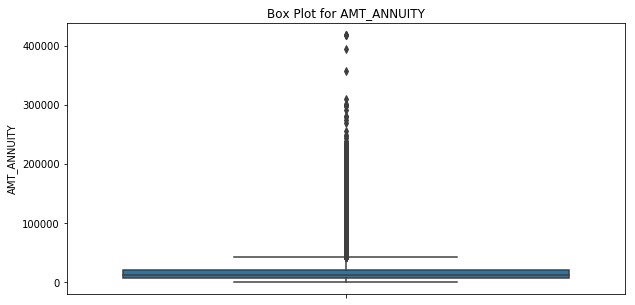

In [348]:
# Amount annuity and amount goods price have around 22% null values. 
# Let us find out if we can impute those null values
plot_box(previousApplication,"AMT_ANNUITY")

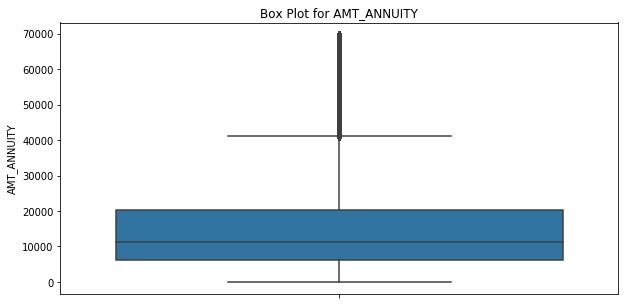

In [349]:
# As it has some outliers we can remove them
q = previousApplication["AMT_ANNUITY"].quantile(0.99) # Removing outliers
previousApplication=previousApplication[previousApplication['AMT_ANNUITY']<=q]

# Plotting the box plot after removing outliers
plot_box(previousApplication,"AMT_ANNUITY")

In [350]:
# Observing the std and mean and median of annuity column
previousApplication['AMT_ANNUITY'].describe()

count    1.284999e+06
mean     1.520742e+04
std      1.259658e+04
min      0.000000e+00
25%      6.280380e+03
50%      1.121845e+04
75%      2.025000e+04
max      6.968515e+04
Name: AMT_ANNUITY, dtype: float64

As we see that the value varies largely, 
We do not impute the null values now, after segmenting the data, we can consider imputing these values

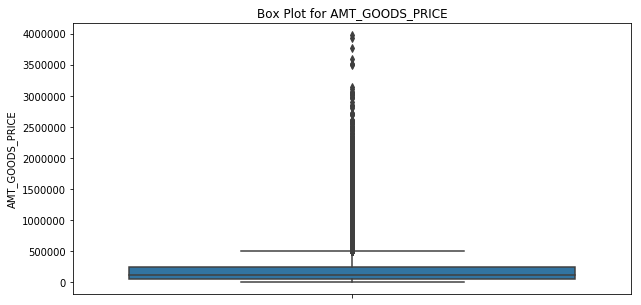

In [351]:
# Box plot for AMT_GOODS_PRICE                
plot_box(previousApplication,"AMT_GOODS_PRICE")

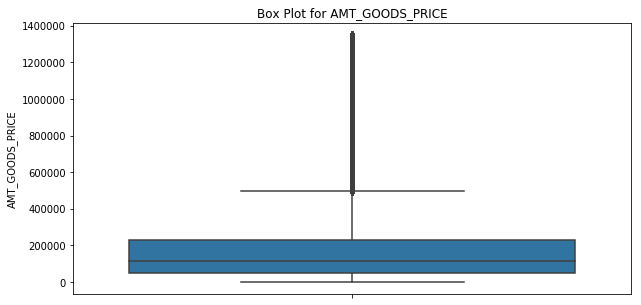

In [352]:
# As it has some outliers we can remove them
q = previousApplication["AMT_GOODS_PRICE"].quantile(0.99) # Removing outliers
previousApplication=previousApplication[previousApplication['AMT_GOODS_PRICE']<=q]

# Plotting box plot after removing outliers
plot_box(previousApplication,"AMT_GOODS_PRICE")

In [353]:
# Observing the std and mean and median of the data
previousApplication['AMT_GOODS_PRICE'].describe()

count    1.221442e+06
mean     2.070316e+05
std      2.534157e+05
min      0.000000e+00
25%      5.113800e+04
50%      1.124100e+05
75%      2.295000e+05
max      1.350000e+06
Name: AMT_GOODS_PRICE, dtype: float64

Not imputing any null values now, will impute them after segmentation

In [354]:
# Filtering out the last application per contract and last application in a day
# This is done to remove any irrelevant entries
filteredPrevAppData=previousApplication.loc[(previousApplication['FLAG_LAST_APPL_PER_CONTRACT']=='Y') & (previousApplication['NFLAG_LAST_APPL_IN_DAY']==1),:]

In [355]:
# Checking for duplicate entries
print(any(filteredPrevAppData['SK_ID_PREV'].duplicated()))

False


In [356]:
# Checking for duplicate entries
print(any(filteredPrevAppData['SK_ID_CURR'].duplicated()))

True


In [357]:
# Number of unique entries
filteredPrevAppData['SK_ID_CURR'].nunique()

336851

In [358]:
# Converting object columns to category
colsToCategorize=['NFLAG_LAST_APPL_IN_DAY','FLAG_LAST_APPL_PER_CONTRACT','PRODUCT_COMBINATION','NAME_YIELD_GROUP','CHANNEL_TYPE','NAME_PRODUCT_TYPE','NAME_PORTFOLIO','NAME_GOODS_CATEGORY','NAME_CLIENT_TYPE','CODE_REJECT_REASON','NAME_CONTRACT_TYPE','WEEKDAY_APPR_PROCESS_START','NAME_CASH_LOAN_PURPOSE','NAME_CONTRACT_STATUS','NAME_PAYMENT_TYPE']
filteredPrevAppData=filteredPrevAppData.copy(deep=True)
filteredPrevAppData[colsToCategorize] = filteredPrevAppData[colsToCategorize].astype('category')

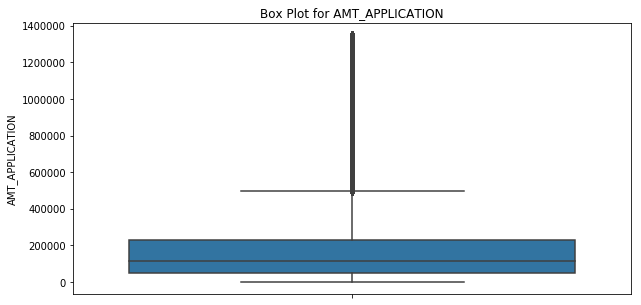

In [359]:
# Finding outliers in the amount applied during loan application
plot_box(filteredPrevAppData,"AMT_APPLICATION")
# We notice that there are outliers for each category

In [360]:
# Checking the mean median and qauntile values
filteredPrevAppData["AMT_APPLICATION"].describe()

count    1.217312e+06
mean     2.065498e+05
std      2.532988e+05
min      0.000000e+00
25%      5.091750e+04
50%      1.118858e+05
75%      2.295000e+05
max      1.350000e+06
Name: AMT_APPLICATION, dtype: float64

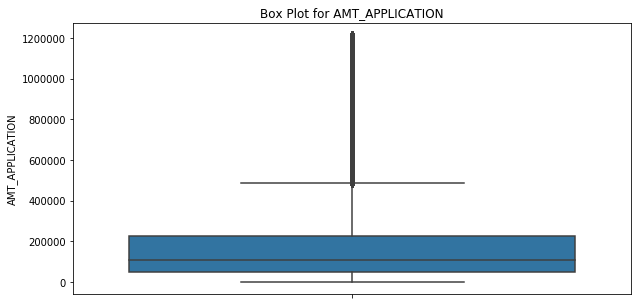

In [361]:
# Filtering out the outliers above 99th percentile
q = filteredPrevAppData["AMT_APPLICATION"].quantile(0.99)
filteredPrevAppData=filteredPrevAppData[filteredPrevAppData['AMT_APPLICATION']<=q]

# Plotting the box plot after removing outliers
plot_box(filteredPrevAppData,"AMT_APPLICATION")

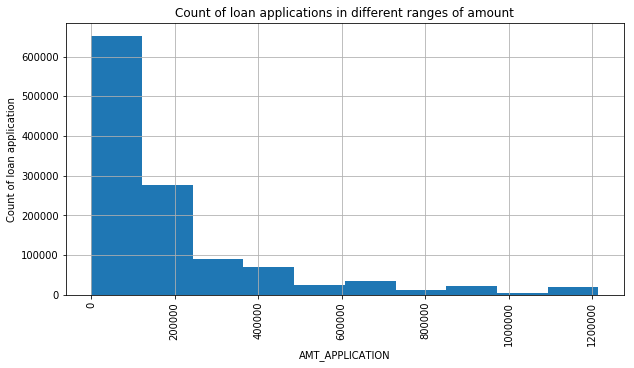

In [362]:
# Plotting the count of loan applications in different ranges of AMT_APPLICATION
fig, ax = plt.subplots(figsize=(10, 5))
filteredPrevAppData['AMT_APPLICATION'].hist()

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.title('Count of loan applications in different ranges of amount')
plt.xlabel('AMT_APPLICATION')
plt.ylabel('Count of loan application')
# Showing the plot
plt.show()

## INFERENCE:
As we have already seen in the analysis above, majority of the Loan amount lies below 200000, 
We can categorize the amounts.

In [363]:
# Defining a function to categorize the loan amount
def CategorizeLoanAmt(amt):
    if(amt<=75000):
        return 'Low Loan Amount'
    elif((amt>75000) & (amt<150000)):
        return 'Mid Loan Amount'
    else:
        return 'High Loan Amount'

# Creating a new derived column showing the category of amount application
filteredPrevAppData['AMT_APPLICATION_CATEGORY']=filteredPrevAppData['AMT_APPLICATION'].apply(lambda x: CategorizeLoanAmt(x))

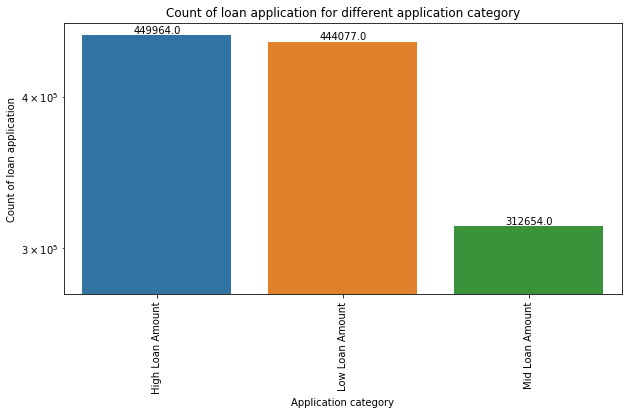

In [364]:
# Plotting the number of loan applications for each application category
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_yscale('log')
p1=sns.countplot(x=filteredPrevAppData['AMT_APPLICATION_CATEGORY'],data=filteredPrevAppData,
              order = filteredPrevAppData['AMT_APPLICATION_CATEGORY'].value_counts().index,ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Application category')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for different application category')

for p in p1.patches:
    p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Showing the plot
plt.show()

# INFERENCE
Most the previous loan applications are in high and low loan category followed by mid

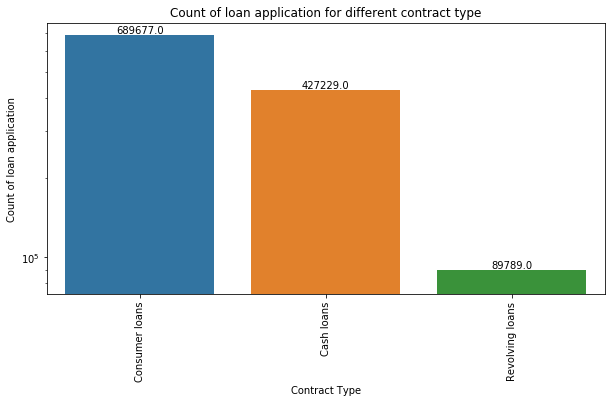

In [365]:
# Plotting the number of loan applications for each contract type
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_yscale('log')
p1=sns.countplot(x=filteredPrevAppData['NAME_CONTRACT_TYPE'],data=filteredPrevAppData,
              order = filteredPrevAppData['NAME_CONTRACT_TYPE'].value_counts().index,ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for different contract type')

for p in p1.patches:
    p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Showing the plot
plt.show()

# INFERENCE
Most the previous loan applications are of consumer loans and cash loan category

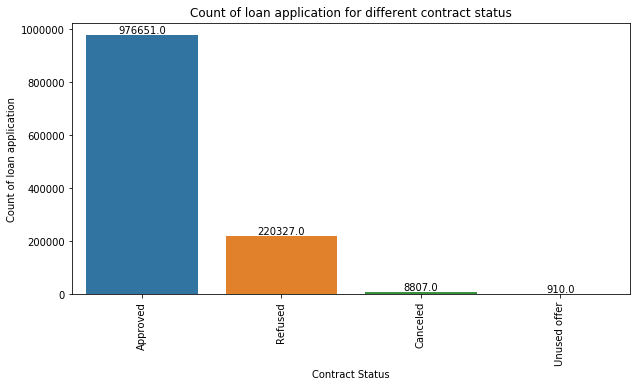

In [366]:
# Plotting the number of loan applications for each contract status
fig, ax = plt.subplots(figsize=(10, 5))

p1=sns.countplot(x=filteredPrevAppData['NAME_CONTRACT_STATUS'],data=filteredPrevAppData,
              order = filteredPrevAppData['NAME_CONTRACT_STATUS'].value_counts().index,ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Status')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for different contract status')

for p in p1.patches:
    p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')

# Showing the plot
plt.show()

# INFERENCE
Most the previous loan applications are in approved category.

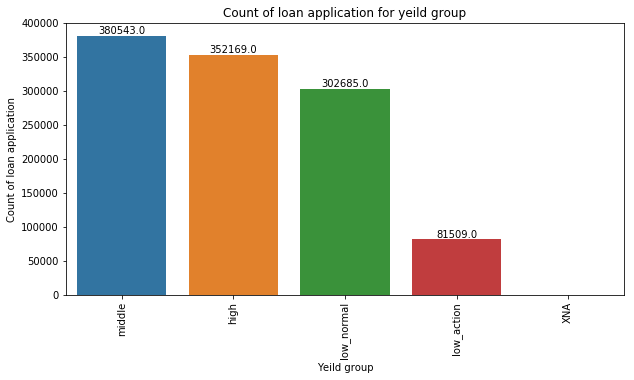

In [367]:
# Plotting the yeild group
fig, ax = plt.subplots(figsize=(10, 5))
yDf=filteredPrevAppData[~filteredPrevAppData['NAME_YIELD_GROUP'].isin(['XNA'])]
p1=sns.countplot(x=yDf['NAME_YIELD_GROUP'],
              data=yDf, 
              order = yDf['NAME_YIELD_GROUP'].value_counts().index, ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Yeild group')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for yeild group')

for p in p1.patches:
    p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),
           ha = 'center', va = 'center', xytext = (0, 5), textcoords = 'offset points')
    
# Showing the plot
plt.show()

# INFERENCE
Majority of previous loans are in middle yeild group followed by high and then low normal

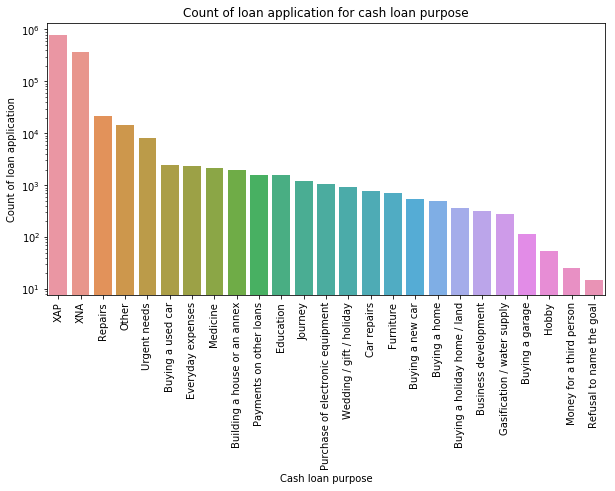

In [368]:
# Plotting the cash loan purpose
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_yscale('log')
p1=sns.countplot(x=filteredPrevAppData['NAME_CASH_LOAN_PURPOSE'],
              data=filteredPrevAppData,
              order = filteredPrevAppData['NAME_CASH_LOAN_PURPOSE'].value_counts().index,
              ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Cash loan purpose')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for cash loan purpose')

# Showing the plot
plt.show()

# INFERENCE
Cash loans are taken for Repairs, Urgent needs, Buying used car, building a house or annex, everyday expenses.
Ignoring XAP and XNA as they may be denoting invalid values.

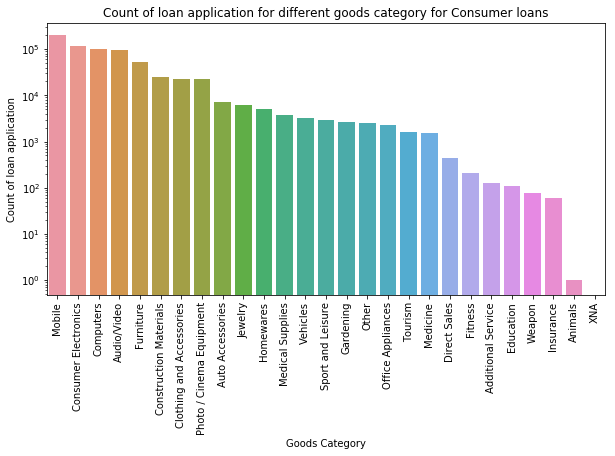

In [369]:
# For what goods are consumer loans taken?
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_yscale('log')
# Ignoring XNA as null value
fdf=filteredPrevAppData[~filteredPrevAppData['NAME_GOODS_CATEGORY'].isin(['XNA'])]
fdf=fdf[fdf['NAME_CONTRACT_TYPE']=='Consumer loans']
sns.countplot(x=fdf['NAME_GOODS_CATEGORY'],data=fdf,order = fdf['NAME_GOODS_CATEGORY'].value_counts().index,ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Goods Category')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for different goods category for Consumer loans')

# Showing the plot
plt.show()

# INFERENCE
Consumer loans are taken for buying Mobile, Consumer electronics, computers, Audio/Video, Furniture

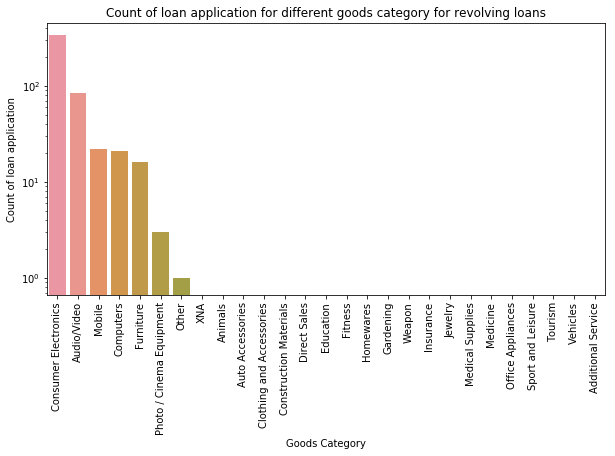

In [370]:
# For what goods are revolving loans taken?
fig, ax = plt.subplots(figsize=(10, 5))
ax.set_yscale('log')
# Ignoring XNA as NA value
rdf=filteredPrevAppData[~filteredPrevAppData['NAME_GOODS_CATEGORY'].isin(['XNA'])]
rdf=rdf[rdf['NAME_CONTRACT_TYPE']=='Revolving loans']
sns.countplot(x=rdf['NAME_GOODS_CATEGORY'],data=rdf,order = rdf['NAME_GOODS_CATEGORY'].value_counts().index,ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Goods Category')
plt.ylabel('Count of loan application')
plt.title('Count of loan application for different goods category for revolving loans')

# Showing the plot
plt.show()

# INFERENCE
Revolving loans are taken for Consumer electronics, Audio/Video, Mobile, Computers, Furniture

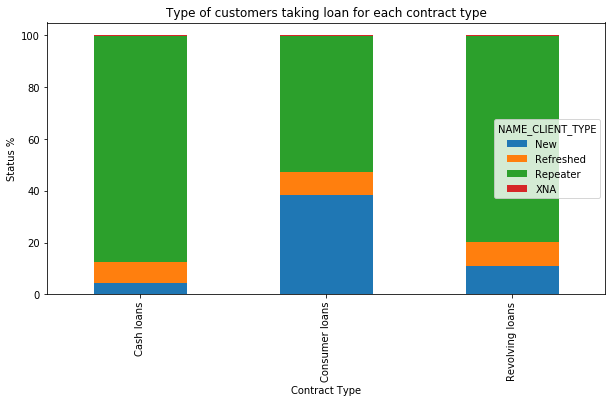

In [371]:
# Plotting the status of loans for each contract type
fig, ax = plt.subplots(figsize=(10, 5))

percentageData1=pd.crosstab(filteredPrevAppData['NAME_CONTRACT_TYPE'],
                            filteredPrevAppData['NAME_CLIENT_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)
# Plotting the percentage columns
percentageData1.plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Status %')
plt.title('Type of customers taking loan for each contract type')

# Showing the plot
plt.show()

# INFERENCE
1. Consumer loans get the highest new customers, 
2. Cash loans and Revolving loans are applied by mainly Repeater customers

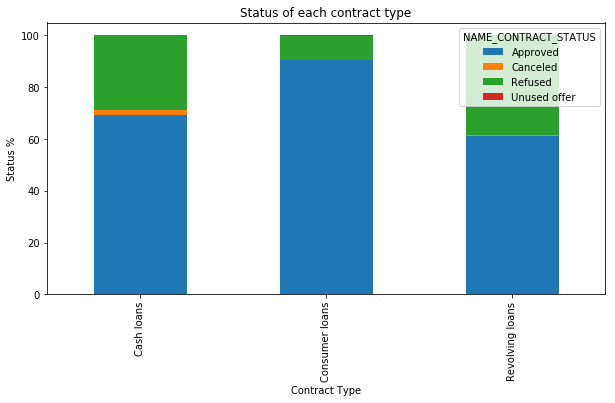

In [372]:
# Distribution of status for each contract type
fig, ax = plt.subplots(figsize=(10,5))

# Plotting the percentage columns
pd.crosstab(filteredPrevAppData['NAME_CONTRACT_TYPE'],
            filteredPrevAppData['NAME_CONTRACT_STATUS']).apply(lambda r: r*100/r.sum(), axis=1).plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Status %')
plt.title('Status of each contract type')

# Showing the plot
plt.show()

# INFERENCE
1. Consumer loans are approved the most, followed by cash loans and revolving loans
2. Cancelled rate of Cash loans are more than Consumer and Revolving loans

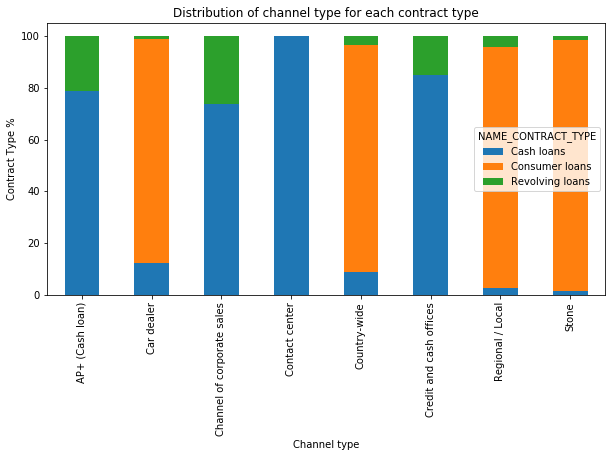

In [373]:
# From which channels are the applications received?
# Plotting the channel type for each contract type
fig, ax = plt.subplots(figsize=(10, 5))
percentageData1=pd.crosstab(filteredPrevAppData['CHANNEL_TYPE'],
                            filteredPrevAppData['NAME_CONTRACT_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)
# Plotting the percentage columns
percentageData1.plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Channel type')
plt.ylabel('Contract Type %')
plt.title('Distribution of channel type for each contract type')

# Showing the plot
plt.show()

# INFERENCE
1. Consumer loans are distributed mostly by Stone, Regional/Local, Car dealer and Country-wide
2. Cash loans are distributed mostly by Contact center, Credit and cash offices, Channel of corporate sales
3. Revolving loans are distributed by mostly AP+(Cash loan), Channel of corporate sales and credit and cash offices

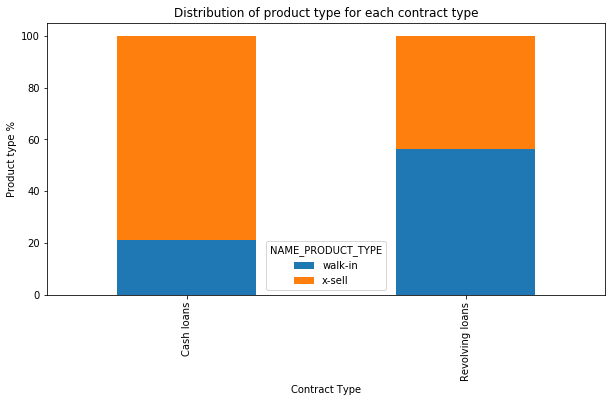

In [374]:
# Plotting the product type for each contract type
fig, ax = plt.subplots(figsize=(10, 5))
proDf=filteredPrevAppData[~filteredPrevAppData['NAME_PRODUCT_TYPE'].isin(['XNA'])]
percentageData1=pd.crosstab(proDf['NAME_CONTRACT_TYPE'],
                            proDf['NAME_PRODUCT_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)
# Plotting the percentage columns
percentageData1.plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Product type %')
plt.title('Distribution of product type for each contract type')

# Showing the plot
plt.show()

# INFERENCE
1. Most of the cash loans are of type x-sell
2. Revolving loans see almost equal distribution in x-sell an walk-in.

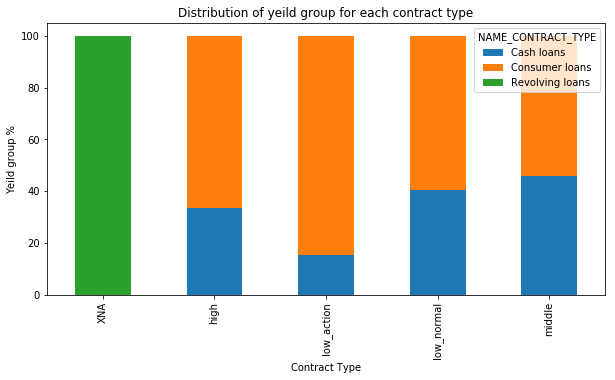

In [375]:
# Plotting the yeild group for each contract type
fig, ax = plt.subplots(figsize=(10, 5))
percentageData1=pd.crosstab(filteredPrevAppData['NAME_YIELD_GROUP'],
                            filteredPrevAppData['NAME_CONTRACT_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)
# Plotting the percentage columns
percentageData1.plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Yeild group %')
plt.title('Distribution of yeild group for each contract type')

# Showing the plot
plt.show()

# INFERENCE
1. Cash loans are mainly given in middle, low normal, high and then low action yeild group
2. Consumer loans are given in low action, followed by high, middle, low normal

Ignoring XNA values as it may denote invalid value

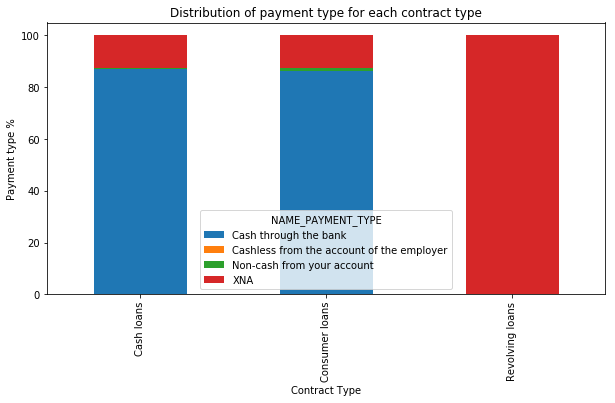

In [376]:
# Plotting the payment type for each contract type
fig, ax = plt.subplots(figsize=(10, 5))
percentageData1=pd.crosstab(filteredPrevAppData['NAME_CONTRACT_TYPE'],filteredPrevAppData['NAME_PAYMENT_TYPE']).apply(lambda r: r*100/r.sum(), axis=1)
# Plotting the percentage columns
percentageData1.plot.bar(stacked=True,ax=ax)

# Adding x,y axis labels and title to the graph
plt.xlabel('Contract Type')
plt.ylabel('Payment type %')
plt.title('Distribution of payment type for each contract type')

# Showing the plot
plt.show()

# INFERENCE
Consumer loans and cash loans are mainly paid by cash through banks

In [377]:
# Finding the status categories
filteredPrevAppData['NAME_CONTRACT_STATUS'].unique()

[Approved, Refused, Unused offer, Canceled]
Categories (4, object): [Approved, Refused, Unused offer, Canceled]

### As the cancelled and unused category applicantions are very less in this dataset, ignoring them for further analysis.
### Moving forward, we will see which category loans are approved and which are refused.
### Further we will look at the categories which suggest that a client can default.
### And analyze if those category loans are approved or refused by the banks. 
### By this analysis we can give recommendations to the bank whether to accept or refuse certain category loans.

# REFUSED CATEGORY

In [378]:
# Checking for null values in Refused category
refusedDf=filteredPrevAppData[filteredPrevAppData['NAME_CONTRACT_STATUS']=='Refused']
GetPercentageNullValues(refusedDf,0)

DAYS_TERMINATION               100.0
DAYS_LAST_DUE                  100.0
DAYS_LAST_DUE_1ST_VERSION      100.0
DAYS_FIRST_DUE                 100.0
DAYS_FIRST_DRAWING             100.0
NFLAG_INSURED_ON_APPROVAL      100.0
NAME_TYPE_SUITE                 31.9
WEEKDAY_APPR_PROCESS_START       0.0
NAME_CASH_LOAN_PURPOSE           0.0
NFLAG_LAST_APPL_IN_DAY           0.0
FLAG_LAST_APPL_PER_CONTRACT      0.0
HOUR_APPR_PROCESS_START          0.0
AMT_APPLICATION                  0.0
AMT_GOODS_PRICE                  0.0
AMT_CREDIT                       0.0
DAYS_DECISION                    0.0
AMT_ANNUITY                      0.0
NAME_CONTRACT_TYPE               0.0
SK_ID_CURR                       0.0
NAME_CONTRACT_STATUS             0.0
AMT_APPLICATION_CATEGORY         0.0
NAME_PAYMENT_TYPE                0.0
CODE_REJECT_REASON               0.0
NAME_CLIENT_TYPE                 0.0
NAME_GOODS_CATEGORY              0.0
NAME_PORTFOLIO                   0.0
NAME_PRODUCT_TYPE                0.0
C

In [379]:
# Removing cols with null values
# We see that some columns have 100% null values and the NAME_TYPE_SUITE column will not be used for analysis so removing it
refusedColsToDrop=ColumnsWithNullValues(refusedDf,0)
refusedColsToDrop

['DAYS_TERMINATION',
 'DAYS_LAST_DUE',
 'DAYS_LAST_DUE_1ST_VERSION',
 'DAYS_FIRST_DUE',
 'DAYS_FIRST_DRAWING',
 'NFLAG_INSURED_ON_APPROVAL',
 'NAME_TYPE_SUITE']

In [380]:
# The above columns can be ignored for analysis as they have null values
# The rate columns and days first drawing and termination will be null because the loan was never activated
refusedDf.drop(columns=refusedColsToDrop,inplace=True)

In [381]:
# Checking the info of the refused data frame
refusedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 220327 entries, 4 to 1670207
Data columns (total 27 columns):
SK_ID_PREV                     220327 non-null int64
SK_ID_CURR                     220327 non-null int64
NAME_CONTRACT_TYPE             220327 non-null category
AMT_ANNUITY                    220327 non-null float64
AMT_APPLICATION                220327 non-null float64
AMT_CREDIT                     220327 non-null float64
AMT_GOODS_PRICE                220327 non-null float64
WEEKDAY_APPR_PROCESS_START     220327 non-null category
HOUR_APPR_PROCESS_START        220327 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    220327 non-null category
NFLAG_LAST_APPL_IN_DAY         220327 non-null category
NAME_CASH_LOAN_PURPOSE         220327 non-null category
NAME_CONTRACT_STATUS           220327 non-null category
DAYS_DECISION                  220327 non-null int64
NAME_PAYMENT_TYPE              220327 non-null category
CODE_REJECT_REASON             220327 non-null category
NAME_CLI

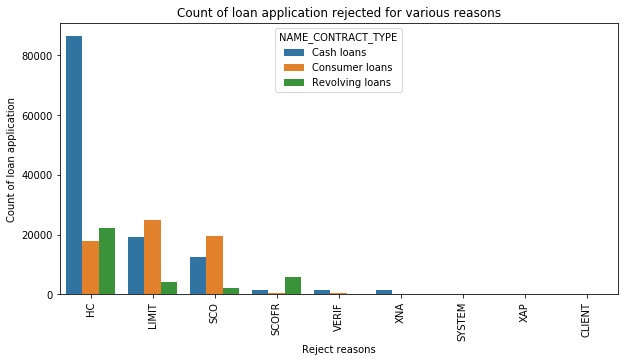

In [382]:
# Why are loan applications rejected?
# Plotting the reject reason for refused status
fig, ax = plt.subplots(figsize=(10, 5))

refDf=refusedDf[~refusedDf['CODE_REJECT_REASON'].isin(['XNA'])]

sns.countplot(x = refusedDf['CODE_REJECT_REASON'], 
              hue = refusedDf['NAME_CONTRACT_TYPE'], 
              data = refusedDf,
              order = refusedDf['CODE_REJECT_REASON'].value_counts().index, ax=ax)

# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.xlabel('Reject reasons')
plt.ylabel('Count of loan application')
plt.title('Count of loan application rejected for various reasons')

# Showing the plot
plt.show()

# INFERENCE
1. Cash loans are mainly rejected due to HC followed by LIMIT and SCO
2. Consumer loans are rejected due to LIMIT, followed by SCO and HC
3. Revolving loans are rejected due to HC, SCOFR, LIMIT, SCO

# APPROVED CATEGORY

In [383]:
# Checking for null values in Approved category
approvedDf=filteredPrevAppData[filteredPrevAppData['NAME_CONTRACT_STATUS']=='Approved']
GetPercentageNullValues(approvedDf,0)

NAME_TYPE_SUITE                32.97
DAYS_TERMINATION                3.74
DAYS_LAST_DUE                   3.74
DAYS_LAST_DUE_1ST_VERSION       3.74
DAYS_FIRST_DUE                  3.74
DAYS_FIRST_DRAWING              3.74
NFLAG_INSURED_ON_APPROVAL       3.74
WEEKDAY_APPR_PROCESS_START      0.00
NAME_CASH_LOAN_PURPOSE          0.00
NFLAG_LAST_APPL_IN_DAY          0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
AMT_APPLICATION                 0.00
AMT_GOODS_PRICE                 0.00
AMT_CREDIT                      0.00
DAYS_DECISION                   0.00
AMT_ANNUITY                     0.00
NAME_CONTRACT_TYPE              0.00
SK_ID_CURR                      0.00
NAME_CONTRACT_STATUS            0.00
AMT_APPLICATION_CATEGORY        0.00
NAME_PAYMENT_TYPE               0.00
CODE_REJECT_REASON              0.00
NAME_CLIENT_TYPE                0.00
NAME_GOODS_CATEGORY             0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
C

In [384]:
# Getting the columns with more than 30% null values
approvedColsToDrop=ColumnsWithNullValues(approvedDf,30)
approvedColsToDrop

['NAME_TYPE_SUITE']

In [385]:
# The above columns can be ignored for analysis as they have null values
approvedDf.drop(columns=approvedColsToDrop,inplace=True)

In [386]:
# Checking the columns with null values above 0%
colsWithNull=ColumnsWithNullValues(approvedDf,0)

# Observing the mean, median and std of the columns  - which can be used to impute the null values and remove outliers
approvedDf[colsWithNull].describe()

DAYS_TERMINATION  DAYS_LAST_DUE  DAYS_LAST_DUE_1ST_VERSION  \
count     940143.000000  940143.000000              940143.000000   
mean       71616.644882   70299.197682               19449.546014   
std       146016.183714  145019.043545               83463.942269   
min        -2874.000000   -2889.000000               -2801.000000   
25%        -1334.000000   -1350.000000               -1313.000000   
50%         -556.000000    -567.000000                -425.000000   
75%          -96.000000    -104.000000                  55.000000   
max       365243.000000  365243.000000              365243.000000   

       DAYS_FIRST_DUE  DAYS_FIRST_DRAWING  NFLAG_INSURED_ON_APPROVAL  
count   940143.000000       940143.000000              940143.000000  
mean     10804.970247       353440.058285                   0.342538  
std      64955.586964        64623.432208                   0.474559  
min      -2892.000000        -2854.000000                   0.000000  
25%      -1622.000000       365243.000000                   0.000000  
50%       -837.000000       365243.000000                   0.000000  
75%       -414.000000       365243.000000                   1.000000  
max     365243.000000       365243.000000                   1.000000

In [387]:
# We see that DAYS_FIRST_DRAWING has majority of values as 365243 which is almost 1000 years which is impossible
# Also DAYS_LAST_DUE_1ST_VERSION seems to a duplicate column of DAYS_LAST_DUE. 
# Thus droping those columns
approvedDf.drop(columns=['DAYS_LAST_DUE_1ST_VERSION','DAYS_FIRST_DRAWING'],inplace=True)

In [388]:
# Removing the outliers in Days termination, first and last due columns
# They have max values as 365243 which is impossible
approvedDf=approvedDf[approvedDf['DAYS_FIRST_DUE']!=365243]
approvedDf=approvedDf[approvedDf['DAYS_TERMINATION']!=365243]
approvedDf=approvedDf[approvedDf['DAYS_LAST_DUE']!=365243]
approvedDf[['DAYS_TERMINATION','DAYS_FIRST_DUE','DAYS_LAST_DUE']].describe()

DAYS_TERMINATION  DAYS_FIRST_DUE  DAYS_LAST_DUE
count     750591.000000   750591.000000  750591.000000
mean        -997.050548    -1260.949193   -1008.389480
std          749.432274      760.010405     753.927901
min        -2874.000000    -2892.000000   -2889.000000
25%        -1564.000000    -1853.000000   -1584.000000
50%         -807.000000    -1071.000000    -816.000000
75%         -354.000000     -627.000000    -362.000000
max           -2.000000       -3.000000      -3.000000

In [389]:
# After removing the outliers above, imputing the na values with median
approvedDf['DAYS_FIRST_DUE'].fillna(approvedDf['DAYS_FIRST_DUE'].median(),inplace=True)
approvedDf['DAYS_TERMINATION'].fillna(approvedDf['DAYS_TERMINATION'].median(),inplace=True)
approvedDf['DAYS_LAST_DUE'].fillna(approvedDf['DAYS_LAST_DUE'].median(),inplace=True)

In [390]:
# As this is a categorical column, checking the frequency of each category
approvedDf['NFLAG_INSURED_ON_APPROVAL'].value_counts()

0.0    499727
1.0    250864
Name: NFLAG_INSURED_ON_APPROVAL, dtype: int64

In [391]:
# As most of the values are 0, imputing the null with 0
approvedDf['NFLAG_INSURED_ON_APPROVAL'].fillna(0,inplace=True)

In [392]:
# Printing the info of the approved data frame
approvedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 787099 entries, 0 to 1670213
Data columns (total 31 columns):
SK_ID_PREV                     787099 non-null int64
SK_ID_CURR                     787099 non-null int64
NAME_CONTRACT_TYPE             787099 non-null category
AMT_ANNUITY                    787099 non-null float64
AMT_APPLICATION                787099 non-null float64
AMT_CREDIT                     787099 non-null float64
AMT_GOODS_PRICE                787099 non-null float64
WEEKDAY_APPR_PROCESS_START     787099 non-null category
HOUR_APPR_PROCESS_START        787099 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    787099 non-null category
NFLAG_LAST_APPL_IN_DAY         787099 non-null category
NAME_CASH_LOAN_PURPOSE         787099 non-null category
NAME_CONTRACT_STATUS           787099 non-null category
DAYS_DECISION                  787099 non-null int64
NAME_PAYMENT_TYPE              787099 non-null category
CODE_REJECT_REASON             787099 non-null category
NAME_CLI

In [393]:
# Printing the last due and first due columns
approvedDf.loc[:,['DAYS_LAST_DUE','DAYS_FIRST_DUE']].head(10)

DAYS_LAST_DUE  DAYS_FIRST_DUE
0           -42.0           -42.0
3          -182.0          -482.0
5          -144.0          -654.0
10         -345.0          -705.0
11         -725.0          -785.0
12         -200.0          -830.0
13         -168.0          -378.0
14         -633.0          -693.0
15         -518.0          -668.0
16        -1230.0         -1440.0

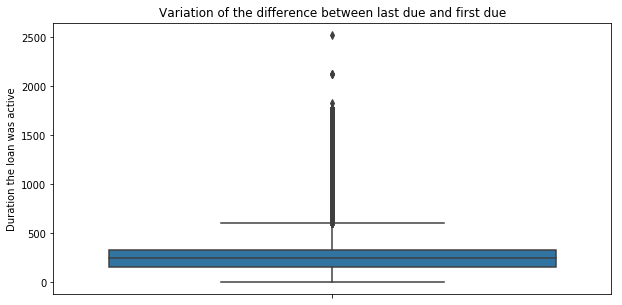

In [394]:
# Last and First due columns make sense for approved loans
# Trying to find the number of days between first and last due

approvedDf['LoanOperationDays']=approvedDf['DAYS_LAST_DUE']-approvedDf['DAYS_FIRST_DUE']

# Plotting the distribution of this new derived column
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(y = approvedDf['LoanOperationDays'])
#ax.set_yscale('log')
# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.title('Variation of the difference between last due and first due')
plt.ylabel('Duration the loan was active')
# Showing the plot
plt.show()

In [395]:
# Finding the outliers
q=approvedDf['LoanOperationDays'].quantile(0.99)

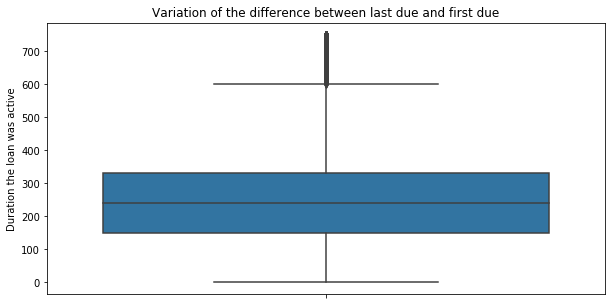

In [396]:
# Some outliers are spotted.
approvedDf=approvedDf[~(approvedDf['LoanOperationDays']>q)] # Removing outliers from the data frame

# Plotting the graph after removing outliers
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(y = approvedDf['LoanOperationDays'])
#ax.set_yscale('log')
# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.title('Variation of the difference between last due and first due')
plt.ylabel('Duration the loan was active')
# Showing the plot
plt.show()

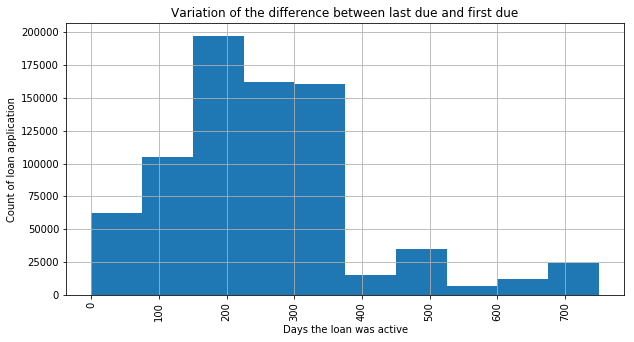

In [397]:
# Plotting the distribution of Loan operation days
fig, ax = plt.subplots(figsize=(10, 5))
approvedDf['LoanOperationDays'].hist()
#ax.set_yscale('log')
# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

# Adding x,y axis labels and title to the graph
plt.title('Variation of the difference between last due and first due')
plt.xlabel('Days the loan was active')
plt.ylabel('Count of loan application')
# Showing the plot
plt.show()

# Most of the approved loans have the difference between last and first due date as 100 days, 250-350 days

In [398]:
# Printing the info of the approved data frame
approvedDf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 779721 entries, 0 to 1670213
Data columns (total 32 columns):
SK_ID_PREV                     779721 non-null int64
SK_ID_CURR                     779721 non-null int64
NAME_CONTRACT_TYPE             779721 non-null category
AMT_ANNUITY                    779721 non-null float64
AMT_APPLICATION                779721 non-null float64
AMT_CREDIT                     779721 non-null float64
AMT_GOODS_PRICE                779721 non-null float64
WEEKDAY_APPR_PROCESS_START     779721 non-null category
HOUR_APPR_PROCESS_START        779721 non-null int64
FLAG_LAST_APPL_PER_CONTRACT    779721 non-null category
NFLAG_LAST_APPL_IN_DAY         779721 non-null category
NAME_CASH_LOAN_PURPOSE         779721 non-null category
NAME_CONTRACT_STATUS           779721 non-null category
DAYS_DECISION                  779721 non-null int64
NAME_PAYMENT_TYPE              779721 non-null category
CODE_REJECT_REASON             779721 non-null category
NAME_CLI

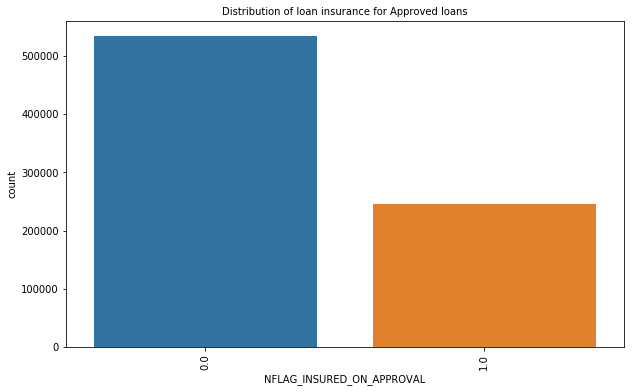

In [399]:
# Insured on approval

fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Distribution of loan insurance for Approved loans', fontsize=10)

p1=sns.countplot(x = approvedDf['NFLAG_INSURED_ON_APPROVAL'],
              data = approvedDf,
              order = approvedDf['NFLAG_INSURED_ON_APPROVAL'].value_counts().index, ax=ax)
p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

# Showing the plot
plt.show()

# INFERENCE
Most of the loans which were apporoved did not have insurance

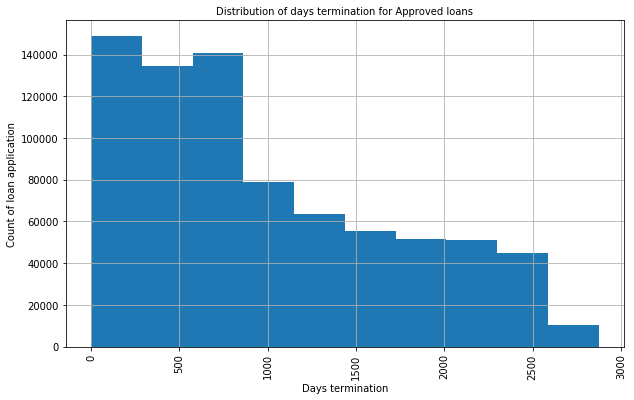

In [400]:
# Days termination for approved loans

fig, ax=plt.subplots(figsize=(10,6))
ax.set_title('Distribution of days termination for Approved loans', fontsize=10)
approvedDf['DAYS_TERMINATION']=approvedDf['DAYS_TERMINATION']*(-1)
approvedDf['DAYS_TERMINATION'].hist()
# Rotating the labels on x axis for readability
plt.xticks(rotation=90)

plt.xlabel('Days termination')
plt.ylabel('Count of loan application')
# Showing the plot
plt.show()

# INFERENCE
Most of the loans which were apporoved were terminated less than 1000days before

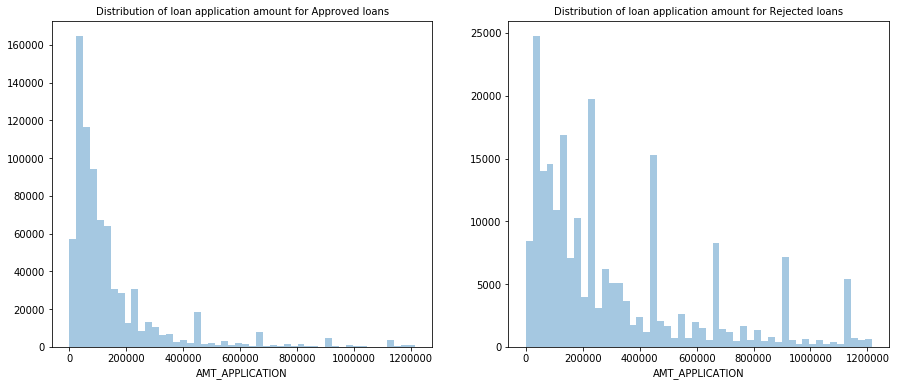

In [401]:
# What role does loan amount play in approval and rejection?

df1=approvedDf['AMT_APPLICATION']
df2=refusedDf['AMT_APPLICATION']

fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
ax[0].set_title('Distribution of loan application amount for Approved loans', fontsize=10)
ax[1].set_title('Distribution of loan application amount for Rejected loans', fontsize=10)

p1=sns.distplot(df1,kde=False,ax=ax[0])
p2=sns.distplot(df2,kde=False,ax=ax[1])
plt.show()

# INFERENCE
1. As the application amount increased, number of loans approved have decreased
2. As the application amount increased, count of loans refused have decreased and we see few spikes at certain intervals.

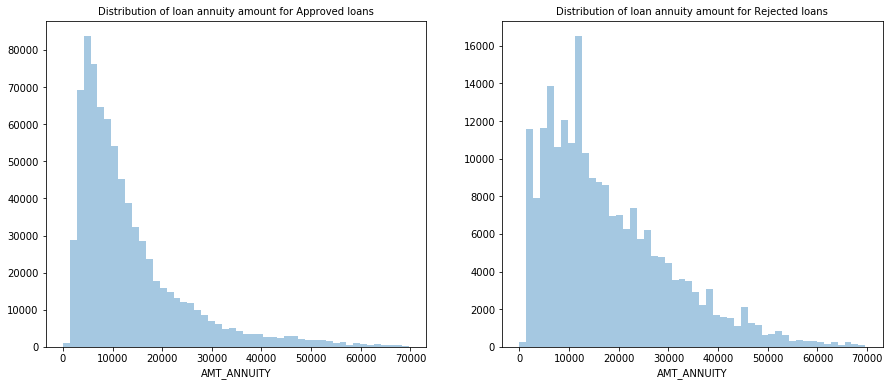

In [402]:
# What role does annuity play in approval and rejection?

df1=approvedDf['AMT_ANNUITY']
df2=refusedDf['AMT_ANNUITY']

fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
ax[0].set_title('Distribution of loan annuity amount for Approved loans', fontsize=10)
ax[1].set_title('Distribution of loan annuity amount for Rejected loans', fontsize=10)

p1=sns.distplot(df1,kde=False,ax=ax[0])
p2=sns.distplot(df2,kde=False,ax=ax[1])

plt.show()

# INFERENCE
1. As the annuity amount increased, approved loans have decreased
2. As the annuity amount increased, refused loans have decreased but not in the same rate as that of approved loans

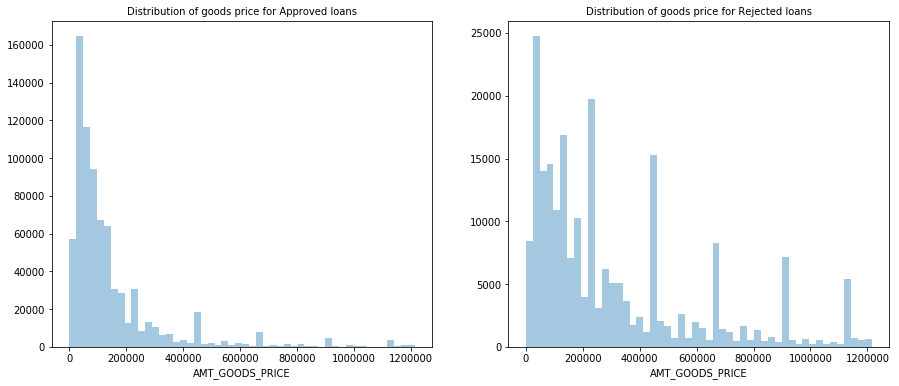

In [403]:
# What role does goods price play in approval and rejection?

df1=approvedDf['AMT_GOODS_PRICE']
df2=refusedDf['AMT_GOODS_PRICE']

fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
ax[0].set_title('Distribution of goods price for Approved loans', fontsize=10)
ax[1].set_title('Distribution of goods price for Rejected loans', fontsize=10)

p1=sns.distplot(df1,kde=False,ax=ax[0])

p2=sns.distplot(df2,kde=False,ax=ax[1])

plt.show()

# INFERENCE
1. As the goods price increased, the number of loans getting approved have decreased with spikes at certain intervals. 
2. As the goods price increased, the number of loans getting rejected have decreased with spikes at certain intervals. 
3. At the spikes, the number of loans approved and refused seems to be equal.

# MERGING APPROVED AND REFUSED DATA

In [404]:
# Merging the approved and refused data frame for further analysis
newDf=approvedDf.append(refusedDf, ignore_index=True,sort=True)

In [405]:
#Binning the "AMT_ANNUITY_RANGE" column 
bins = [0,10000,20000,30000,40000,50000,60000,70000]
slot = ['0-10000', '10000-20000', '20000-30000','30000-40000','40000-50000','50000-60000','60000-70000']
newDf['AMT_ANNUITY_RANGE'] = pd.cut(newDf["AMT_ANNUITY"], bins, labels=slot)
newDf['AMT_ANNUITY_RANGE'].value_counts()

0-10000        465313
10000-20000    307010
20000-30000    126449
30000-40000     54724
40000-50000     28141
50000-60000     13106
60000-70000      5097
Name: AMT_ANNUITY_RANGE, dtype: int64

In [406]:
#Binning the "AMT_CREDIT" column 
bins = [0,400000,800000,1200000,1700000]
slot = ['0-400000', '400000-800000', '800000-1200000','1200000-1700000']
newDf['AMT_CREDIT_RANGE'] = pd.cut(newDf["AMT_CREDIT"], bins, labels=slot)
newDf['AMT_CREDIT_RANGE'].value_counts()

0-400000           862233
400000-800000       93470
800000-1200000      33376
1200000-1700000     10761
Name: AMT_CREDIT_RANGE, dtype: int64

In [407]:
#Binning the "AMT_GOODS_PRICE" column 
bins = [0,300000,600000,900000,1300000]
slot = ['0-300000', '300000-600000', '600000-900000','900000-1300000']
newDf['AMT_GOODS_PRICE_RANGE'] = pd.cut(newDf["AMT_GOODS_PRICE"], bins, labels=slot)
newDf['AMT_GOODS_PRICE_RANGE'].value_counts()

0-300000          829315
300000-600000     101347
600000-900000      45727
900000-1300000     20299
Name: AMT_GOODS_PRICE_RANGE, dtype: int64

In [408]:
# Creating a function for the univariate plots
def plot_univariatePrev(var,annot=True):
    fig=plt.figure(figsize=(10,5),dpi=150)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_title('% of Approved loans for ' + '%s' %var)
    ax2.set_title('% of Refused loans for ' + '%s' %var)
    
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')
    
    cDf=pd.crosstab(newDf[var],newDf['NAME_CONTRACT_STATUS']).apply(lambda r: r*100/r.sum(), axis=1)
    
    aDf=cDf['Approved'].sort_values(ascending=False)
    rdDf=cDf['Refused'].sort_values(ascending=False)
    
    p1=sns.barplot(y=aDf.values,x=aDf.index.tolist(), ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
    
    p2=sns.barplot(y=rdDf.values,x=rdDf.index.tolist(), ax=ax2)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)
    
    if(annot):
        for p in p1.patches:
            p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
        for p in p2.patches:
            p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    
    fig.tight_layout()
    plt.show()

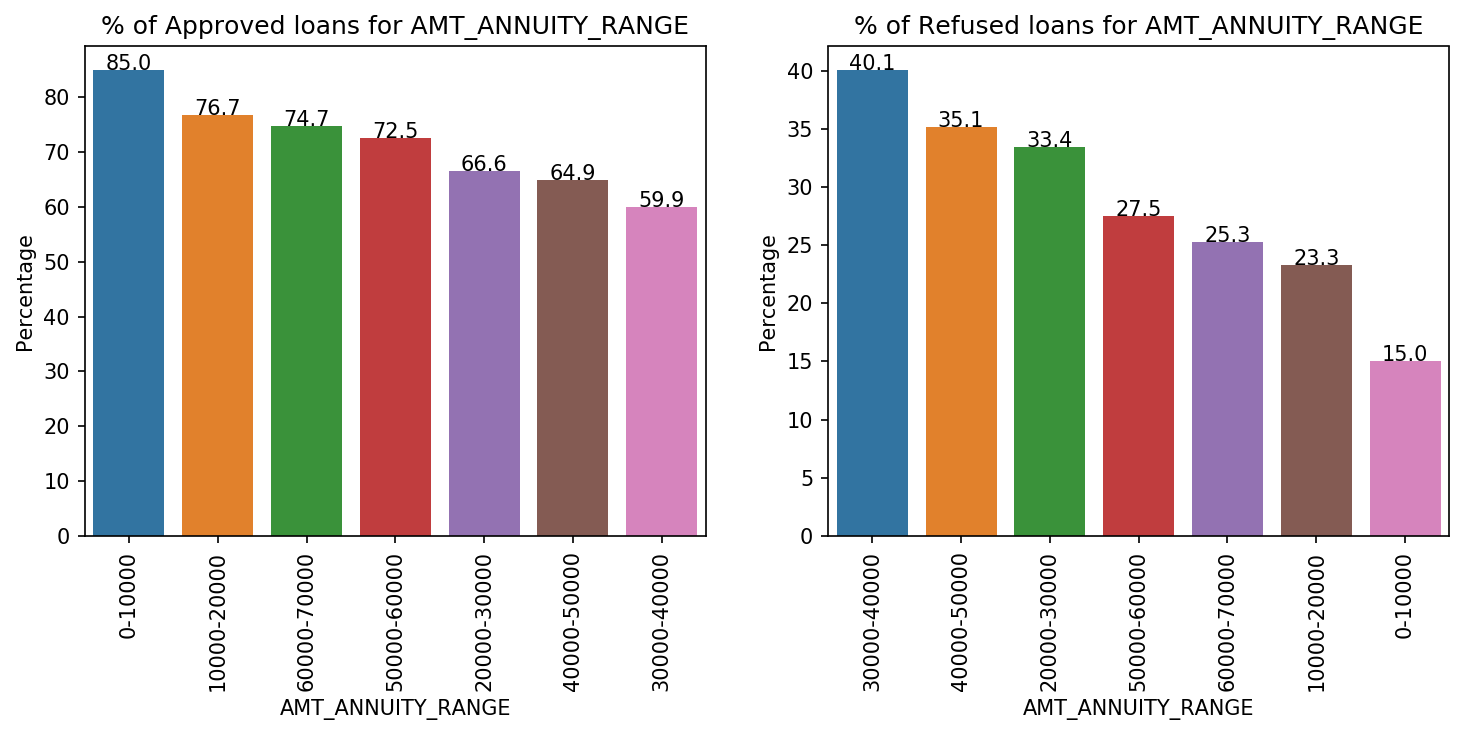

In [409]:
# Plotting the approval and refused % based on annuity range

plot_univariatePrev('AMT_ANNUITY_RANGE')

# INFERENCE
1. Annuity range between 30-40k are refused mostly.
2. Annuity range between 0-10k are approved in most of the cases.

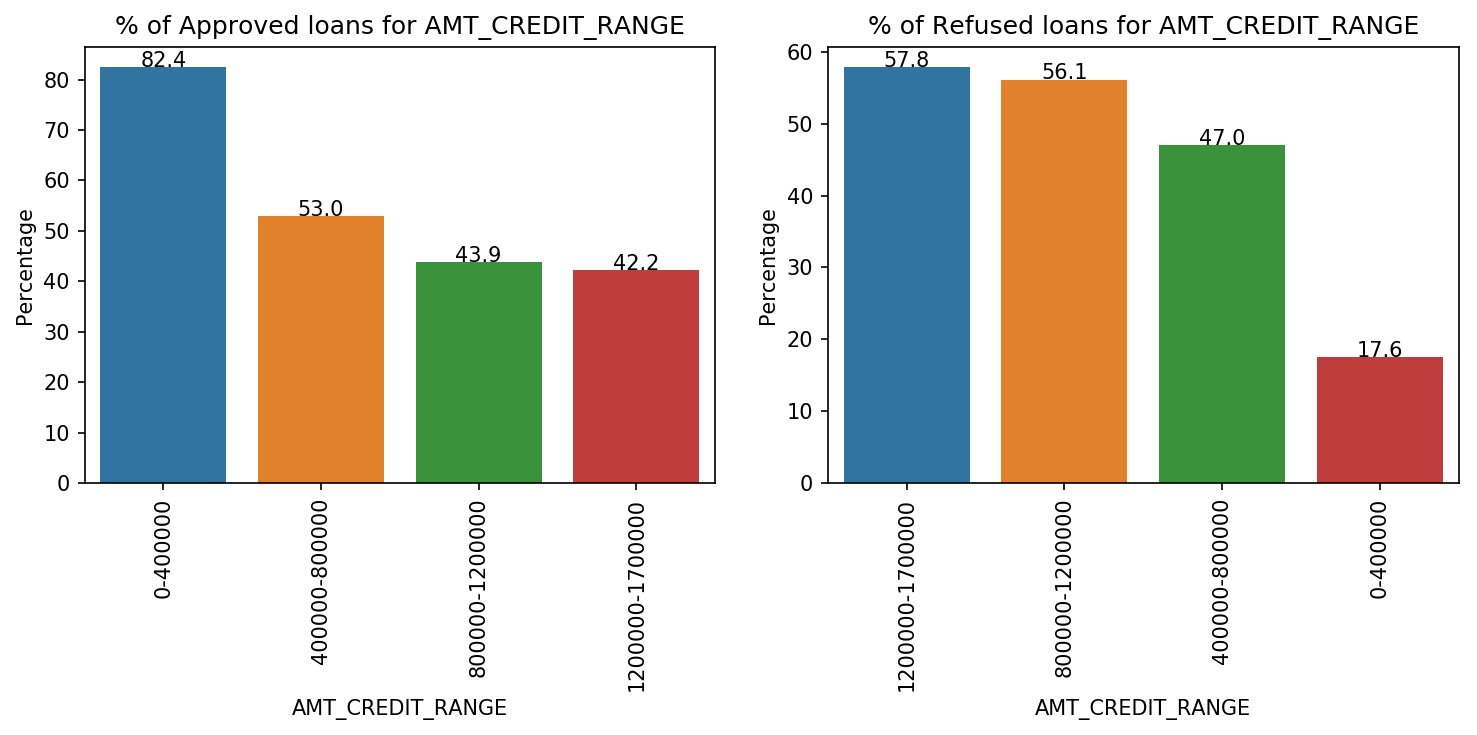

In [410]:
# Plotting the approval and refused % based on credit range

plot_univariatePrev('AMT_CREDIT_RANGE')

# INFERENCE
1. 8-17lakhs credit range loans are refused mostly.
2. 0-4 lakhs loan are approved more than other credit ranges.

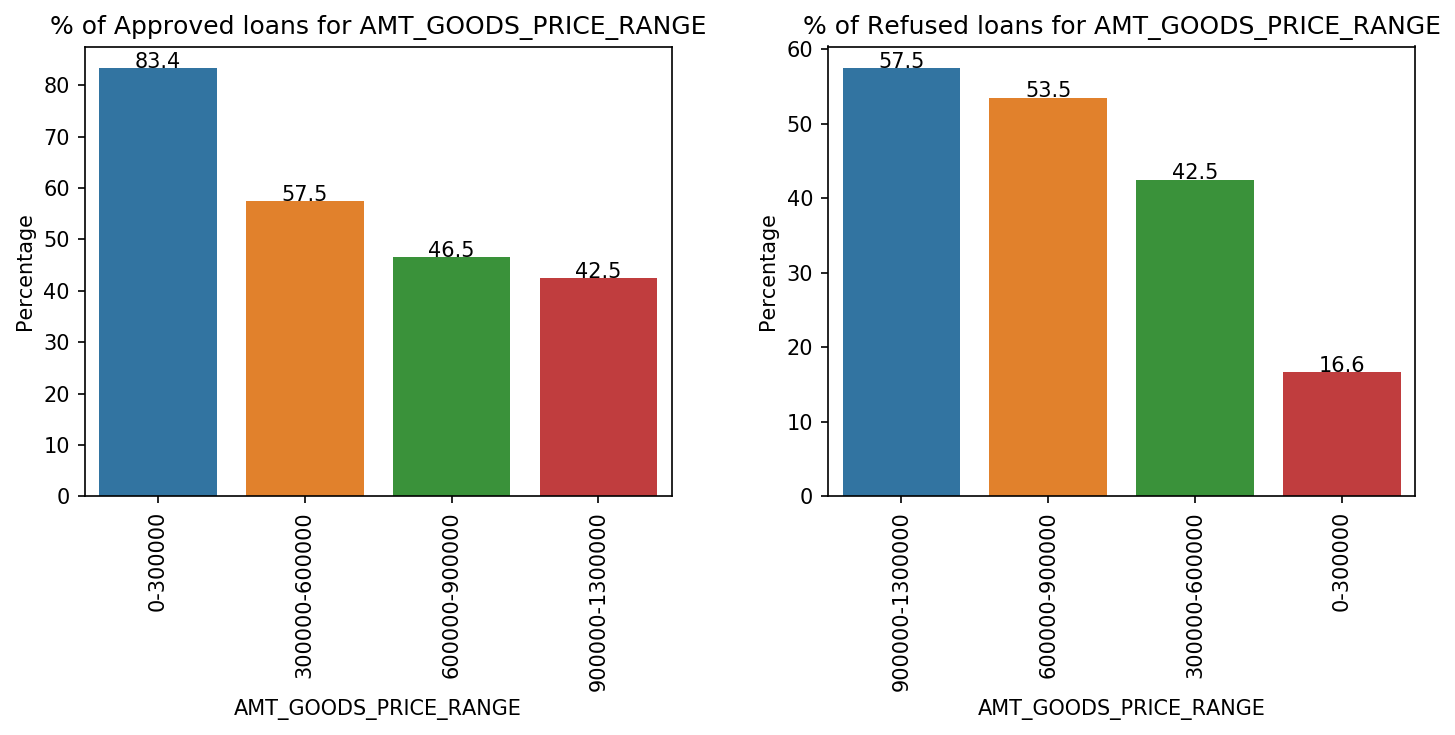

In [411]:
# Plotting the approval and refused % based on goods price range

plot_univariatePrev('AMT_GOODS_PRICE_RANGE')

# INFERENCE
1. 6-13 lakhs goods price loans are refused more than other ranges.
2. 0-3 lakhs goods price loans are approved more than other ranges.

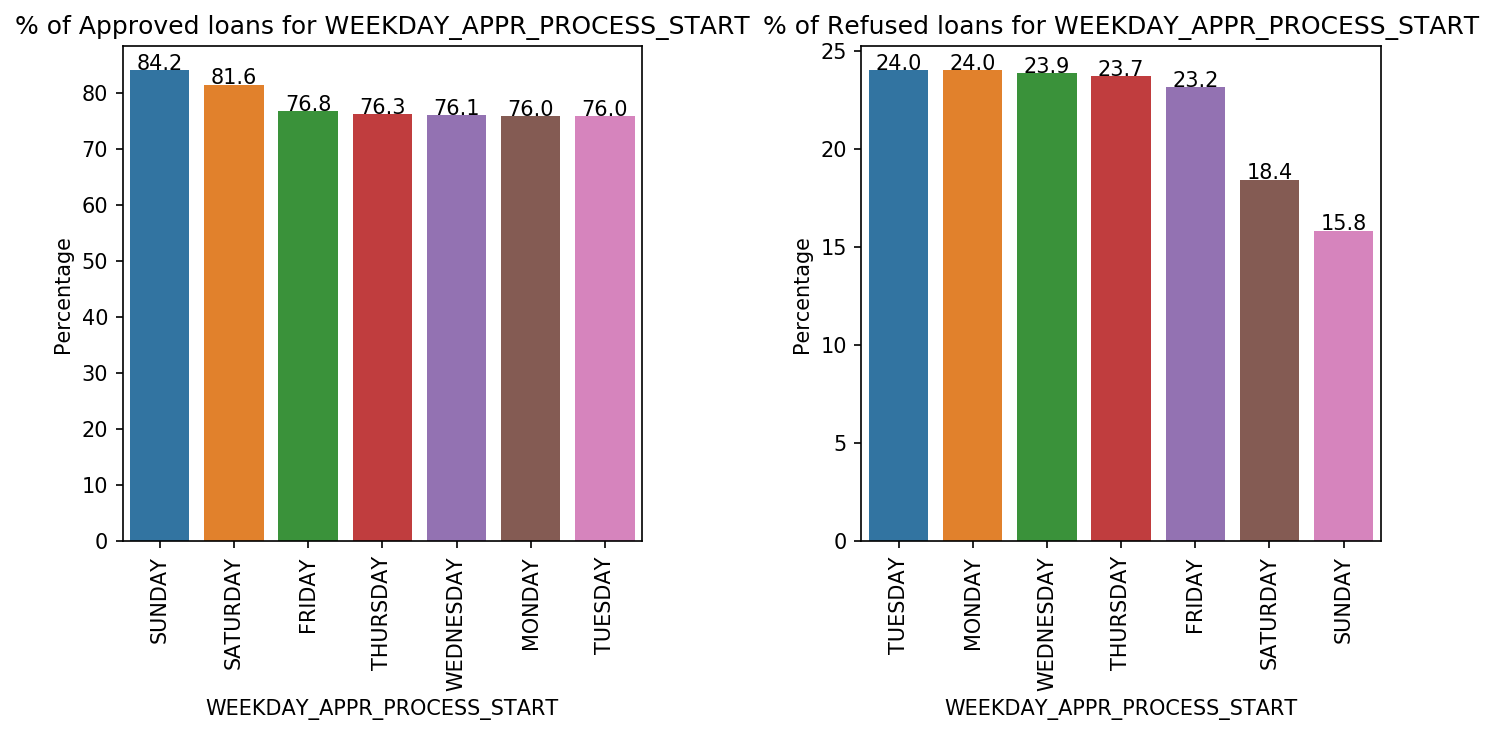

In [412]:
# Plotting the approval and refused % based on weekdays
plot_univariatePrev('WEEKDAY_APPR_PROCESS_START')

# INFERENCE
The graph does not show any distinguished pattern during the working days of the week.

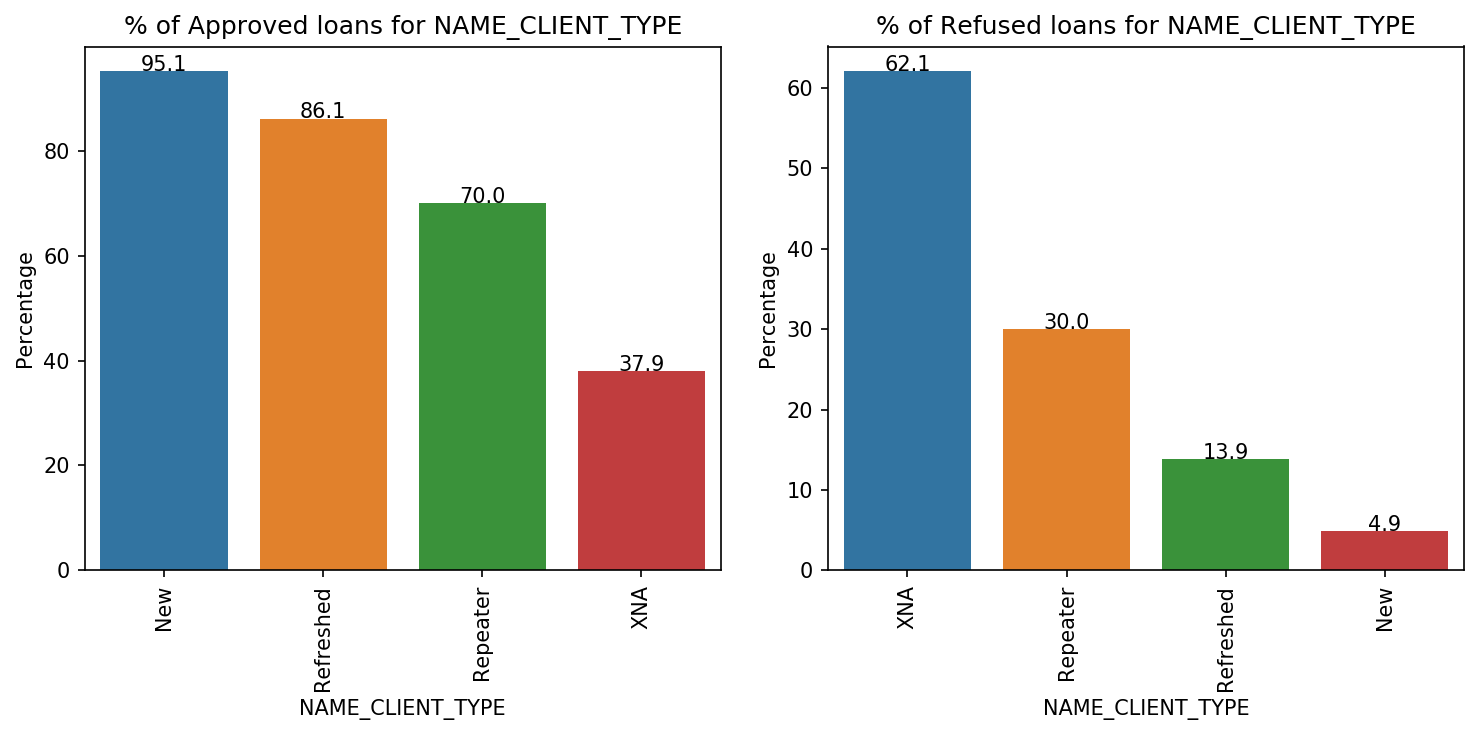

In [413]:
# Plotting the approval and refused % based on client type
plot_univariatePrev('NAME_CLIENT_TYPE')

# INFERENCE
1. New clients have high approval rate.
2.  Repeater have high refusal rate.

Ignoring XNA values as it may be invalid entry.

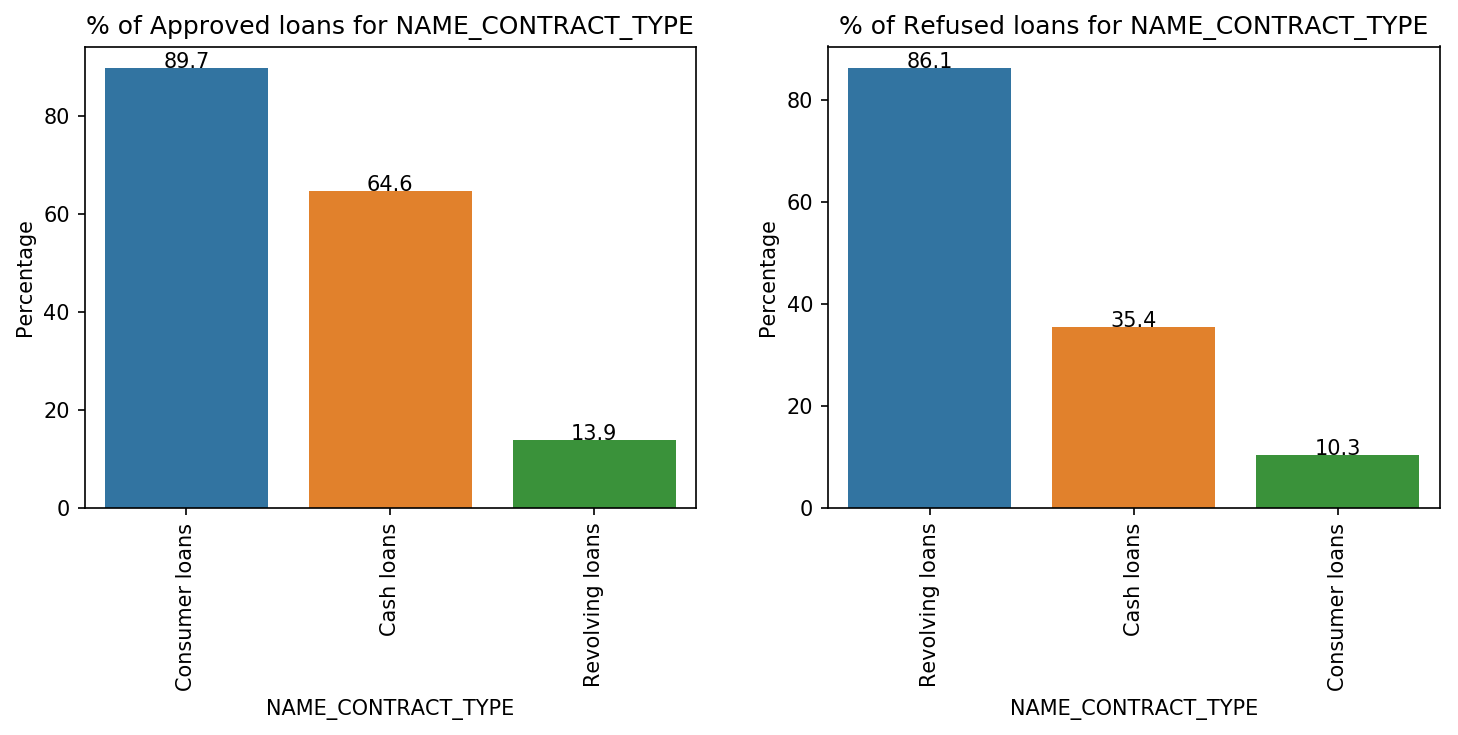

In [414]:
# Plotting the approval and refused % based on contract type
plot_univariatePrev('NAME_CONTRACT_TYPE')

# INFERENCE
1. Revolving and cash loans see high refusal than consumer loans.
2. Consumer loans see high approval than cash and revolving loans.

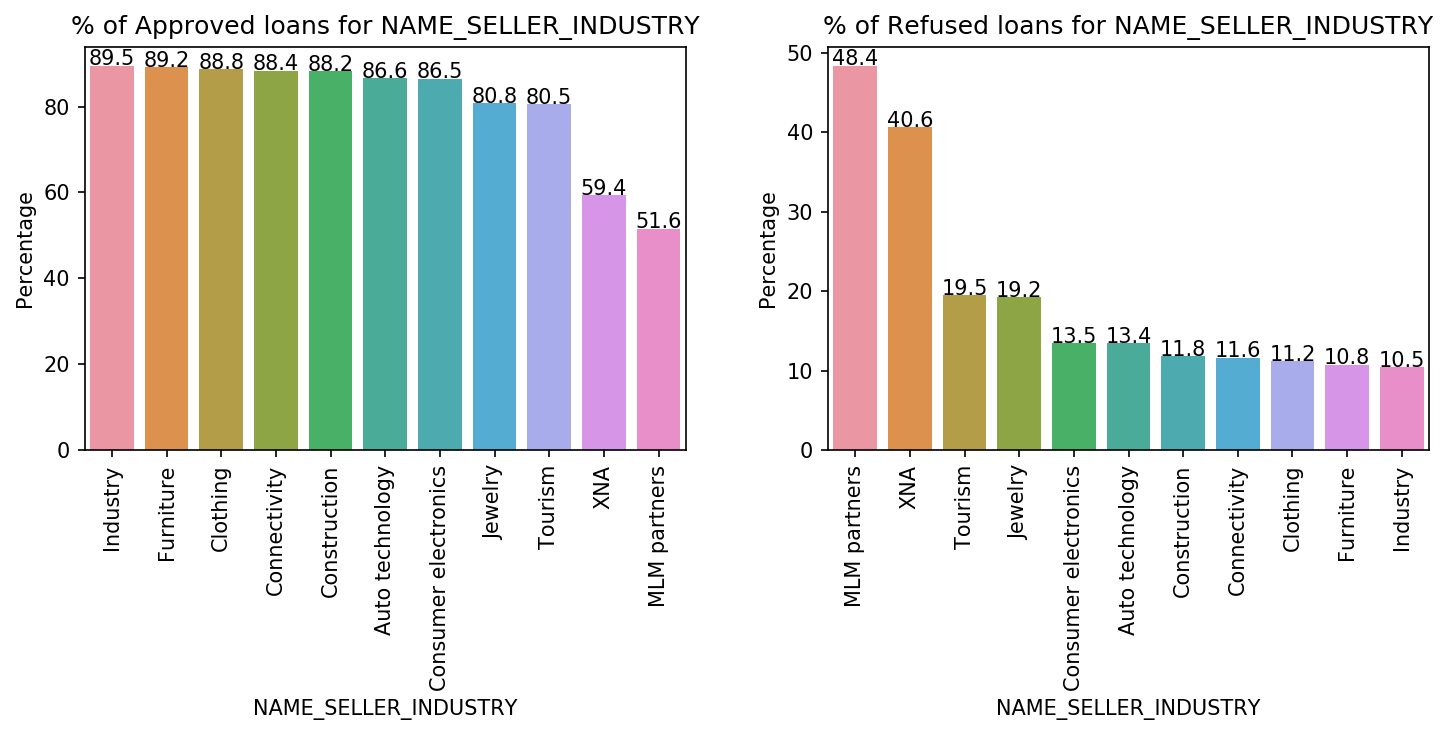

In [415]:
# Plotting the approval and refused % based on seller industry
plot_univariatePrev('NAME_SELLER_INDUSTRY')

# INFERENCE
1. MLM Partners, Tourism and Jewellery show more refusal rate than others
2. Industry, Furniture, Clothing and connectivity see high approval rate than others

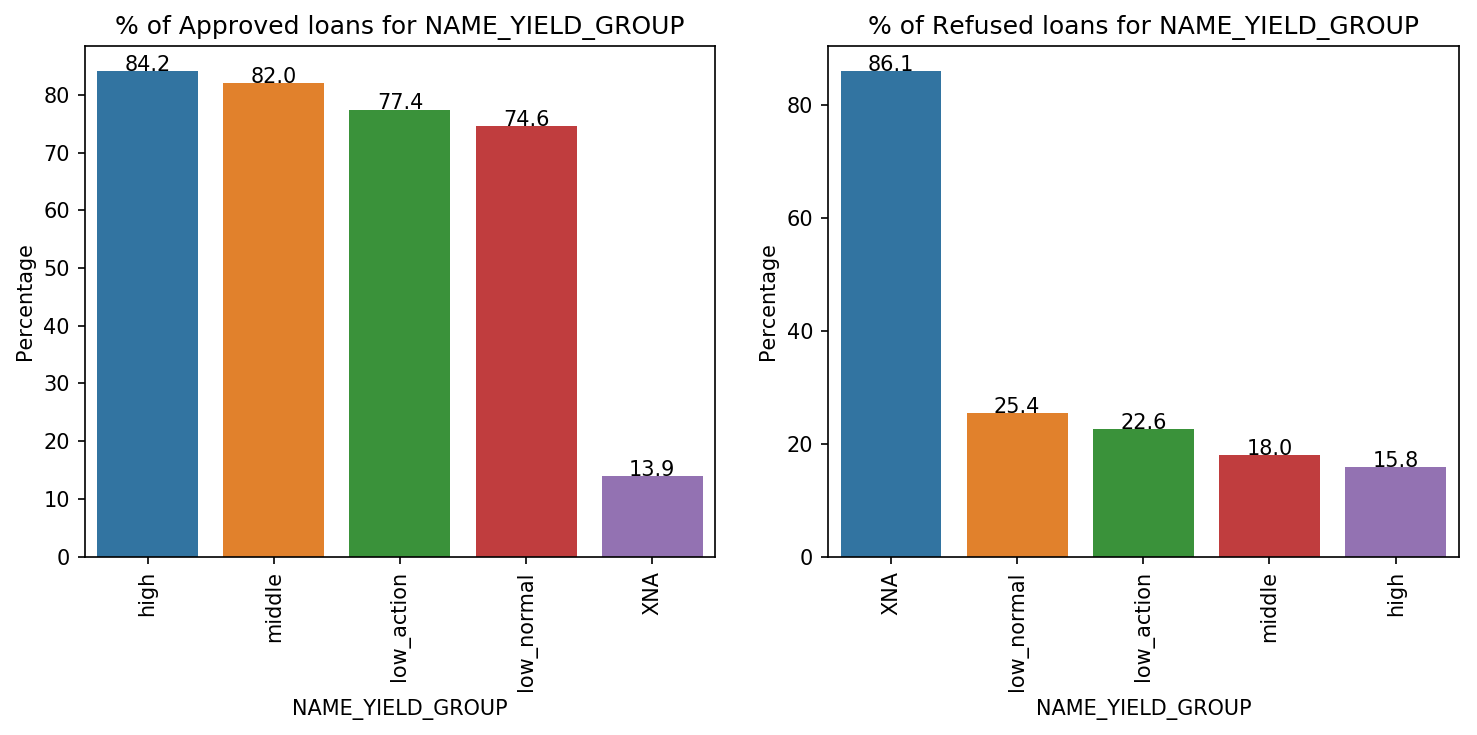

In [416]:
# Plotting the approval and refused % based on yeild group
plot_univariatePrev('NAME_YIELD_GROUP')

# INFERENCE
1. Low normal, low action show more refusal rate than others
2. This maybe because they do not give good returns on the loan to the banks- so banks are reluctant to give them loan
3. High, middle see high approval rate than others - This can be because they give good returns to the bank.

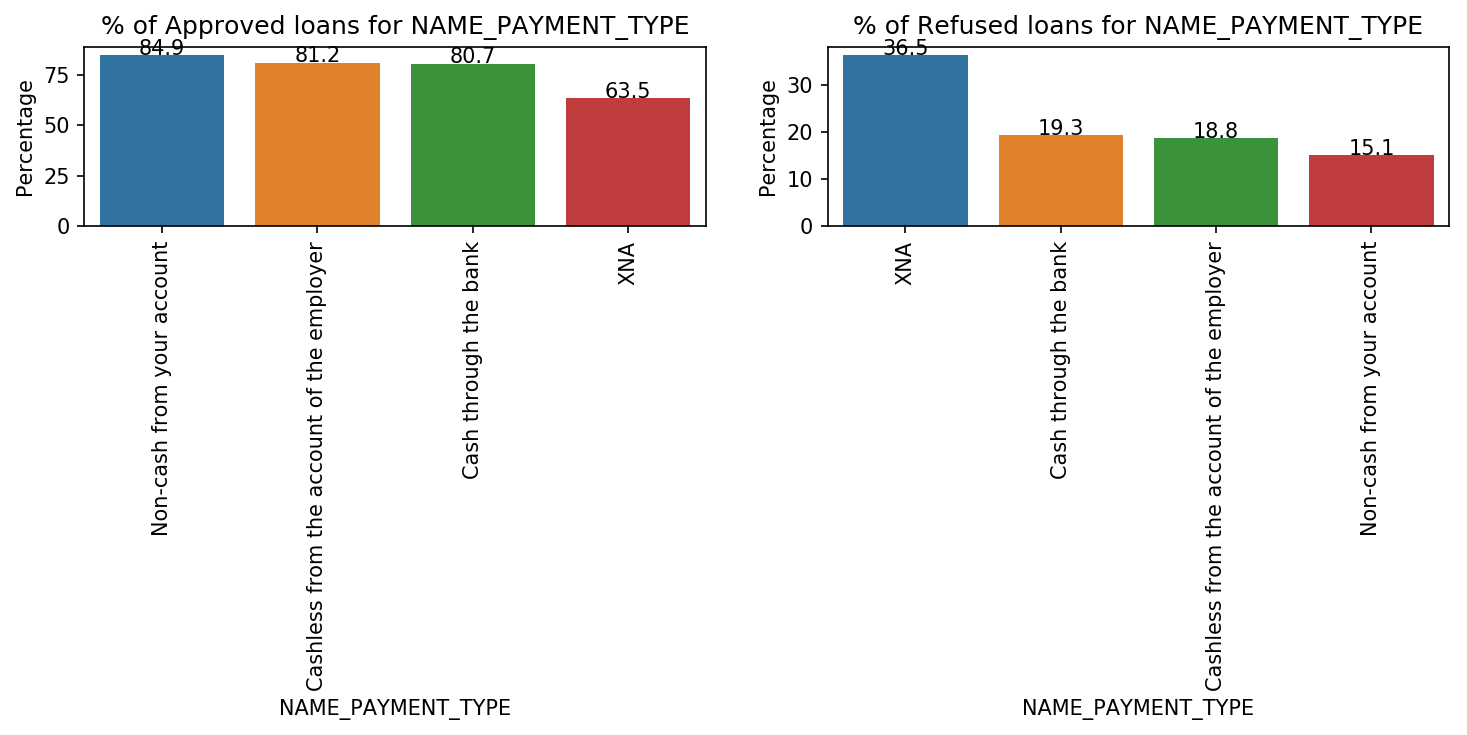

In [417]:
# Plotting the approval and refused % based on payment type
plot_univariatePrev('NAME_PAYMENT_TYPE')

# INFERENCE
There is not much distinguished pattern here

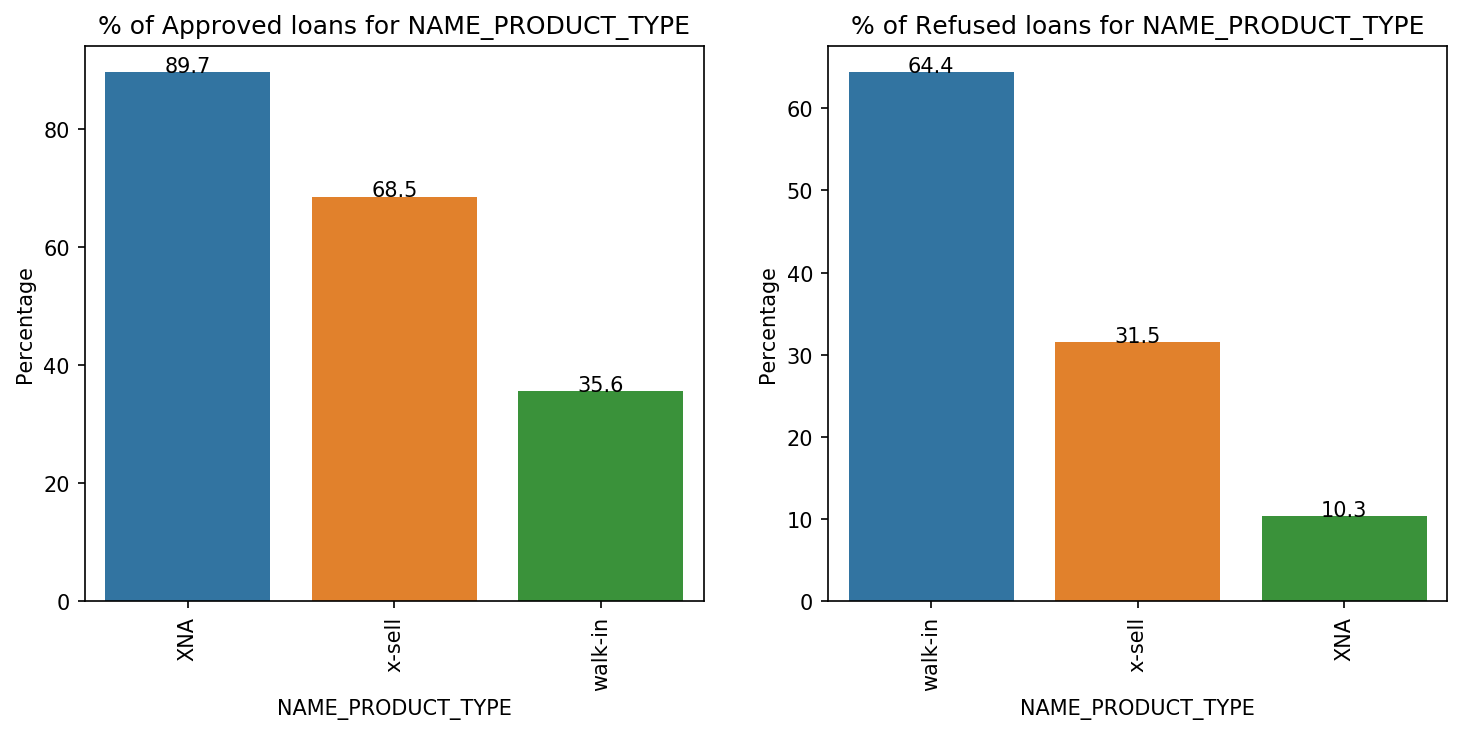

In [418]:
# Plotting the approval and refused % based on product type
plot_univariatePrev('NAME_PRODUCT_TYPE')

# INFERENCE
1. X-sell see high approval rate.
2. Walk-in see high refusal rate.

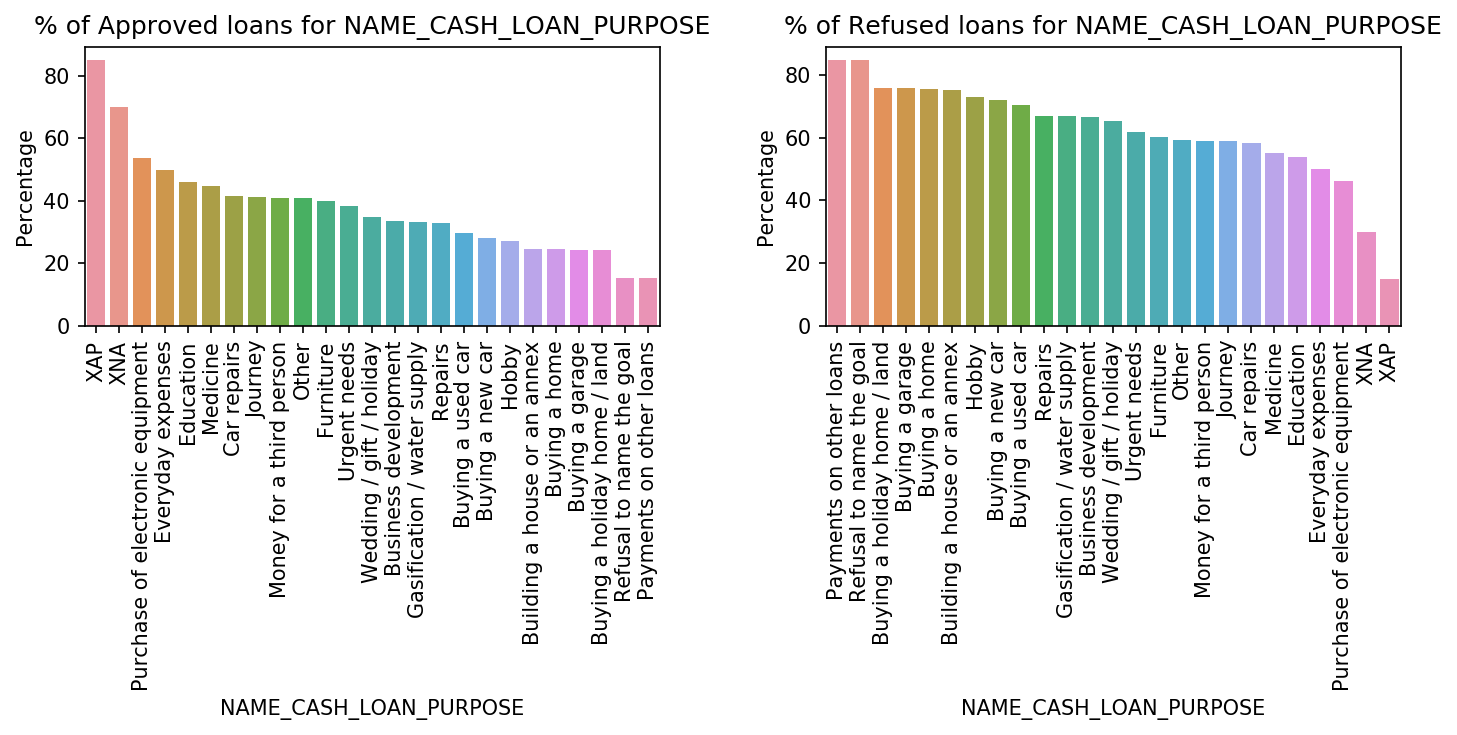

In [419]:
# Plotting the approval and refused % based on cash loan purpose
plot_univariatePrev('NAME_CASH_LOAN_PURPOSE',False)

# INFERENCE
1. Payment on other loans, refusal to name the goal, buying a holiday home /land, see high refusal rate.
2. Purchase of electronic equipment, everyday expenses, education have high approval rate among others.

In [420]:
# Defining a function to plot the count plots
def PlotGraph(apDf,reDf,fromCol):

    fig, ax=plt.subplots(nrows=1,ncols=2, figsize=(15,6))
    ax[0].set_title('Distribution of ' + fromCol+' for Approved loans', fontsize=10)
    ax[1].set_title('Distribution of ' + fromCol+' for Rejected loans', fontsize=10)

    p1=sns.countplot(x = appDf[~appDf[fromCol].isin(['XNA'])][fromCol], 
              data = appDf,
              order = appDf[fromCol].value_counts().index, ax=ax[0])
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)

    p2=sns.countplot(x = refDf[~refDf[fromCol].isin(['XNA'])][fromCol], 
              data = refDf,
              order = refDf[fromCol].value_counts().index, ax=ax[1])
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)

    ax[0].set_yscale('log')
    ax[1].set_yscale('log')

    # Showing the plot
    plt.show()

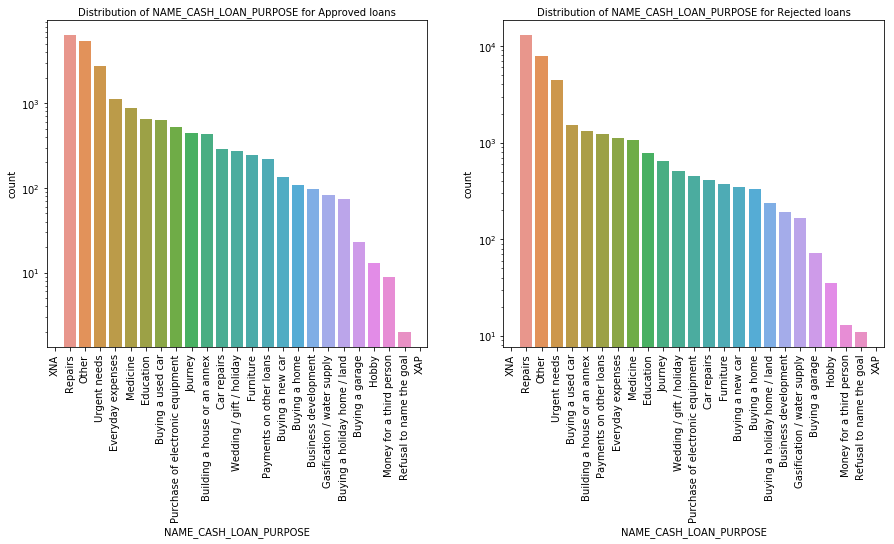

In [421]:
# Plotting the count of prev applications for cash loans  - distributed by purpose
appDf=approvedDf[approvedDf['NAME_CONTRACT_TYPE']=='Cash loans']
refDf=refusedDf[refusedDf['NAME_CONTRACT_TYPE']=='Cash loans']

PlotGraph(appDf,refDf,'NAME_CASH_LOAN_PURPOSE')

# INFERENCE
1. Repairs, Other and Urgent needs types feature more in approval & rejection for cash loans
2. Purchase of electronic equipment feature more in approval than rejection

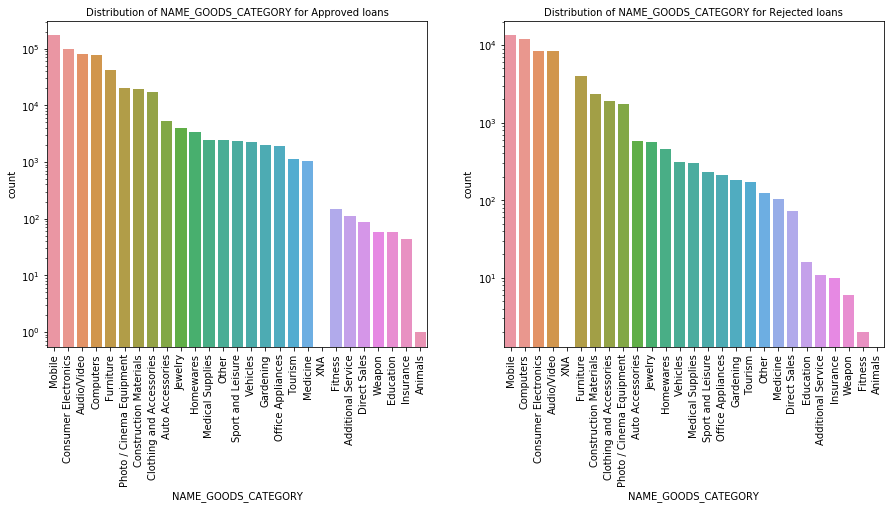

In [422]:
# Plotting the count of prev applications for consumer loans  - distributed by purpose
appDf=approvedDf[approvedDf['NAME_CONTRACT_TYPE']=='Consumer loans']
refDf=refusedDf[refusedDf['NAME_CONTRACT_TYPE']=='Consumer loans']

PlotGraph(appDf,refDf,'NAME_GOODS_CATEGORY')

# INFERENCE
Mobile, Computers, Audio/Video, Consumer Electronics feature more in approval & rejection for consumer loans

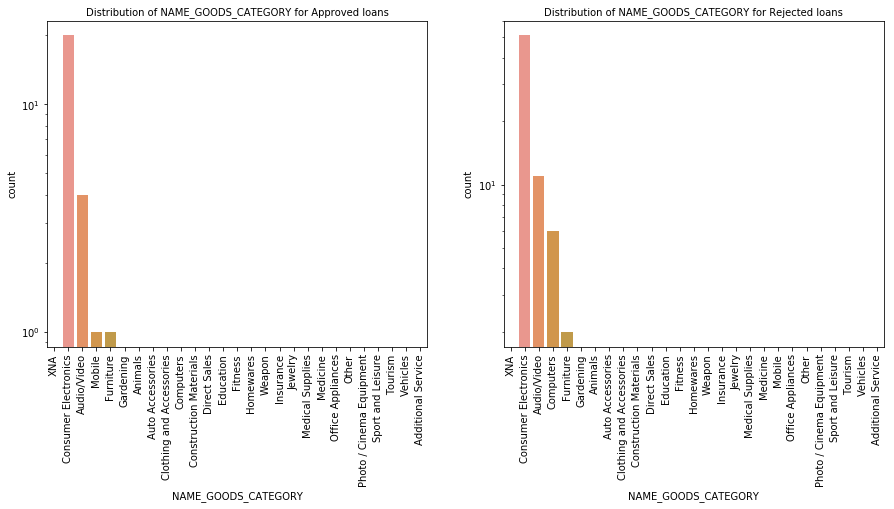

In [423]:
# Plotting the count of prev applications for revolving loans  - distributed by purpose
appDf=approvedDf[approvedDf['NAME_CONTRACT_TYPE']=='Revolving loans']
refDf=refusedDf[refusedDf['NAME_CONTRACT_TYPE']=='Revolving loans']

PlotGraph(appDf,refDf,'NAME_GOODS_CATEGORY')

# INFERENCE
Furniture feature less in rejection compared to approvals in Revolving loan category

# CORELATION

In [424]:
# Creating the co-reation among the numerical variables of approved data
colsForCorr=['AMT_ANNUITY','AMT_APPLICATION','AMT_CREDIT','AMT_GOODS_PRICE','DAYS_DECISION','SELLERPLACE_AREA','CNT_PAYMENT','DAYS_TERMINATION','LoanOperationDays']
approvedCorrDf= approvedDf[colsForCorr].corr()

# Creating the co-reation among the numerical variables of refused data
colsForCorr.remove('DAYS_TERMINATION')
colsForCorr.remove('LoanOperationDays')
refusedCorrDf= refusedDf[colsForCorr].corr()

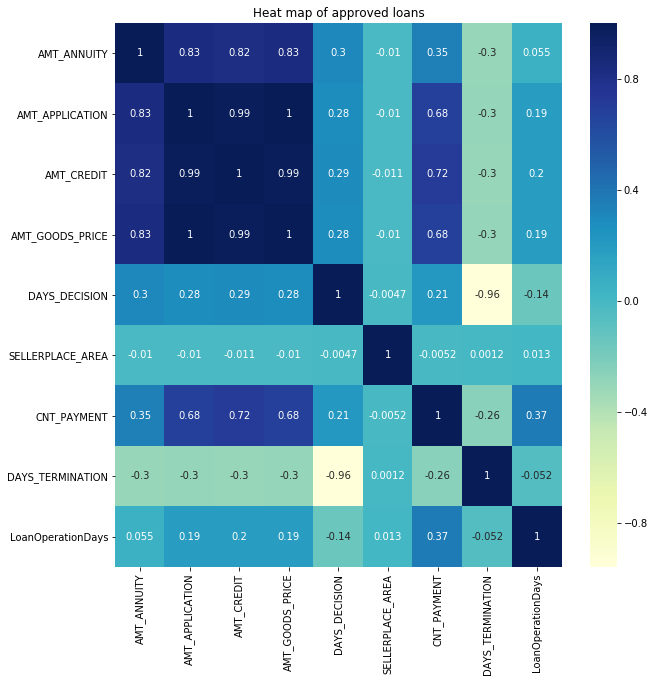

In [425]:
#Plotting a heatmap to find correlation for approved loans
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(approvedCorrDf, cmap="YlGnBu",annot=True)
plt.title('Heat map of approved loans')
plt.show()

The top correlations are between:
    AMT_ANNUITY with AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE
    AMT_CREDIT with AMT_APPLICATION, AMT_GOODS_PRICE

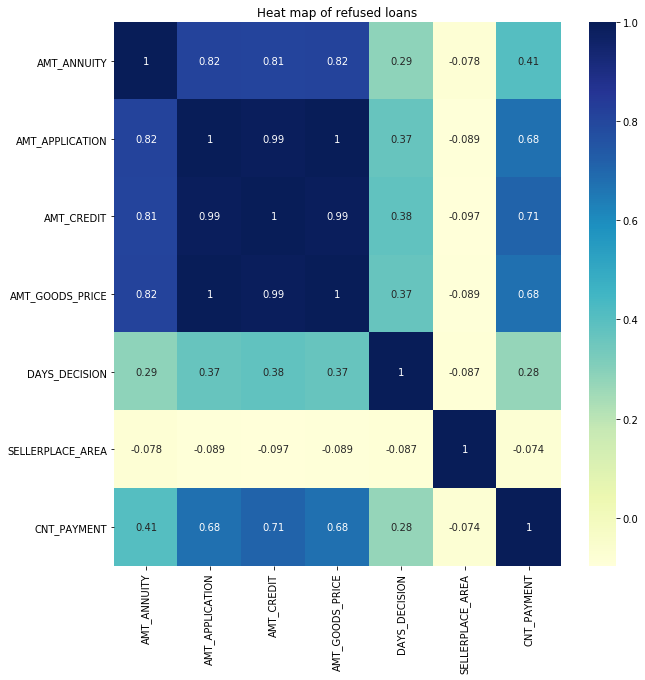

In [426]:
#Plotting a heatmap to find correlation for refused loans
plt.figure(figsize=(10,10))

# heatmap
sns.heatmap(refusedCorrDf, cmap="YlGnBu",annot=True)
plt.title('Heat map of refused loans')
plt.show()

The top correlations are between:
    AMT_ANNUITY with AMT_APPLICATION, AMT_CREDIT, AMT_GOODS_PRICE
    AMT_CREDIT with AMT_APPLICATION, AMT_GOODS_PRICE

# Merging the Application & Previous Application Data

In [427]:
# Merging the target variable of application data to previous approved and refused data for the common current id rows
dfToMergeFromAppData=app_data[['SK_ID_CURR','TARGET']]
mergedDf=pd.merge(newDf,dfToMergeFromAppData, how='inner', on='SK_ID_CURR', sort=True)

In [428]:
# Getting % null values
GetPercentageNullValues(mergedDf,0)

# The null values are present only in the Refused category as those columns do not make sense there

NFLAG_INSURED_ON_APPROVAL      22.03
DAYS_FIRST_DUE                 22.03
DAYS_TERMINATION               22.03
DAYS_LAST_DUE                  22.03
LoanOperationDays              22.03
AMT_GOODS_PRICE_RANGE           0.35
AMT_ANNUITY_RANGE               0.02
AMT_CREDIT_RANGE                0.02
AMT_APPLICATION_CATEGORY        0.00
AMT_CREDIT                      0.00
AMT_GOODS_PRICE                 0.00
CHANNEL_TYPE                    0.00
CNT_PAYMENT                     0.00
NAME_CASH_LOAN_PURPOSE          0.00
CODE_REJECT_REASON              0.00
DAYS_DECISION                   0.00
AMT_APPLICATION                 0.00
FLAG_LAST_APPL_PER_CONTRACT     0.00
HOUR_APPR_PROCESS_START         0.00
TARGET                          0.00
NAME_CONTRACT_STATUS            0.00
NAME_CLIENT_TYPE                0.00
NAME_CONTRACT_TYPE              0.00
NAME_GOODS_CATEGORY             0.00
NAME_PAYMENT_TYPE               0.00
NAME_PORTFOLIO                  0.00
NAME_PRODUCT_TYPE               0.00
N

In [429]:
# Creating two data frames based on target variable
nonDefDf=mergedDf[mergedDf['TARGET']==0]
defDf=mergedDf[mergedDf['TARGET']==1]

In [430]:
# Creating a function to plot the univariate plots of the merged data based on target variable
def plot_univariateMerged(var,mergedDf=mergedDf,annot=True):
    fig=plt.figure(figsize=(10,5),dpi=150)
    ax1 = fig.add_subplot(121)
    ax2 = fig.add_subplot(122)
    ax1.set_title('% Rate of defaulters for ' + '%s' %var)
    ax2.set_title('% Rate of non defaulters for '+'%s' %var)
    
    ax1.set_xlabel(var)
    ax2.set_xlabel(var)
    ax1.set_ylabel('Percentage')
    ax2.set_ylabel('Percentage')
    
    cDf=pd.crosstab(mergedDf[var],mergedDf['TARGET']).apply(lambda r: r*100/r.sum(), axis=1)
    
    dDf=cDf[1].sort_values(ascending=False)
    ndDf=cDf[0].sort_values(ascending=False)
    
    p1=sns.barplot(y=dDf.values,x=dDf.index.tolist(), ax=ax1)
    p1.set_xticklabels(p1.get_xticklabels(),rotation=90)
    
    p2=sns.barplot(y=ndDf.values,x=ndDf.index.tolist(), ax=ax2)
    p2.set_xticklabels(p2.get_xticklabels(),rotation=90)
    
    if(annot):
        for p in p1.patches:
            p1.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
        for p in p2.patches:
            p2.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),ha = 'center', va = 'center', xytext = (0, 3), textcoords = 'offset points')
    
    fig.tight_layout()
    plt.show()

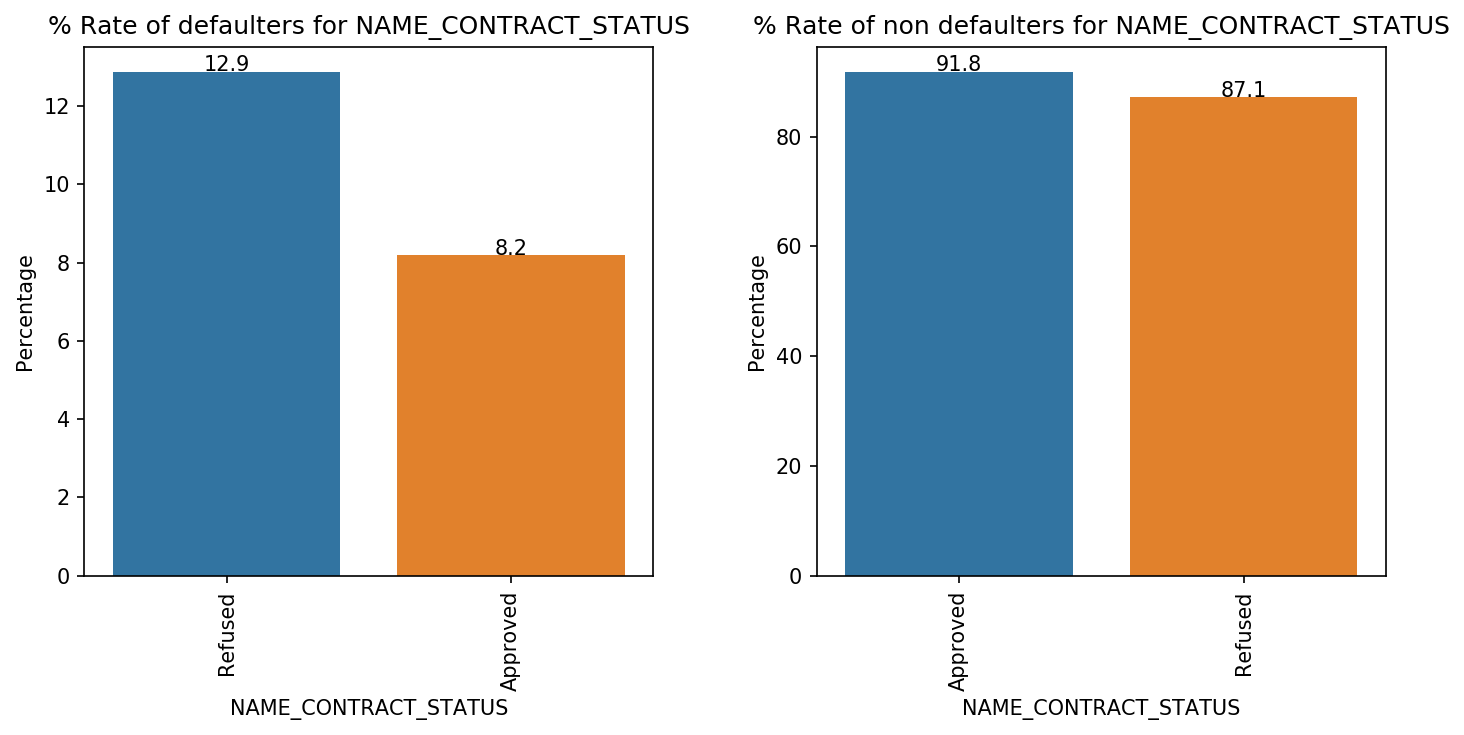

In [431]:
# Plotting for contract status
plot_univariateMerged('NAME_CONTRACT_STATUS')

# INFERENCE
1. For customers with previous loans refused, it is likely that they will default.
2. So, the banks should not provide loans to those clients who have previous records of loan refusal.

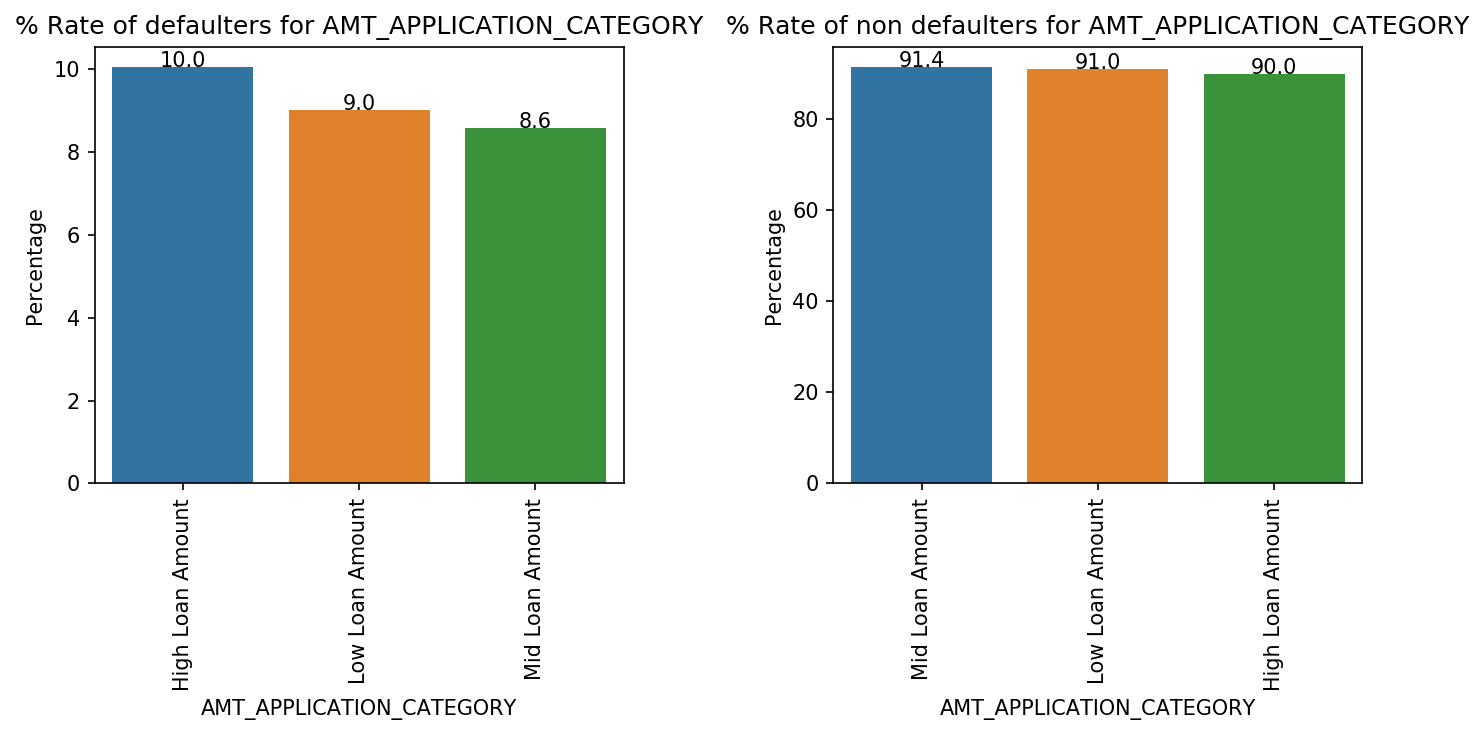

In [432]:
# For which loan amount category, there is a chance of default?
plot_univariateMerged('AMT_APPLICATION_CATEGORY')

# INFERENCE
Customer with previous high loan amounts are likely to default

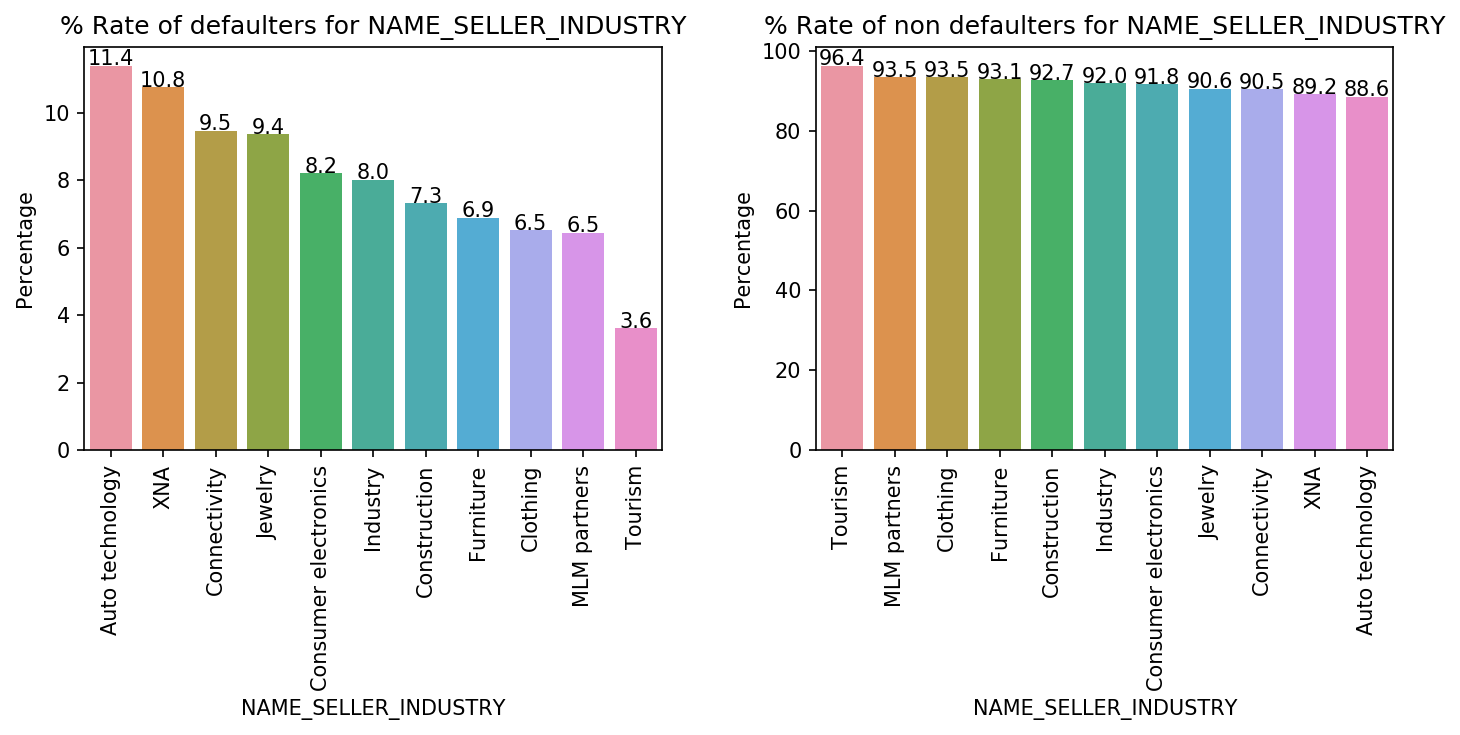

In [433]:
# For which seller industry, there is a chance of default?
plot_univariateMerged('NAME_SELLER_INDUSTRY')

# INFERENCE
For auto technology, connectivity and jewellery the % of defaulters are high

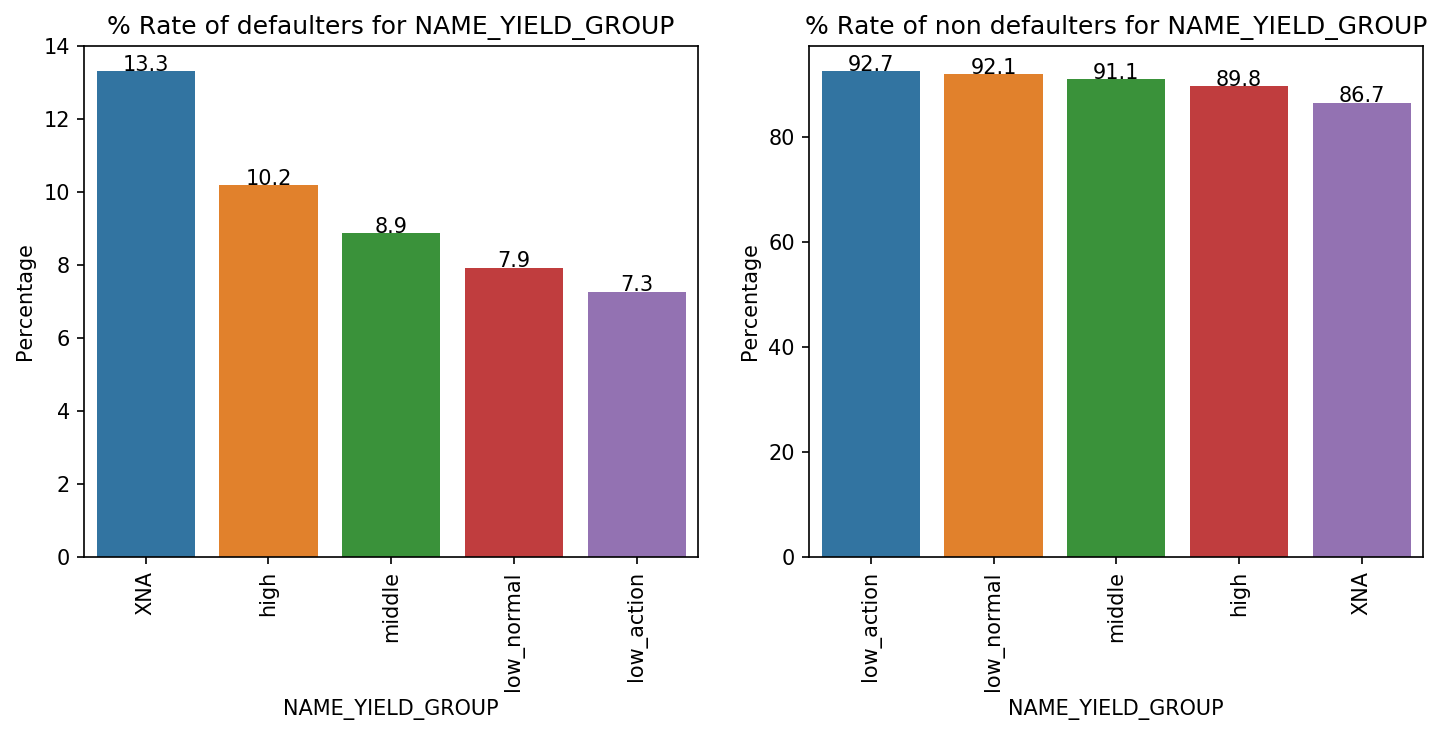

In [434]:
# For which yeild group, there is a chance of default?
plot_univariateMerged('NAME_YIELD_GROUP')

# INFERENCE
1. Applicants who were previously in high yeild group are likely to default
2. From the analysis of loans which were approved and refused in the previous application part, we saw that low action and low normal yeild group loans are refused the most and high yeild group loans are approved the most. From this graph we can see that persons with low action and low normal yeild loans, default the least. So, banks can approve their loans. They are unlikely to default.
3. Applicants who were previously in high yeild group are among top defaulters. Here the banks may be taking a risk of approving their loans by giving them loans with high interest rate.

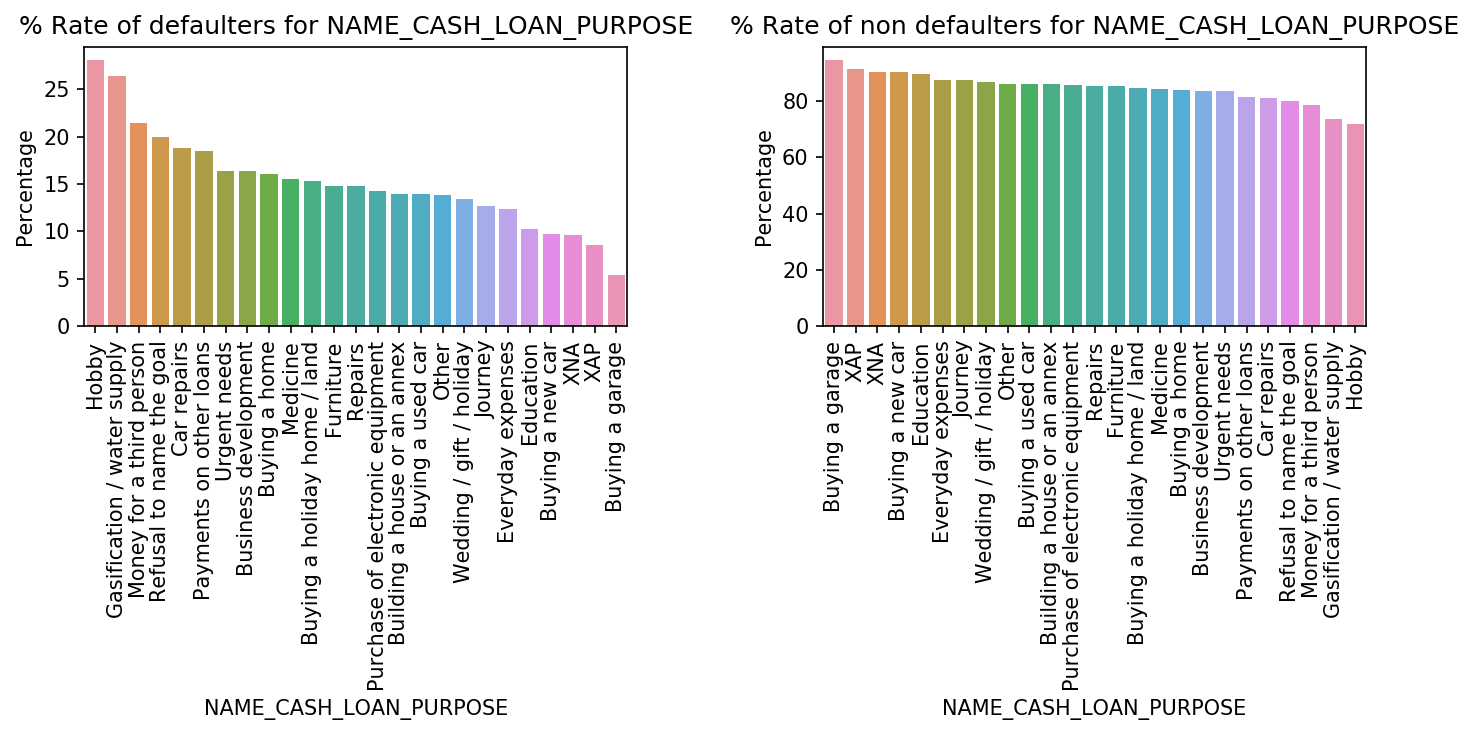

In [435]:
# For which cash loan purpose, there is a chance of default?
plot_univariateMerged('NAME_CASH_LOAN_PURPOSE', annot=False)

# INFERENCE
Applicants who had taken loan previously due to hobby,gasification/water supply, money for a third person are likely to default

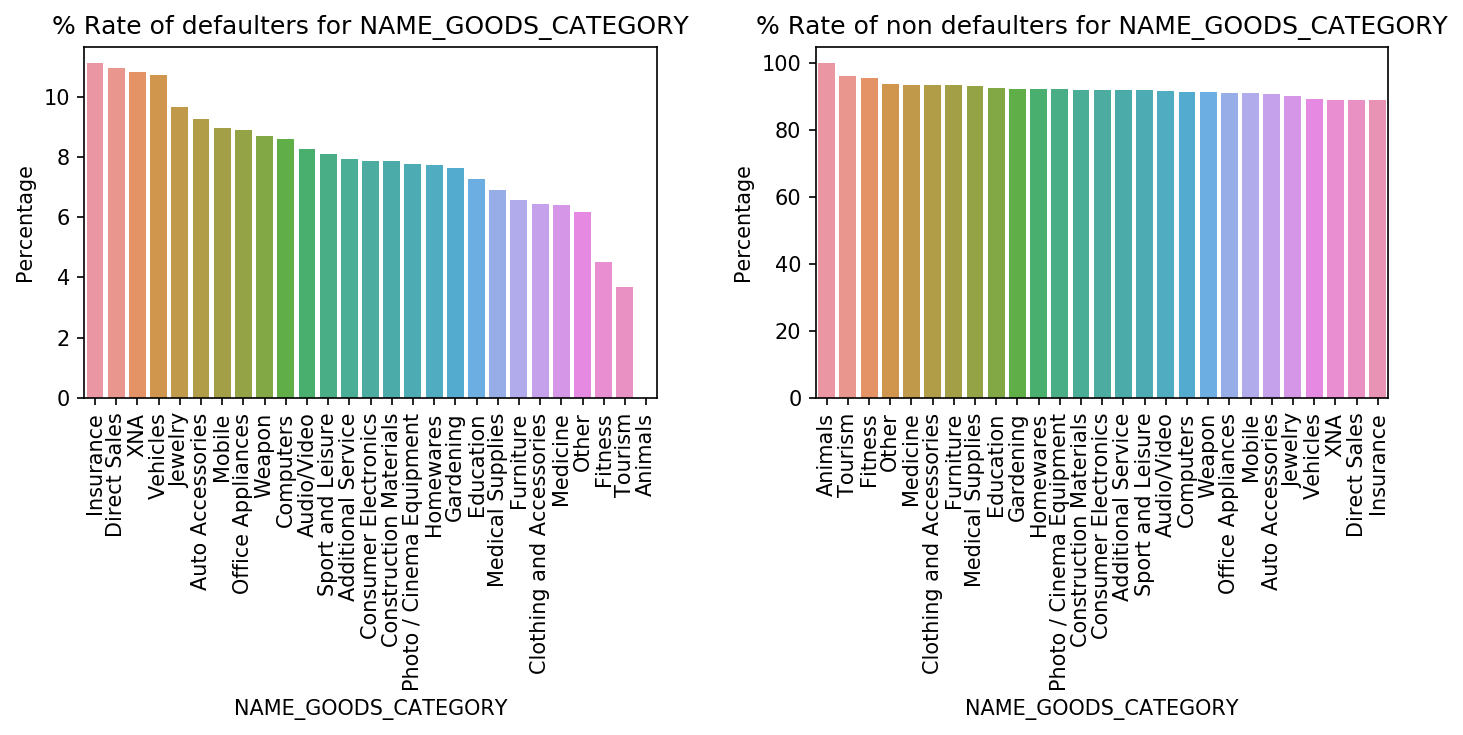

In [436]:
# For which goods category, there is a chance of default?
plot_univariateMerged('NAME_GOODS_CATEGORY',annot=False)

# INFERENCE
Applicants who had taken loan previously for insurance, direct sales, vehicles are likely to default

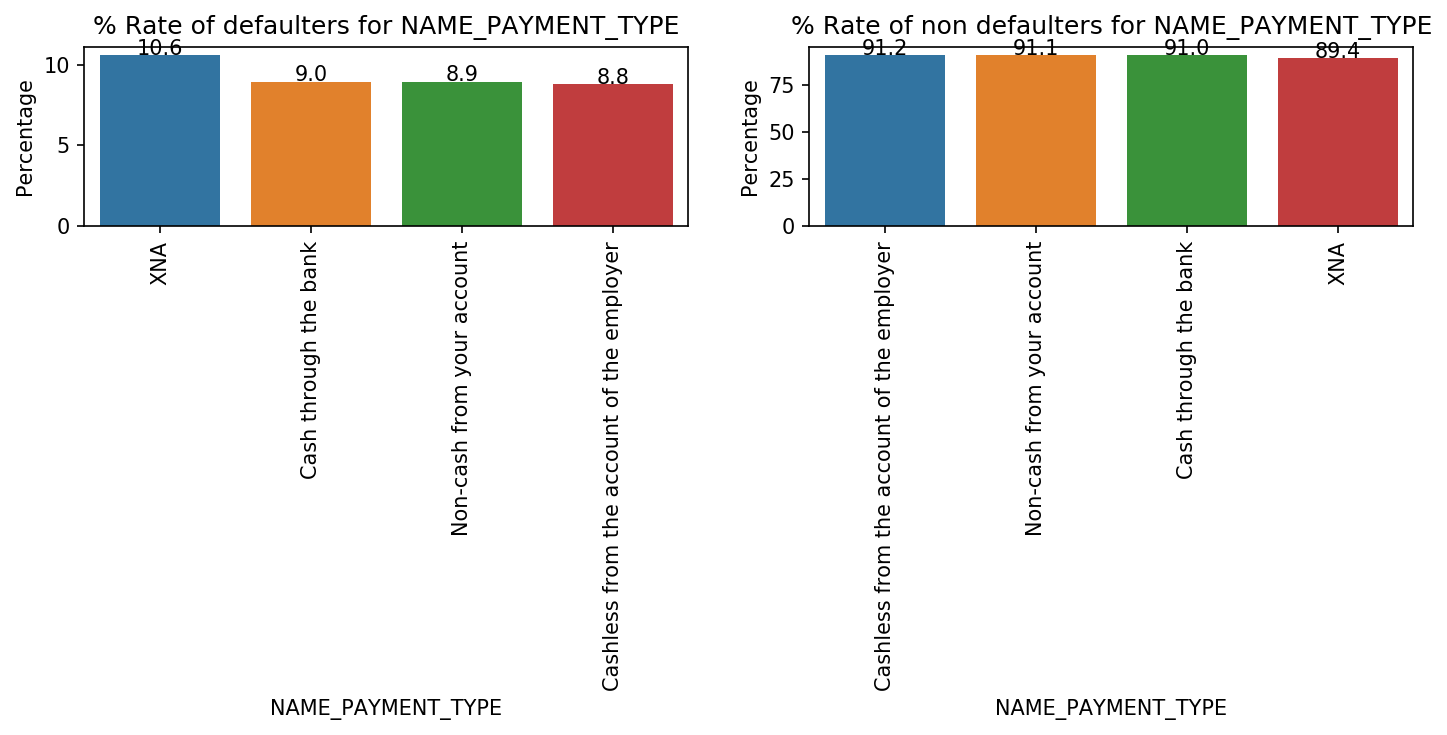

In [437]:
# For which payment type, there is a chance of default?
plot_univariateMerged('NAME_PAYMENT_TYPE')

# INFERENCE
Payment type does not make a difference for default

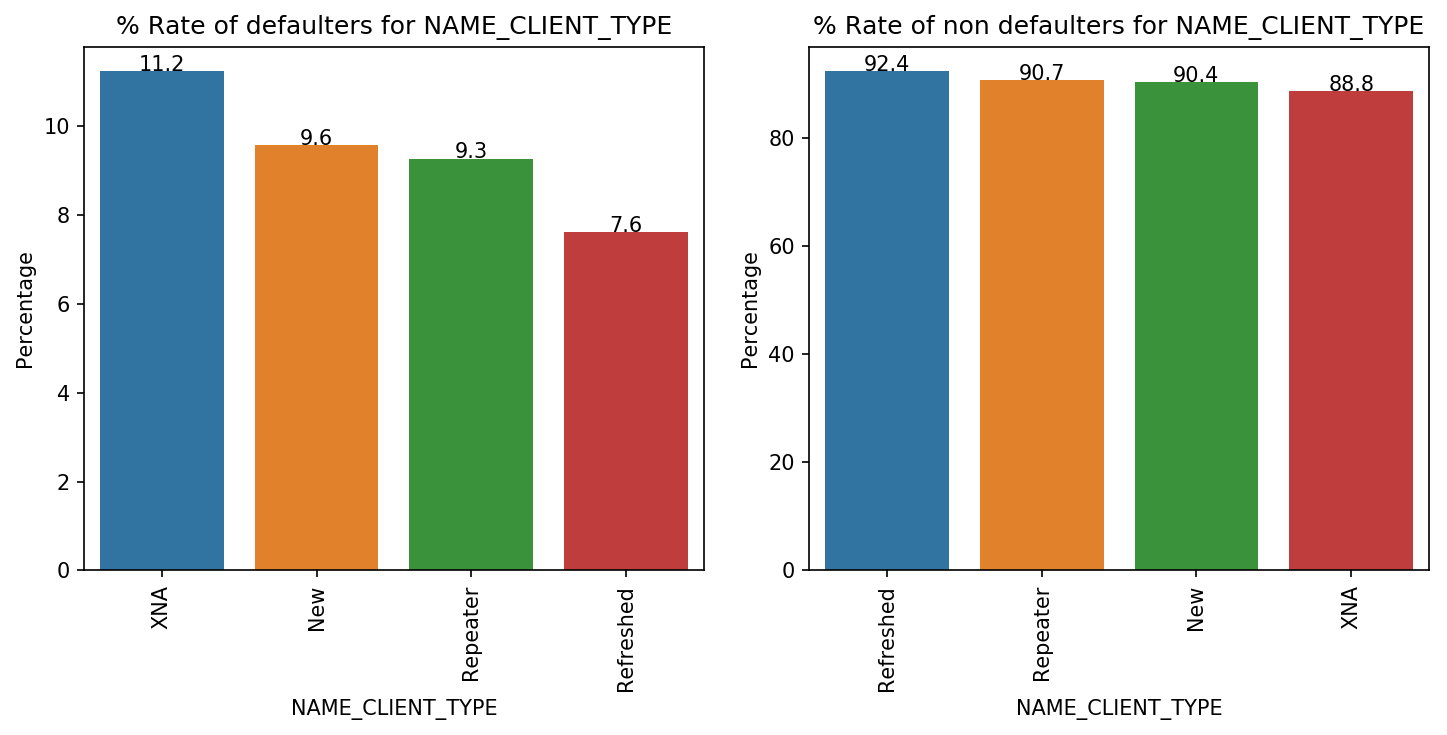

In [438]:
# For which client type, there is a chance of default?
plot_univariateMerged('NAME_CLIENT_TYPE')

# INFERENCE
1. New and repeater client type are likely to default.
2. New loans are also approved the most, this we have seen from the previous dataset. So banks should take a call when ever they have new clients whether to give loan or not. Only after careful observations of other deciding factors/variables, the banks should give them loans.

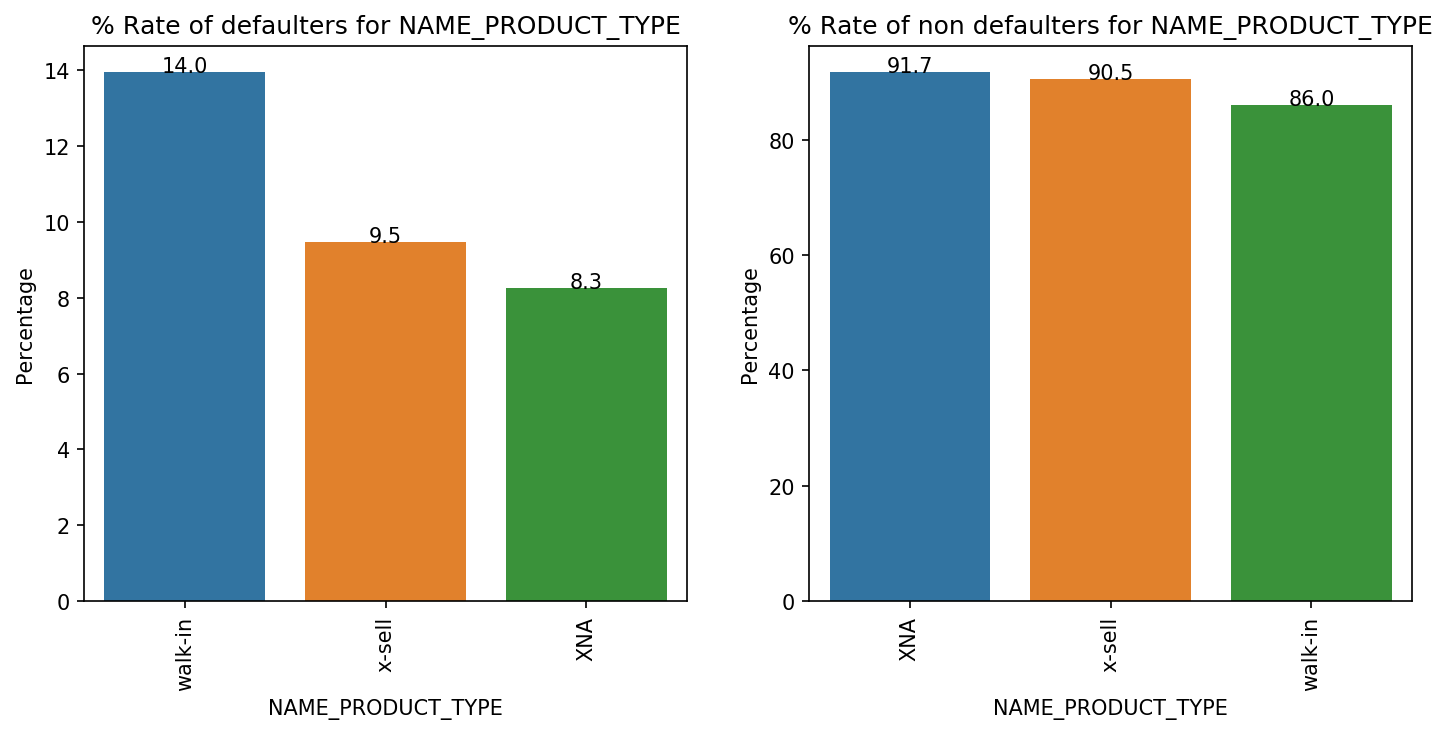

In [439]:
# For which product type, there is a chance of default?
plot_univariateMerged('NAME_PRODUCT_TYPE')

# INFERENCE 
1. Walk in clients are likely to default.
2. Also, we have seen that walk in clients are refused more. So, the banks are following the correct behaviour in order to avoid defaults.

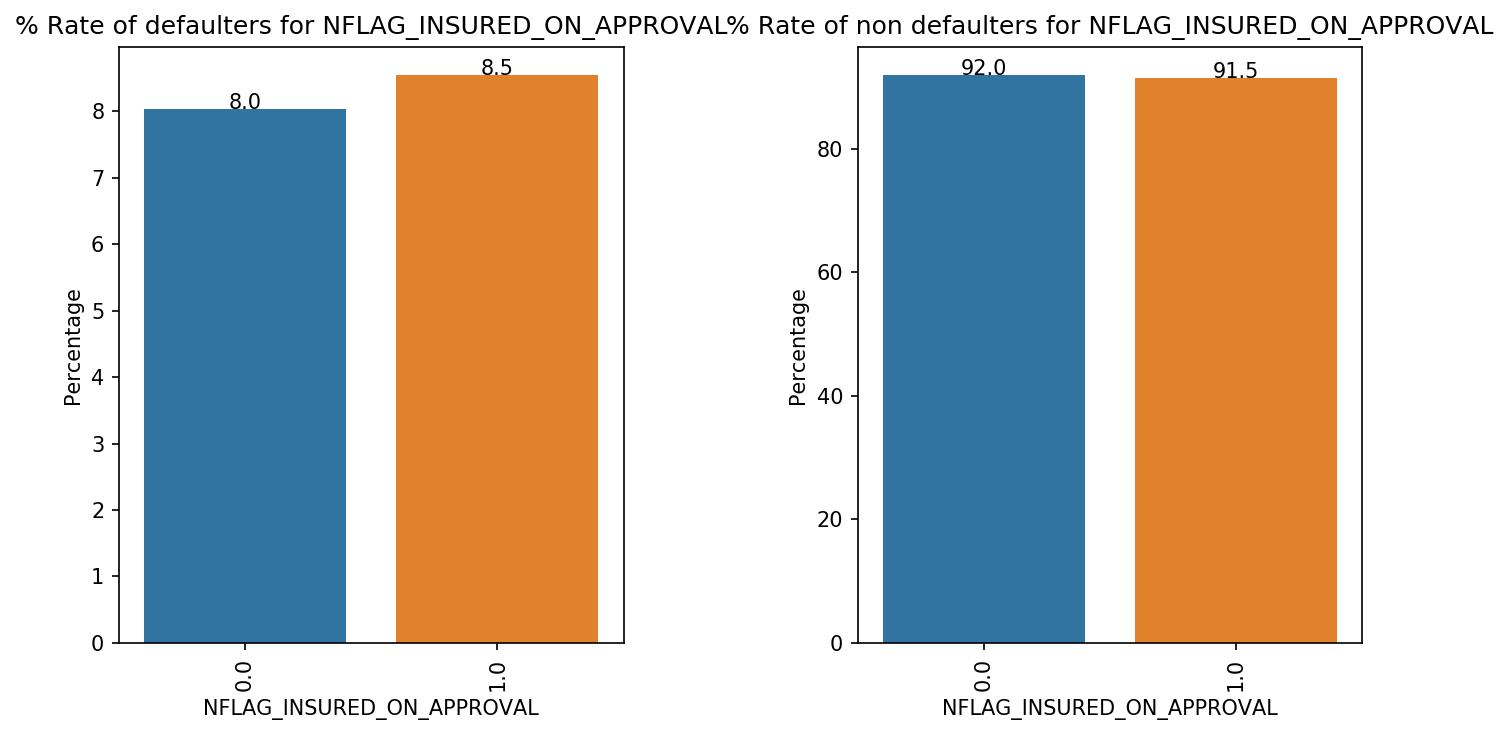

In [440]:
# Does defaulters insure loans?
plot_univariateMerged('NFLAG_INSURED_ON_APPROVAL')

# INFERENCE 
1. Those who insured their loans are likely to default than those who did not. As the difference is not high, we cannot recommend anything through this variable.
2. Also, we have seen majority of the loans approved did not have insurance.

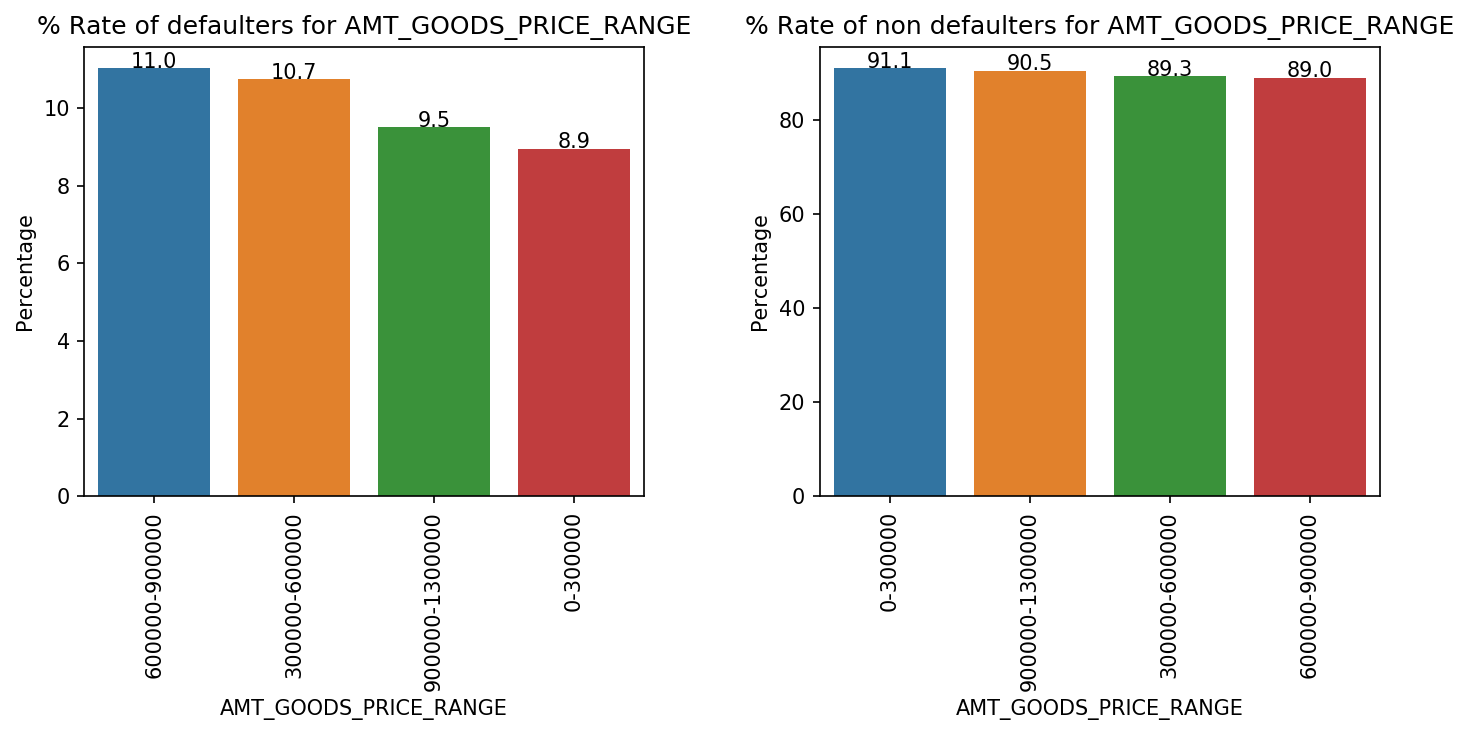

In [441]:
# For which goods price range, there is a chance of default?
plot_univariateMerged('AMT_GOODS_PRICE_RANGE')

# INFERENCE
1. For 3-9 lakhs range, the chance of default is more.
2. We have seen, 0-3 lakhs range of goods price are approved the most and they have lower chance of defaulting. So, the banks should continue to approve their loans.

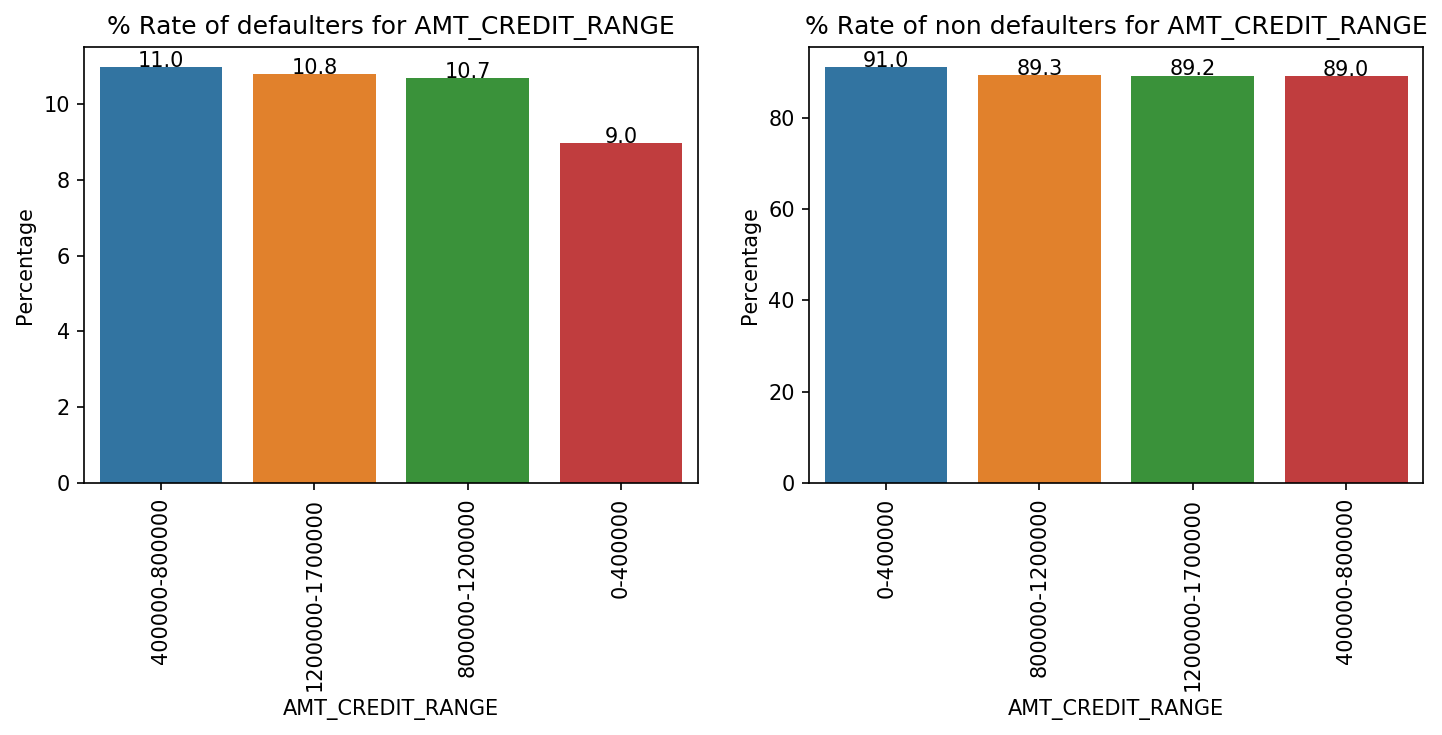

In [442]:
# For which credit range, there is a chance of default?
plot_univariateMerged('AMT_CREDIT_RANGE')

# INFERENCE
1. For high credit ranges, the chance of default is more.
2. We have also seen 0-4lakhs credit range are approved the most and they have low chance of defaulting. So, the banks should continue to approve loans to lower credit range.

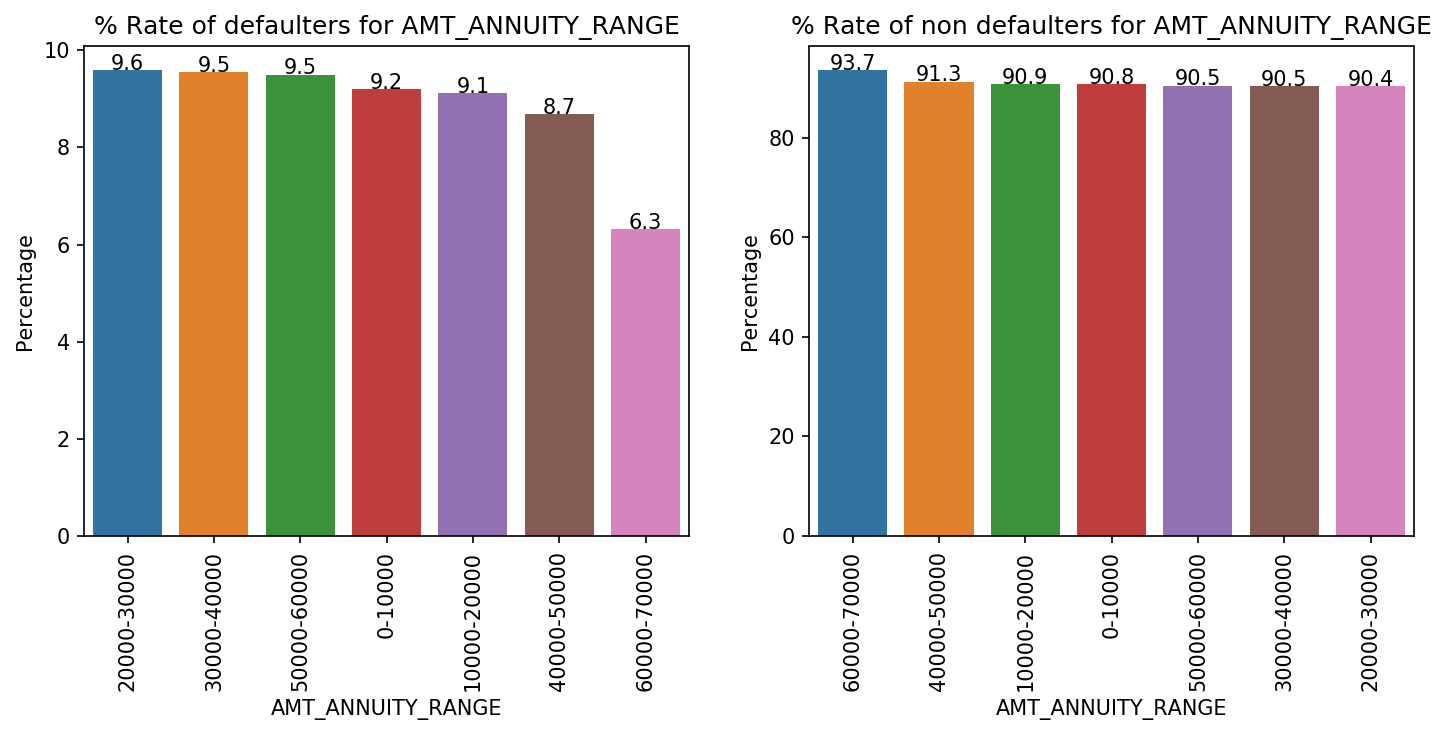

In [443]:
# For which annuity range, there is a chance of default?
plot_univariateMerged('AMT_ANNUITY_RANGE')

# INFERENCE
1. For the 20-50k annuity range, the chance of default is more compared to other ranges.
2. Also, we have seen 30-40k annuity range are refused the most. The banks can continue this to avoid defaulters.

# SCATTER PLOTS

In the previous as well as the application dataset
We have seen the amount credit, goods price, amount annuity is highly co-related
Confirming the same thorugh scatter plots for the merged dataset

Text(0.5, 1.0, 'Scatter plot for credit amount and goods price')

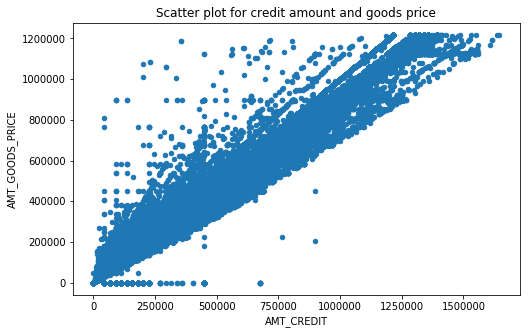

In [444]:
# How the credit and goods price is related?
fig, ax = plt.subplots(figsize=(8, 5))
mergedDf.plot.scatter(x='AMT_CREDIT',y='AMT_GOODS_PRICE',ax=ax)
plt.title('Scatter plot for credit amount and goods price')

# INFERENCE
Credit and goods price is positively related

Text(0.5, 1.0, 'Scatter plot for credit amount and annuity amount')

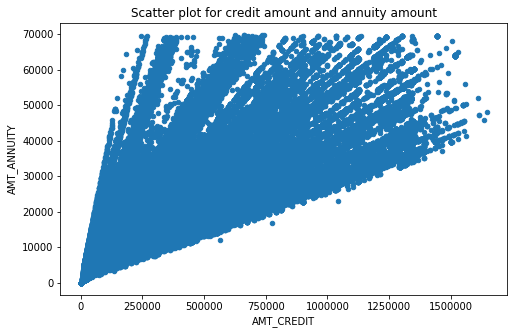

In [445]:
# How the credit and annuity amount is related?
fig, ax = plt.subplots(figsize=(8, 5))
mergedDf.plot.scatter(x='AMT_CREDIT',y='AMT_ANNUITY',ax=ax)
plt.title('Scatter plot for credit amount and annuity amount')

# INFERENCE
Credit and annuity amount is positively related

Text(0.5, 1.0, 'Scatter plot for days decision and credit amount')

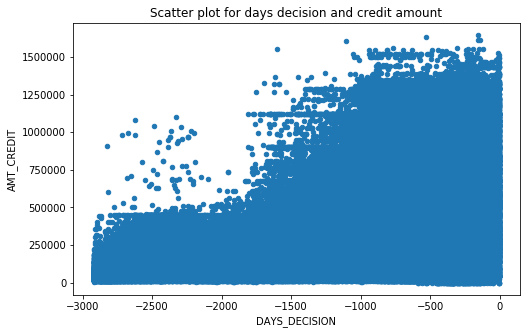

In [446]:
# How the credit and goods price is related?
fig, ax = plt.subplots(figsize=(8, 5))
mergedDf.plot.scatter(x='DAYS_DECISION',y='AMT_CREDIT',ax=ax)
plt.title('Scatter plot for days decision and credit amount')

# INFERENCE 
Higher the amount, less the days decision

# CONCLUSION:

The following variables can be considered as drivers depending on which the company can predict if a person is likely to default or not:

1. **GENDER** - Male loan applicants are more likely to default than females.

2. **AGE** - The applicant is more likely to default if he is young. We saw a high rate of defaulters in the age group 20-30 years.​

3. **TYPE OF INCOME** - Applicants who are on Maternity Leave or working, commercial associate and state servant are more likely to default than Students, pensioners and Businessmen.

4. **OCCUPATION**- Low-skilled Laborers, drivers, waiter/barmen staff, security staff, labourers, cooking staff are likely to default compared to managers and core staff.

5. **EMPLOYMENT YEARS** -  Applicants who have been employed for 0-5 years are more likely to default than those employed for 15-20 years.

6. **EXT_SOURCE_1,EXT_SOURCE2,EXT_SOURCE3** – Applicants having a low credit score between 0-0.25 are more likely to default.

7. **EDUCATION** - Applicants who have completed their education only until lower secondary level are more likely to default 

8. **PRODUCT TYPE** – If the applicant falls in the walk-in category, he is more likely to default than cross-sell category.

9. **REGION_RATING_CLIENT** – Applicants who live in regions having a rating of 3 are more likely to default.

10. **CONTRACT STATUS** – People whose previous loans were refused are more likely to default than those whose loans were previously accepted.


